In [16]:
# Install seaborn and matplotlib packages
%pip install seaborn
%pip install matplotlib
# Install lxml package
%pip install lxml

import pandas as pd
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import numpy as np
import lxml
import re
import os





Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached lxml-5.3.1-cp311-cp311-win_amd64.whl.metadata (3.8 kB)
Using cached lxml-5.3.1-cp311-cp311-win_amd64.whl (3.8 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
# Install the lxml package
#%pip install lxml

tables = pd.read_html(url)
for i, table in enumerate(tables):
    print(f"Table {i}: {table.shape}")
results_by_year_df = tables[1]

NameError: name 'url' is not defined

In [18]:
# Display the first few rows of Table 8
results_by_year_df = tables[8]  # Selecting Table 8
results_by_year_df.columns = results_by_year_df.columns.droplevel()  # Drop the top header row

# Show the first few rows to verify structure
results_by_year_df.head()


NameError: name 'tables' is not defined

In [ ]:
# Extract the correct table (Table 8)
results_by_year_df = tables[8]

# Display the first few rows to verify
results_by_year_df.head()
# Remove extra spaces from column names
results_by_year_df.columns = results_by_year_df.columns.str.strip()

# Drop any fully empty rows (if necessary)
results_by_year_df = results_by_year_df.dropna(how='all')

# Display updated table structure
results_by_year_df.info()

# Rename columns (example renaming, adjust as needed)
results_by_year_df = results_by_year_df.rename(columns={
	'Unnamed: 2_level_1': 'Column_2',
	'Unnamed: 3_level_1': 'Column_3',
	'Unnamed: 4_level_1': 'Column_4',
	'Unnamed: 5_level_1': 'Column_5',
	# Add more renaming as needed
})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 94 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   School               332 non-null    object 
 1   Conference           332 non-null    object 
 2   Unnamed: 2_level_1   332 non-null    object 
 3   Unnamed: 3_level_1   332 non-null    object 
 4   Unnamed: 4_level_1   332 non-null    object 
 5   Unnamed: 5_level_1   332 non-null    object 
 6   Unnamed: 6_level_1   332 non-null    object 
 7   Unnamed: 7_level_1   332 non-null    object 
 8   Unnamed: 8_level_1   13 non-null     object 
 9   Unnamed: 9_level_1   12 non-null     object 
 10  Unnamed: 10_level_1  15 non-null     object 
 11  Unnamed: 11_level_1  16 non-null     object 
 12  Unnamed: 12_level_1  15 non-null     object 
 13  Unnamed: 13_level_1  14 non-null     object 
 14  Unnamed: 14_level_1  14 non-null     object 
 15  Unnamed: 15_level_1  15 non-null     obj

In [ ]:
# Display column names with their index positions
column_map = {idx: col for idx, col in enumerate(results_by_year_df.columns)}
for idx, col in column_map.items():
    print(f"{idx}: {col}")

# Define columns by name instead of hardcoding indices
selected_column_names = [results_by_year_df.columns[0],  # First column
                         results_by_year_df.columns[1]]  # Second column

# Add range 71-93 based on actual column names
selected_column_names += results_by_year_df.columns[71:94].tolist()

# Extract the selected columns
filtered_results_df = results_by_year_df[selected_column_names]

# Display first few rows to verify
print("Filtered NCAA Tournament Results (First 5 Rows):")
print(filtered_results_df.head())


0: School
1: Conference
2: Column_2
3: Column_3
4: Column_4
5: Column_5
6: Unnamed: 6_level_1
7: Unnamed: 7_level_1
8: Unnamed: 8_level_1
9: Unnamed: 9_level_1
10: Unnamed: 10_level_1
11: Unnamed: 11_level_1
12: Unnamed: 12_level_1
13: Unnamed: 13_level_1
14: Unnamed: 14_level_1
15: Unnamed: 15_level_1
16: Unnamed: 16_level_1
17: Unnamed: 17_level_1
18: Unnamed: 18_level_1
19: Unnamed: 19_level_1
20: Unnamed: 20_level_1
21: Unnamed: 21_level_1
22: Unnamed: 22_level_1
23: Unnamed: 23_level_1
24: Unnamed: 24_level_1
25: Unnamed: 25_level_1
26: Unnamed: 26_level_1
27: Unnamed: 27_level_1
28: Unnamed: 28_level_1
29: Unnamed: 29_level_1
30: Unnamed: 30_level_1
31: Unnamed: 31_level_1
32: Unnamed: 32_level_1
33: Unnamed: 33_level_1
34: Unnamed: 34_level_1
35: Unnamed: 35_level_1
36: Unnamed: 36_level_1
37: Unnamed: 37_level_1
38: Unnamed: 38_level_1
39: Unnamed: 39_level_1
40: Unnamed: 40_level_1
41: Unnamed: 41_level_1
42: Unnamed: 42_level_1
43: Unnamed: 43_level_1
44: Unnamed: 44_level_1


In [ ]:
filtered_results_df.head()

,School,Conference,Unnamed: 71_level_1,Unnamed: 72_level_1,Unnamed: 73_level_1,Unnamed: 74_level_1,Unnamed: 75_level_1,Unnamed: 76_level_1,Unnamed: 77_level_1,Unnamed: 78_level_1,...,Unnamed: 84_level_1,Unnamed: 85_level_1,Unnamed: 86_level_1,Unnamed: 87_level_1,Unnamed: 88_level_1,Unnamed: 89_level_1,Unnamed: 90_level_1,Unnamed: 91_level_1,Unnamed: 92_level_1,Unnamed: 93_level_1
0,UCLA,Pac-12,16,NaN,NaN,•,RU,F4,F4,32,...,16,NaN,16,ƒ,NaN,NaN,F4,16,16,NaN
1,Kentucky,SEC,16,E8,32,E8,32,32,•,N,...,F4,32,E8,16,E8,NaN,NaN,•,32,•
2,North Carolina,ACC,NaN,N,32,CH,32,E8,F4,CH,...,16,RU,CH,32,16,NaN,•,RU,NaN,16
3,UConn,Big East,E8,16,CH,32,E8,NaN,•,F4,...,N,32,NaN,NaN,NaN,NaN,•,•,CH,CH
4,Duke,ACC,16,16,F4,16,16,•,32,16,...,CH,16,32,E8,E8,NaN,NaN,F4,32,E8


In [ ]:
# Define new column names
new_column_names = list(filtered_results_df.columns)

# Replace "Unnamed" columns with year labels (2002-2024)
for i, year in enumerate(range(2002, 2025), start=2):  # 2 is the starting index for the year columns
    new_column_names[i] = str(year)

# Apply new names
filtered_results_df.columns = new_column_names

# Display first few rows
# Define new column names
new_column_names = list(filtered_results_df.columns)

# Replace "Unnamed" columns with year labels (2002-2024)
for i, year in enumerate(range(2002, 2025), start=2):  # 2 is the starting index for the year columns
    new_column_names[i] = str(year)

# Apply new names
filtered_results_df.columns = new_column_names

# Display first few rows
print(filtered_results_df.head())
# Save the filtered dataframe to a CSV file
filtered_results_df.to_csv('filtered_ncaa_tournament_results.csv', index=False)

           School Conference 2002 2003 2004 2005 2006 2007 2008 2009  ...  \
0            UCLA     Pac-12   16  NaN  NaN    •   RU   F4   F4   32  ...   
1        Kentucky        SEC   16   E8   32   E8   32   32    •    N  ...   
2  North Carolina        ACC  NaN    N   32   CH   32   E8   F4   CH  ...   
3           UConn   Big East   E8   16   CH   32   E8  NaN    •   F4  ...   
4            Duke        ACC   16   16   F4   16   16    •   32   16  ...   

  2015 2016 2017 2018 2019 2020 2021 2022 2023 2024  
0   16  NaN   16    ƒ  NaN  NaN   F4   16   16  NaN  
1   F4   32   E8   16   E8  NaN  NaN    •   32    •  
2   16   RU   CH   32   16  NaN    •   RU  NaN   16  
3    N   32  NaN  NaN  NaN  NaN    •    •   CH   CH  
4   CH   16   32   E8   E8  NaN  NaN   F4   32   E8  

[5 rows x 25 columns]


In [ ]:
# Read the CSV file
file_path = r"C:\Users\Aaron\OneDrive\New folder\Stat 386\Moneyball\DEV _ March Madness.csv"
moneyball_df = pd.read_csv(file_path)

# Display the first few rows to verify
moneyball_df.head()

C:\Users\Aaron\AppData\Local\Temp\ipykernel_16556\2771454209.py:3: DtypeWarning: Columns (144) have mixed types. Specify dtype option on import or set low_memory=False.
  moneyball_df = pd.read_csv(file_path)


,Season,Short Conference Name,Adjusted Temo,Adjusted Tempo Rank,Raw Tempo,Raw Tempo Rank,Adjusted Offensive Efficiency,Adjusted Offensive Efficiency Rank,Raw Offensive Efficiency,Raw Offensive Efficiency Rank,...,Current Coach,Full Team Name,Since,Active Coaching Length,Active Coaching Length Index,Seed,Region,Correct Team Name?,Post-Season Tournament,Post-Season Tournament Sorting Index
0,2025,ACC,66.0,264,66.3,282,128.6,2,124.7,1,...,Jon Scheyer,Duke Blue Devils,202223.0,2 years,3.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,NaN,Not In a Post-Season Tournament,5
1,2025,SEC,68.5,125,69.2,123,130.7,1,122.8,2,...,Bruce Pearl,Auburn Tigers,201415.0,10 years,11.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,NaN,Not In a Post-Season Tournament,5
2,2015,SEC,62.4,274,63.8,242,121.3,6,115.5,9,...,Mark Pope,Kentucky Wildcats,202425.0,0 years,1.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,NaN,Not In a Post-Season Tournament,5
3,2021,WCC,73.8,7,74.3,14,126.4,1,121.9,1,...,Mark Few,Gonzaga Bulldogs,199900.0,25 years,26.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,NaN,Not In a Post-Season Tournament,5
4,2024,BE,64.6,330,66.0,305,127.5,1,123.0,1,...,Dan Hurley,UConn Huskies,201819.0,6 years,7.0,1,East,UConn,March Madness,1


In [ ]:
# Normalize text format in both DataFrames
filtered_results_df["School"] = filtered_results_df["School"].str.lower().str.strip()
moneyball_df["Mapped ESPN Team Name"] = moneyball_df["Mapped ESPN Team Name"].str.lower().str.strip()

# Attempt the merge again
merged_df = pd.merge(filtered_results_df, moneyball_df, left_on="School", right_on="Mapped ESPN Team Name", how="inner")

# Display the first few rows to verify the merge worked
print(merged_df.head())

# Check how many matches were found
print(f"Total Matches Found: {len(merged_df)}")

# Save the merged dataframe to a CSV file
merged_df.to_csv('merged_ncaa_moneyball_results.csv', index=False)



C:\Users\Aaron\AppData\Local\Temp\ipykernel_16556\1850541722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_results_df["School"] = filtered_results_df["School"].str.lower().str.strip()


  School Conference 2002 2003 2004 2005 2006 2007 2008 2009  ...  \
0   ucla     Pac-12   16  NaN  NaN    •   RU   F4   F4   32  ...   
1   ucla     Pac-12   16  NaN  NaN    •   RU   F4   F4   32  ...   
2   ucla     Pac-12   16  NaN  NaN    •   RU   F4   F4   32  ...   
3   ucla     Pac-12   16  NaN  NaN    •   RU   F4   F4   32  ...   
4   ucla     Pac-12   16  NaN  NaN    •   RU   F4   F4   32  ...   

  Current Coach Full Team Name     Since Active Coaching Length  \
0   Mick Cronin    ucla bruins  201920.0                5 years   
1   Mick Cronin    ucla bruins  201920.0                5 years   
2   Mick Cronin    ucla bruins  201920.0                5 years   
3   Mick Cronin    ucla bruins  201920.0                5 years   
4   Mick Cronin    ucla bruins  201920.0                5 years   

  Active Coaching Length Index                             Seed  \
0                          6.0  Not In a Post-Season Tournament   
1                          6.0  Not In a Post-Season T

In [ ]:
# Load the merged NCAA Moneyball results CSV file
merged_ncaa_moneyball_results_path = r"C:\Users\Aaron\OneDrive\New folder\Stat 386\Moneyball\merged_ncaa_moneyball_results.csv"
merged_ncaa_moneyball_results_df = pd.read_csv(merged_ncaa_moneyball_results_path)

# Display the first few rows to verify
merged_ncaa_moneyball_results_df.head()

,School,Conference,2002,2003,2004,2005,2006,2007,2008,2009,...,Current Coach,Full Team Name,Since,Active Coaching Length,Active Coaching Length Index,Seed,Region,Correct Team Name?,Post-Season Tournament,Post-Season Tournament Sorting Index
0,ucla,Pac-12,16.0,NaN,NaN,64.0,2.0,4.0,4.0,32.0,...,Mick Cronin,ucla bruins,201920.0,5 years,6.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,NaN,Not In a Post-Season Tournament,5
1,ucla,Pac-12,16.0,NaN,NaN,64.0,2.0,4.0,4.0,32.0,...,Mick Cronin,ucla bruins,201920.0,5 years,6.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,NaN,Not In a Post-Season Tournament,5
2,ucla,Pac-12,16.0,NaN,NaN,64.0,2.0,4.0,4.0,32.0,...,Mick Cronin,ucla bruins,201920.0,5 years,6.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,NaN,Not In a Post-Season Tournament,5
3,ucla,Pac-12,16.0,NaN,NaN,64.0,2.0,4.0,4.0,32.0,...,Mick Cronin,ucla bruins,201920.0,5 years,6.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,NaN,Not In a Post-Season Tournament,5
4,ucla,Pac-12,16.0,NaN,NaN,64.0,2.0,4.0,4.0,32.0,...,Mick Cronin,ucla bruins,201920.0,5 years,6.0,Not In a Post-Season Tournament,Not In a Post-Season Tournament,NaN,Not In a Post-Season Tournament,5


In [19]:
# Convert the dataset to long format while keeping all other columns
id_vars = [col for col in merged_df.columns if col not in [str(year) for year in range(2002, 2025)]]
tournament_long_df = merged_df.melt(id_vars=id_vars, 
                                    value_vars=[str(year) for year in range(2002, 2025)], 
                                    var_name="Tournament_Year", 
                                    value_name="Tournament_Result")

# Keep only rows where Tournament_Year matches Season
tournament_long_df = tournament_long_df[tournament_long_df["Season"].astype(str) == tournament_long_df["Tournament_Year"]]

# Drop Tournament_Year column since we now have "Season"
tournament_long_df = tournament_long_df.drop(columns=["Tournament_Year"])

tournament_long_df.head()

NameError: name 'merged_df' is not defined

In [ ]:
march_data = r"C:\Users\Aaron\OneDrive\New folder\Stat 386\Moneyball\march_madness_results.csv"
march_madness_df = pd.read_csv(march_data)

count_results = march_madness_df.count()
print(count_results)

School                                  1432
Conference                              1432
Season                                  1432
Short Conference Name                   1432
Adjusted Tempo                          1432
                                        ... 
Region                                  1432
Correct Team Name?                        65
Post-Season Tournament                  1432
Post-Season Tournament Sorting Index    1432
Tournament_Result                       1432
Length: 150, dtype: int64


In [20]:
#This is a list of variables to determine postseason success
# Adjusted Tempo, Adjusted Offensive Efficiency, Adjusted Defensive Efficiency, Avg Possession Length (Offense), Avg Possession Length (Defense), eFGPCT, TOPct, ORPct, FTRate, OffFT, Off2PtFG, Off3PtFG, DefFT, Def2PtFG, Def3PtFG, AdjOE,
# AdjDE, AdjEM, FG2Pct, FG3Pct, FTPct, BlockPct, OppFG2Pct, OppFG3Pct, OppBlockPct, FG3Rate, OppFG3Rate, ARate, OppARate, StlRate, OppStlRate, AvgHeight, Experience, Bench

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv(march_data)

# Display the column names to identify the correct ones
print(df.columns)

# Define features and target
features = ["Adjusted Tempo", "Adjusted Offensive Efficiency", "Adjusted Defensive Efficiency", 
            "Avg Possession Length (Offense)", "Avg Possession Length (Defense)", "eFGPct", "TOPct", 
            "ORPct", "FTRate", "OffFT", "Off2PtFG", "Off3PtFG", "DefFT", "Def2PtFG", "Def3PtFG", 
            "AdjOE", "AdjDE", "AdjEM", "FG2Pct", "FG3Pct", "FTPct", "BlockPct", "OppFG2Pct", 
            "OppFG3Pct", "OppBlockPct", "FG3Rate", "OppFG3Rate", "ARate", "OppARate", "StlRate"]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(df[features])

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = df["Tournament_Result"]

# Use Cross-Validation to find the best alpha
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)  # 5-fold CV, repeated 3 times
lasso_cv = LassoCV(alphas=np.logspace(-4, 1, 50), cv=cv, random_state=42, max_iter=100000000)  # Tests 50 alpha values from 0.0001 to 10

# Fit the model
lasso_cv.fit(X, y)

# Get the best alpha
best_alpha = lasso_cv.alpha_
print(f"Best alpha: {best_alpha}")

# Save the model coefficients
coefficients = pd.Series(lasso_cv.coef_, index=features)
print("Lasso Coefficients:")
print(coefficients)

# Save the coefficients to a CSV file
coefficients.to_csv('lasso_coefficients.csv')

# Display the coefficients
print(coefficients)



Index(['School', 'Conference', 'Season', 'Short Conference Name',
       'Adjusted Tempo', 'Adjusted Tempo Rank', 'Raw Tempo', 'Raw Tempo Rank',
       'Adjusted Offensive Efficiency', 'Adjusted Offensive Efficiency Rank',
       ...
       'Full Team Name', 'Since', 'Active Coaching Length',
       'Active Coaching Length Index', 'Seed', 'Region', 'Correct Team Name?',
       'Post-Season Tournament', 'Post-Season Tournament Sorting Index',
       'Tournament_Result'],
      dtype='object', length=150)


KeyboardInterrupt: 

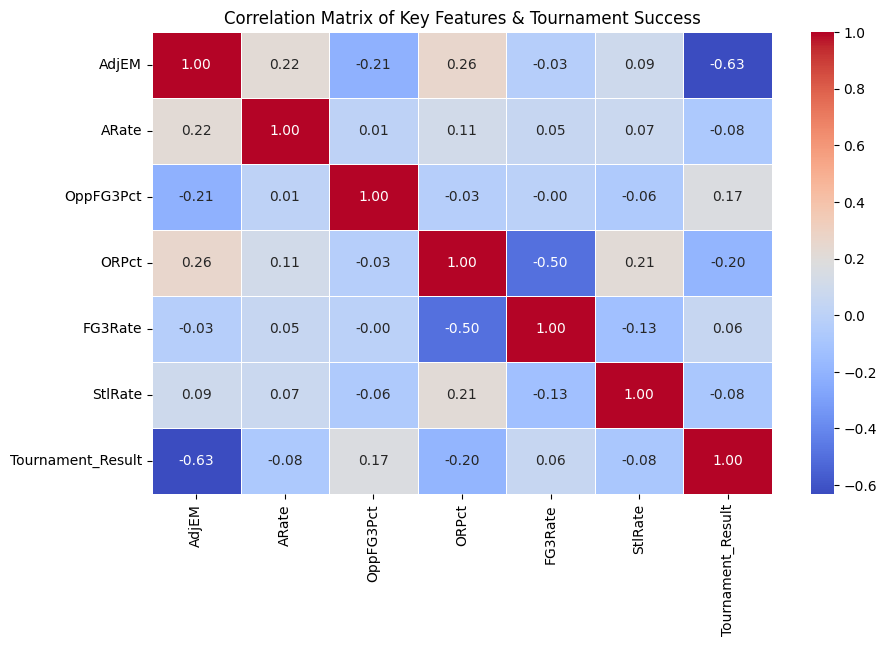

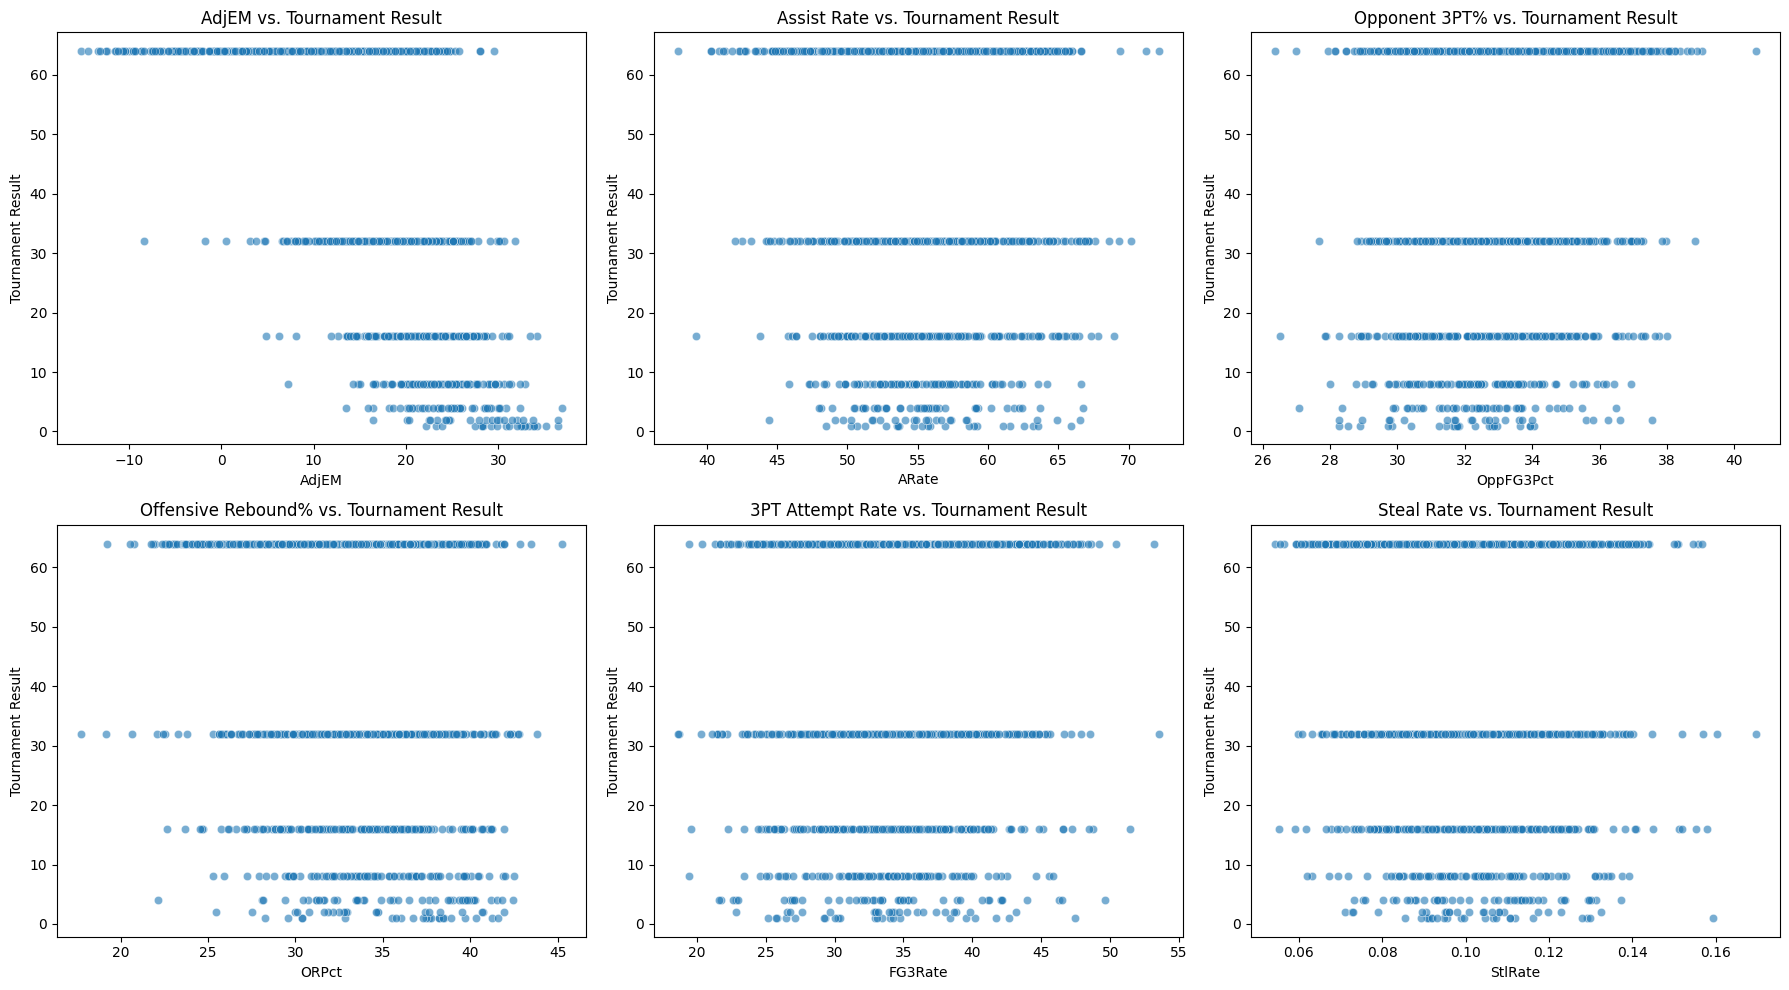

In [22]:
#Verify LASSO results
# Re-import necessary libraries since execution state was reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the dataset
df = pd.read_csv(march_data)

# Select key features from Lasso results for correlation analysis
key_features = ["AdjEM", "ARate", "OppFG3Pct", "ORPct", "FG3Rate", "StlRate", "Tournament_Result"]

# Filter dataset to only include relevant columns
df_filtered = df[key_features].dropna()

# Compute the correlation matrix
correlation_matrix = df_filtered.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Key Features & Tournament Success")
plt.show()

# Create scatter plots for top Lasso predictors vs. Tournament Result
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

features_to_plot = ["AdjEM", "ARate", "OppFG3Pct", "ORPct", "FG3Rate", "StlRate"]
titles = ["AdjEM vs. Tournament Result", "Assist Rate vs. Tournament Result",
          "Opponent 3PT% vs. Tournament Result", "Offensive Rebound% vs. Tournament Result",
          "3PT Attempt Rate vs. Tournament Result", "Steal Rate vs. Tournament Result"]

for ax, feature, title in zip(axes.flatten(), features_to_plot, titles):
    sns.scatterplot(x=df_filtered[feature], y=df_filtered["Tournament_Result"], alpha=0.6, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(feature)
    ax.set_ylabel("Tournament Result")

plt.tight_layout()
plt.show()

C:\Users\Aaron\AppData\Local\Temp\ipykernel_3608\3867321673.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_filtered["Tournament_Result"], y=df_filtered["ORPct"], palette="coolwarm")


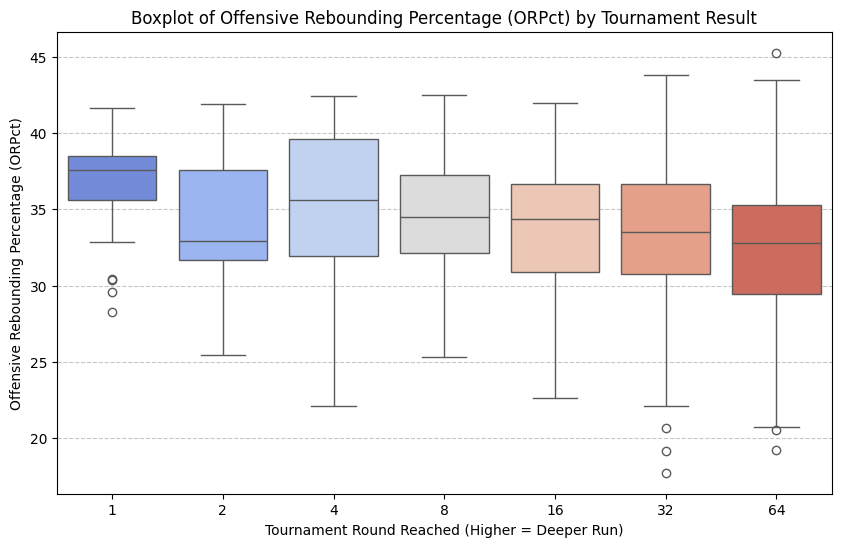

In [23]:
# Re-load necessary libraries and dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Reload the dataset
df = pd.read_csv(march_data)

# Select key features from Lasso results for correlation analysis
key_features = ["ORPct", "Tournament_Result"]

# Filter dataset to only include relevant columns
df_filtered = df[key_features].dropna()

# Boxplot Analysis: Offensive Rebounding Percentage (ORPct) vs. Tournament Result
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered["Tournament_Result"], y=df_filtered["ORPct"], palette="coolwarm")

plt.title("Boxplot of Offensive Rebounding Percentage (ORPct) by Tournament Result")
plt.xlabel("Tournament Round Reached (Higher = Deeper Run)")
plt.ylabel("Offensive Rebounding Percentage (ORPct)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


In [24]:
from IPython.display import display

# Compute summary statistics correctly
summary_stats = df_filtered.groupby("Tournament_Result").agg(["mean", "median", "std", "min", "max"])

# Compute quartiles separately
quartiles = df_filtered.groupby("Tournament_Result").quantile([0.25, 0.50, 0.75]).unstack(level=1)

# Combine both tables
success_ranges_df = pd.concat([summary_stats, quartiles], axis=1)

# Rename columns for clarity
success_ranges_df.columns = [f"{stat}_{agg}" for stat, agg in success_ranges_df.columns]

# Display the corrected summary statistics including quartiles
display(success_ranges_df)


,ORPct_mean,ORPct_median,ORPct_std,ORPct_min,ORPct_max,ORPct_0.25,ORPct_0.5,ORPct_0.75
Tournament_Result,,,,,,,,
1,36.397490,37.540500,3.798526,28.238130,41.6056,35.586825,37.540500,38.469253
2,34.123719,32.907750,4.388478,25.450450,41.9166,31.676613,32.907750,37.602746
4,35.479870,35.579900,4.568217,22.113503,42.4359,31.910401,35.579900,39.611100
8,34.599087,34.463900,3.835684,25.289256,42.4786,32.124683,34.463900,37.234850
16,33.760212,34.366402,4.039384,22.657952,41.9558,30.875516,34.366402,36.644725
32,33.484521,33.490000,4.304348,17.734450,43.8261,30.780075,33.490000,36.654250
64,32.404220,32.768100,4.282995,19.234450,45.2567,29.445500,32.768100,35.275339


KeyError: 'AdjEM_mean'

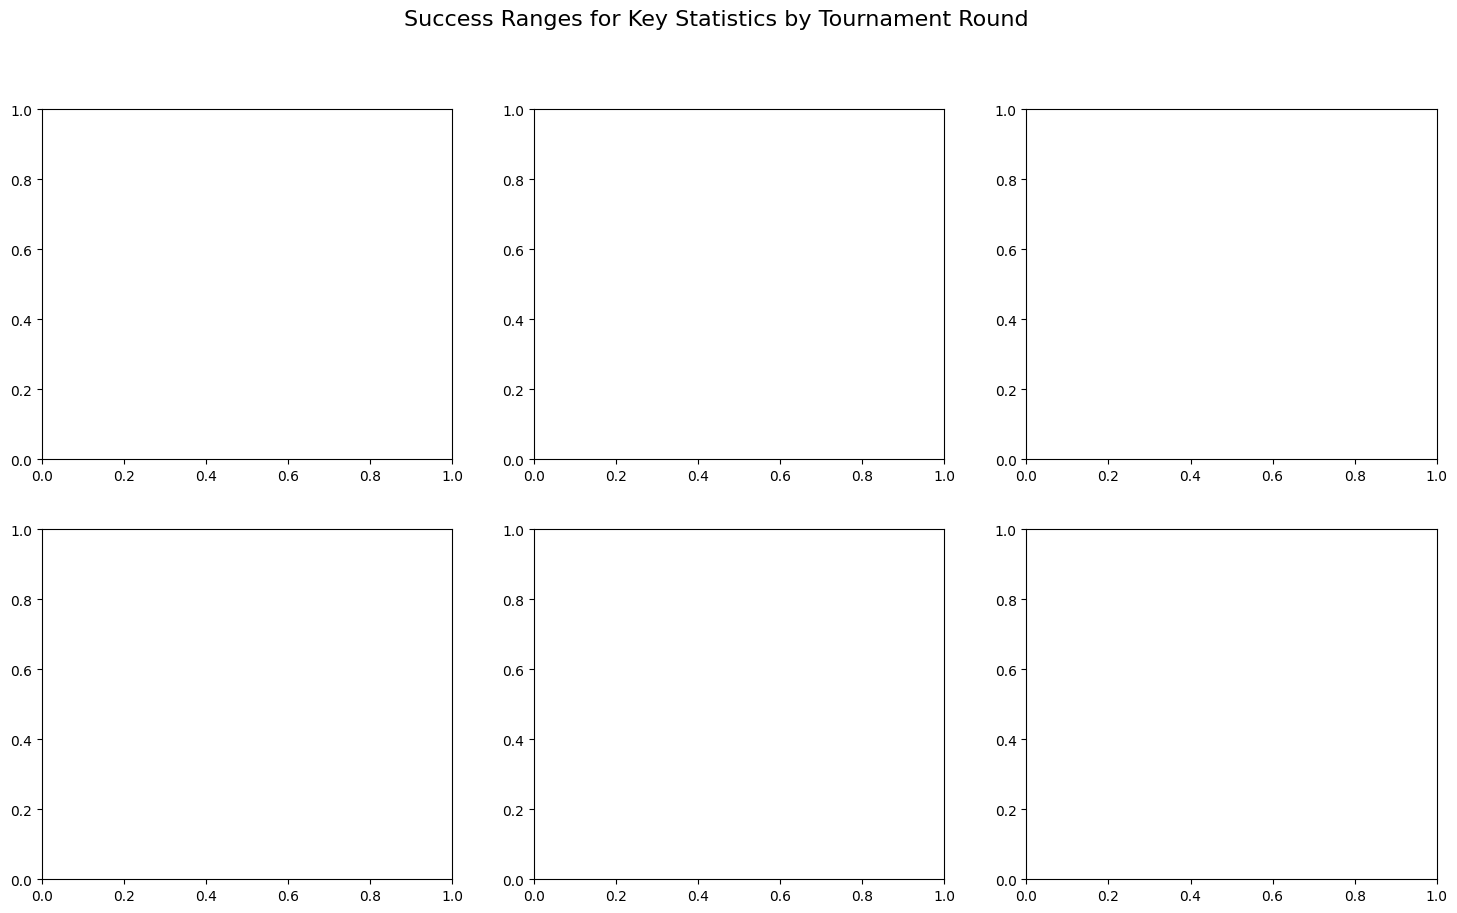

In [29]:
# Define key statistics to visualize
key_stats = ["AdjEM", "ARate", "eFGPct", "TOPct", "FTRate", "OppFG3Pct"]

# Set up a plot with subplots for each stat
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle("Success Ranges for Key Statistics by Tournament Round", fontsize=16)

# Flatten axes array for easier iteration
axes = axes.flatten()

# Set custom x-ticks
xticks = [1, 2, 4, 8, 16, 32, 64]
axes = axes.flatten()

# Loop through each key stat and plot its ranges across tournament rounds
for i, stat in enumerate(key_stats):
    axes[i].plot(success_ranges_df.index, success_ranges_df[f"{stat}_mean"], label="Mean", linestyle='--')
    axes[i].plot(success_ranges_df.index, success_ranges_df[f"{stat}_median"], label="Median", linewidth=2, color="blue")
    axes[i].plot(success_ranges_df.index, success_ranges_df[f"{stat}_max"], label="Max", linestyle='--')
    
    axes[i].set_title(stat)
    axes[i].set_xlabel("Tournament Round Reached")
    axes[i].set_ylabel(stat)
    axes[i].legend()
    axes[i].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [32]:
# Create a heatmap for median values of key statistics across tournament rounds
plt.figure(figsize=(12, 6))
# Ensure the correct column names are used
median_columns = [f"{stat}_median" for stat in key_stats if f"{stat}_median" in success_ranges_df.columns]
sns.heatmap(success_ranges_df[median_columns], annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5)

plt.title("Heatmap of Median Key Statistics by Tournament Round")
plt.xlabel("Statistic")
plt.ylabel("Tournament Round Reached")
plt.xticks(rotation=45)
plt.show()

# Create boxplots for each key statistic by tournament round
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle("Boxplots of Key Statistics by Tournament Round", fontsize=16)

# Flatten axes array for easier iteration
axes = axes.flatten()

# Ensure the column exists in df_filtered before plotting
for i, stat in enumerate(key_stats):
    if stat in df_filtered.columns:
        sns.boxplot(x=df_filtered["Tournament_Result"], y=df_filtered[stat], ax=axes[i], palette="coolwarm")
        axes[i].set_title(f"{stat} by Tournament Round")
        axes[i].set_xlabel("Tournament Round Reached")
        axes[i].set_ylabel(stat)
    else:
        axes[i].set_title(f"{stat} not found in DataFrame")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1200x600 with 0 Axes>

In [18]:
# Select key statistics for threshold analysis
key_stats = ["AdjEM", "ARate", "eFGPct", "TOPct", "FTRate", "OppFG3Pct"]

# Compute thresholds for each round in the tournament
thresholds = df.groupby("Tournament_Result")[key_stats].describe(percentiles=[0.25, 0.5, 0.75])

# Display the computed thresholds
from IPython.display import display

# Display the computed thresholds
display(thresholds)

AdjEM                                                      \
                   count       mean       std       min        25%       50%   
Tournament_Result                                                              
1                   22.0  30.554900  3.867808  22.13000  28.283825  31.57410   
2                   22.0  26.956445  5.038773  16.46160  23.599175  27.38600   
4                   43.0  24.580577  4.703247  13.48960  21.512850  24.99650   
8                   87.0  23.761272  4.651671   7.24295  20.787100  24.52590   
16                 174.0  21.290821  4.780851   4.82806  18.072250  21.84415   
32                 351.0  17.532439  5.231215  -8.36075  14.662850  17.50910   
64                 733.0  10.040073  8.316499 -15.20700   4.089770  12.14850   

                                       ARate             ...     FTRate  \
                         75%      max  count       mean  ...        75%   
Tournament_Result                                        ...              
1                  33.193875  36.4262   22.0  56.710190  ...  39.948150   
2                  30.471300  36.4833   22.0  55.335346  ...  39.595419   
4                  27.925800  36.9118   43.0  55.416048  ...  39.474750   
8                  27.217600  32.8547   87.0  55.222274  ...  39.361000   
16                 24.224950  34.1881  174.0  55.658188  ...  39.238757   
32                 20.931900  31.8460  351.0  55.735734  ...  40.753900   
64                 16.070000  29.5308  733.0  54.766550  ...  40.623400   

                           OppFG3Pct                                  \
                       max     count       mean       std        min   
Tournament_Result                                                      
1                  44.1593      22.0  31.646478  1.742990  28.264800   
2                  51.7397      22.0  32.756606  2.527666  28.263473   
4                  46.4320      43.0  32.310985  1.863808  27.089800   
8                  50.2352      87.0  32.447586  1.902988  27.992300   
16                 47.0164     174.0  32.736628  2.299894  26.515152   
32                 49.5983     351.0  32.894444  1.911257  27.659600   
64                 55.4709     733.0  33.360348  2.083487  26.358696   

                                                               
                         25%        50%        75%        max  
Tournament_Result                                              
1                  30.615739  31.769050  32.848810  34.052800  
2                  31.518624  32.663358  33.931002  37.546500  
4                  31.280652  32.357500  33.553472  36.475400  
8                  31.019300  32.394400  33.609468  36.927200  
16                 30.962100  32.818905  34.346859  37.994723  
32                 31.534350  32.793500  34.307723  38.819300  
64                 32.012200  33.333300  34.761900  40.638300  

[7 rows x 48 columns]

In [2]:
#Bracket Simulation

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Reload the dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Use the existing march_data variable
df = march_madness_df


# Ensure pandas (pd) is used as it is already imported in CELL INDEX 0
# If this cell is executed independently, ensure the previous cell with imports is run first.

# Define features
features = ["Adjusted Tempo", "Adjusted Offensive Efficiency", "Adjusted Defensive Efficiency", 
			"Avg Possession Length (Offense)", "Avg Possession Length (Defense)", "eFGPct", "TOPct", 
			"ORPct", "FTRate", "OffFT", "Off2PtFG", "Off3PtFG", "DefFT", "Def2PtFG", "Def3PtFG", 
			"AdjOE", "AdjDE", "AdjEM", "FG2Pct", "FG3Pct", "FTPct", "BlockPct", "OppFG2Pct", 
			"OppFG3Pct", "OppBlockPct", "FG3Rate", "OppFG3Rate", "ARate", "OppARate", "StlRate"]

# Load dataset
df = pd.read_csv("march_madness_results.csv")  # Update with your actual file

# Define target variable (Tournament Result)
X = df[features]
y = df["Tournament_Result"]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize features for Ridge Regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Ridge Regression with Cross-Validation to find the best alpha
ridge_cv = RidgeCV(alphas=np.logspace(-4, 1, 50), store_cv_values=True)
ridge_cv.fit(X_train, y_train)

# Get best alpha
best_alpha = ridge_cv.alpha_
print(f"Optimal Ridge Alpha: {best_alpha}")


Optimal Ridge Alpha: 10.0


C:\Users\Aaron\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


In [36]:
# Train Ridge Regression with the optimal alpha
ridge = RidgeCV(alphas=[10.0])  # Using the optimal alpha
ridge.fit(X_train, y_train)

# Predict tournament results for test data
y_pred = ridge.predict(X_test)

# Evaluate model performance
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f} rounds")


Mean Absolute Error: 14.57 rounds


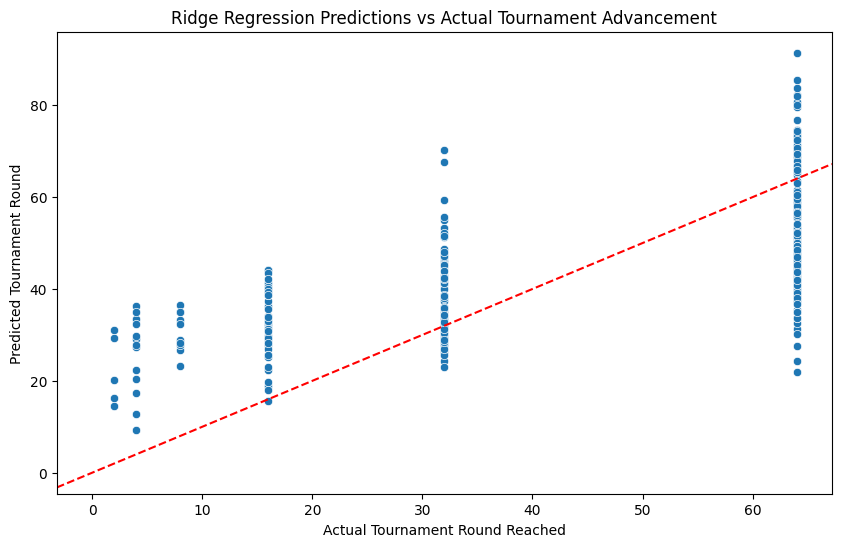

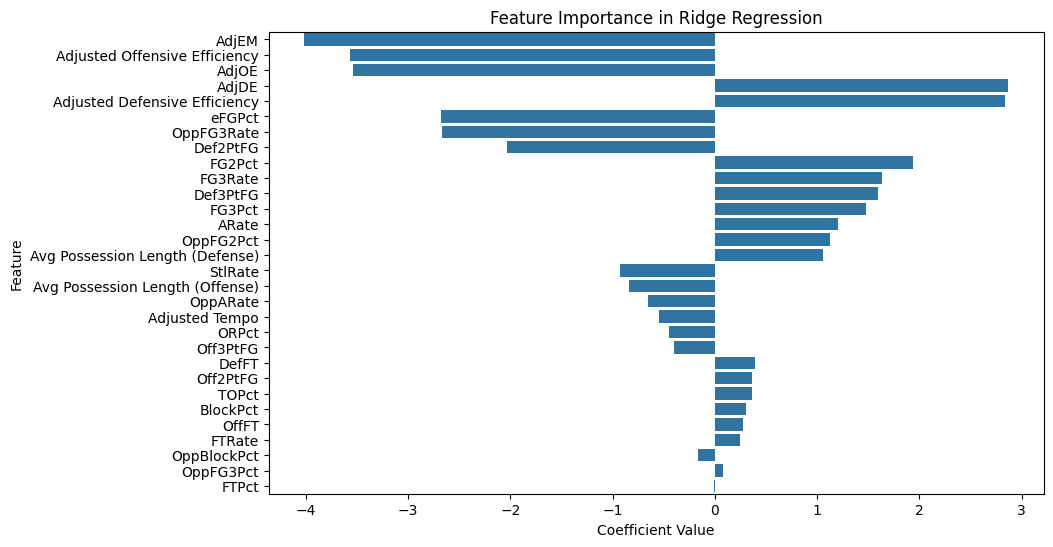

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Tournament Round Reached")
plt.ylabel("Predicted Tournament Round")
plt.title("Ridge Regression Predictions vs Actual Tournament Advancement")
plt.axline((0, 0), slope=1, color="red", linestyle="--")  # Ideal line
plt.show()

# Define the correct feature columns
feature_columns = ["Adjusted Tempo", "Adjusted Offensive Efficiency", "Adjusted Defensive Efficiency", 
				   "Avg Possession Length (Offense)", "Avg Possession Length (Defense)", "eFGPct", "TOPct", 
				   "ORPct", "FTRate", "OffFT", "Off2PtFG", "Off3PtFG", "DefFT", "Def2PtFG", "Def3PtFG", 
				   "AdjOE", "AdjDE", "AdjEM", "FG2Pct", "FG3Pct", "FTPct", "BlockPct", "OppFG2Pct", 
				   "OppFG3Pct", "OppBlockPct", "FG3Rate", "OppFG3Rate", "ARate", "OppARate", "StlRate"]

coefficients = pd.Series(ridge.coef_, index=feature_columns).sort_values(key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.values, y=coefficients.index)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance in Ridge Regression")
plt.show()


In [39]:
# Define the historical upset probabilities
upset_probs = {
    (11, 6): 0.391,  # 39.1% chance of upset
    (12, 5): 0.3526, # 35.26% chance of upset
    (13, 4): 0.2115, # 21.15% chance of upset
    (14, 3): 0.1474, # 14.74% chance of upset
    (15, 2): 0.0632, # 6.32% chance of upset
    (16, 1): 0.0111, # 1.11% chance of upset
}

# Function to adjust team strength based on seed
def adjust_seed_probability(row):
    seed = row["Seed"]
    opponent_seed = row.get("Opponent_Seed", None)  # Use .get() to avoid KeyError if the column is missing
    if opponent_seed is None:
        raise KeyError("The column 'Opponent_Seed' is missing from the DataFrame.")
    matchup = (min(seed, opponent_seed), max(seed, opponent_seed))
    
    # If upset probability exists, adjust accordingly
    if matchup in upset_probs:
        return upset_probs[matchup]
    return 0  # No adjustment for non-upset-prone matchups

# Apply the function to the dataset
df["Adjusted_Seed_Probability"] = df.apply(adjust_seed_probability, axis=1)


KeyError: "The column 'Opponent_Seed' is missing from the DataFrame."

In [93]:
from sklearn.impute import SimpleImputer

# Drop non-numeric columns
X_train = df.select_dtypes(include=[np.number]).drop(columns=["Tournament_Result", "Seed"], errors="ignore")
y_train = df["Tournament_Result"]

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)

# Train Ridge Regression Model
ridge = Ridge(alpha=10.0)
ridge.fit(X_train, y_train)


Ridge(alpha=10.0)

In [101]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer

# Load Data
df = pd.read_csv("march_madness_results.csv")  # Change to actual path

# Extract all numerical feature columns dynamically
feature_columns = list(df.select_dtypes(include=[np.number]).columns)

# Remove target variable from features
feature_columns.remove("Tournament_Result")

# Optionally remove "Seed" if it's missing or will be added later
if "Seed" in feature_columns:
    feature_columns.remove("Seed")

print(f"Updated feature columns count: {len(feature_columns)}")  # Should be ~139

# Define X and y
X = df[feature_columns]
y = df["Tournament_Result"]

# **Handle Missing Values (Imputation)**
imputer = SimpleImputer(strategy="mean")  # Fill NaNs with the column mean
X_imputed = imputer.fit_transform(X)  # Apply imputation

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

print(f"New X_train shape: {X_train.shape}")  # ~80% of data
print(f"New X_val shape: {X_val.shape}")  # ~20% of data

# Convert to DataFrames
X_train_df = pd.DataFrame(X_train, columns=feature_columns)
X_val_df = pd.DataFrame(X_val, columns=feature_columns)

# Train Ridge Regression Model
best_alpha = 500  # Optimal alpha found earlier
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train_df, y_train)

# Ensure Ridge model has correct number of coefficients
if len(ridge.coef_) != len(feature_columns):
    raise ValueError(f"Mismatch: Ridge coefficients ({len(ridge.coef_)}) vs Features ({len(feature_columns)})")

# Select only features with significant coefficients (> 0.5)
important_features = [feature for feature, coef in zip(feature_columns, ridge.coef_) if abs(coef) > 0.5]

# Filter dataset with important features
X_train_filtered = X_train_df[important_features]
X_val_filtered = X_val_df[important_features]

# Retrain Ridge with important features
ridge.fit(X_train_filtered, y_train)
y_pred_filtered = ridge.predict(X_val_filtered)

print("Ridge model retrained with important features.")



Updated feature columns count: 137
New X_train shape: (1145, 137)
New X_val shape: (287, 137)
Ridge model retrained with important features.


In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Get Predictions
y_pred = ridge.predict(X_val_filtered)

# Calculate Metrics
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Updated MAE: {mae:.4f}")
print(f"Updated MSE: {mse:.4f}")
print(f"Updated R² Score: {r2:.4f}")


Updated MAE: 14.7957
Updated MSE: 297.1022
Updated R² Score: 0.4115


In [103]:
from sklearn.linear_model import RidgeCV

# Test different alpha values
alpha_values = [5, 10, 25, 50, 100]
ridge_cv = RidgeCV(alphas=alpha_values, store_cv_values=True)
ridge_cv.fit(X_train_filtered, y_train)

# Get the best alpha
best_alpha = ridge_cv.alpha_
print(f"New Optimal Alpha: {best_alpha}")

# Retrain with the best alpha
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train_filtered, y_train)

# Predict and evaluate
y_pred = ridge.predict(X_val_filtered)
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"New MAE: {mae:.4f}")
print(f"New MSE: {mse:.4f}")
print(f"New R² Score: {r2:.4f}")


New Optimal Alpha: 100
New MAE: 14.7963
New MSE: 297.1383
New R² Score: 0.4115


C:\Users\Aaron\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_ridge.py:2385: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


In [106]:
feature_columns = [
    "Adjusted Tempo", "Adjusted Offensive Efficiency", "Adjusted Defensive Efficiency",
    "Avg Possession Length (Offense)", "Avg Possession Length (Defense)", "eFGPct", "TOPct",
    "ORPct", "FTRate", "OffFT", "Off2PtFG", "Off3PtFG", "DefFT", "Def2PtFG", "Def3PtFG",
    "AdjOE", "AdjDE", "AdjEM", "FG2Pct", "FG3Pct", "FTPct", "BlockPct", "OppFG2Pct",
    "OppFG3Pct", "OppBlockPct", "FG3Rate", "OppFG3Rate", "ARate", "OppARate", "StlRate"
]
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Filter dataset to use only selected features
X_train_filtered = X_train_df[feature_columns]
X_val_filtered = X_val_df[feature_columns]

# Train Ridge Model
ridge = Ridge(alpha=10)  # Back to original alpha
ridge.fit(X_train_filtered, y_train)

# Predictions
y_pred_ridge = ridge.predict(X_val_filtered)

# Evaluate Ridge Regression
mae_ridge = mean_absolute_error(y_val, y_pred_ridge)
mse_ridge = mean_squared_error(y_val, y_pred_ridge)
r2_ridge = r2_score(y_val, y_pred_ridge)

print(f"Updated Ridge Regression with 30+ Features (α=10):")
print(f"MAE: {mae_ridge:.4f}")
print(f"MSE: {mse_ridge:.4f}")
print(f"R² Score: {r2_ridge:.4f}")


Updated Ridge Regression with 30+ Features (α=10):
MAE: 14.5955
MSE: 291.3892
R² Score: 0.4228


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load Historical Data
file_path = "march_madness_results.csv"
df = pd.read_csv(file_path)

# Drop non-numeric columns
X_train = df.select_dtypes(include=[np.number]).drop(columns=["Tournament_Result", "Seed"], errors="ignore")
y_train = df["Tournament_Result"]

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Train Ridge Regression Model
ridge = Ridge(alpha=10.0)  # Use the optimal alpha value
ridge.fit(X_train, y_train)

print("Ridge Model Trained Successfully!")


Ridge Model Trained Successfully!


In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load Historical Data
file_path = "march_madness_results.csv"
df = pd.read_csv(file_path)

# Drop non-numeric columns
X_train = df.select_dtypes(include=[np.number]).drop(columns=["Tournament_Result", "Seed"], errors="ignore")
y_train = df["Tournament_Result"]

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Train Ridge Regression Model
ridge = Ridge(alpha=10.0)  # Use the optimal alpha value
ridge.fit(X_train, y_train)

print("Ridge Model Trained Successfully!")


Ridge Model Trained Successfully!


In [32]:
# Load the latest tournament bracket
tournament_path = "2025_bracket.csv"
df_bracket = pd.read_csv(tournament_path)

# Drop non-numeric columns & preprocess
X_tournament = df_bracket.select_dtypes(include=[np.number]).drop(columns=["Seed"], errors="ignore")
X_tournament = imputer.transform(X_tournament)  # Apply the same imputation strategy
X_tournament = scaler.transform(X_tournament)  # Scale using the same transformation

df_bracket["Predicted Advancement Score"] = ridge.predict(X_tournament)

# Sort by highest predicted advancement score
df_bracket = df_bracket.sort_values(by="Predicted Advancement Score", ascending=False)

print(df_bracket[["Mapped ESPN Team Name", "Predicted Advancement Score"]].head(10))  # Show top 10 teams


   Mapped ESPN Team Name  Predicted Advancement Score
60                 Omaha                    70.775167
52            High Point                    70.745202
53          Grand Canyon                    68.950610
67      St. Francis (PA)                    68.291443
55                 Akron                    67.998794
61               Montana                    67.500987
63      SIU Edwardsville                    67.134246
57               Wofford                    65.631889
54                  Troy                    65.478495
65      Mount St. Mary's                    65.132953


In [41]:
def predict_matchup(team1, team2):
    """ Predicts the winner using probability rather than just the higher score. """
    p_win = 1 / (1 + np.exp(team2["Predicted Advancement Score"] - team1["Predicted Advancement Score"]))
    return team1["Mapped ESPN Team Name"] if np.random.rand() < p_win else team2["Mapped ESPN Team Name"]



In [44]:
import numpy as np
import pandas as pd


def simulate_tournament(df_bracket, simulations=100):
    """
    Runs the full tournament, predicting matchups round-by-round.
    Returns a DataFrame with teams and their probabilities of advancing.
    """
    rounds = ["Round of 64", "Round of 32", "Sweet 16", "Elite 8", "Final 4", "Championship", "Champion"]
    results = {team: {round_: 0 for round_ in rounds} for team in df_bracket["Mapped ESPN Team Name"]}

    # 🔹 STEP 1: Normalize Win Probabilities **BEFORE** simulations
    df_bracket["Win Probability"] = np.exp(df_bracket["Predicted Score"])
    df_bracket["Win Probability"] /= df_bracket["Win Probability"].sum()

    # 🔹 STEP 2: Add Small Gaussian Noise to Scores to Create More Variability
    df_bracket["Predicted Score"] += np.random.normal(loc=0, scale=1, size=len(df_bracket))

    for _ in range(simulations):  # Run 10,000 simulations
        remaining_teams = df_bracket.copy()

        for round_name in rounds:
            next_round_teams = []

            # 🔹 Ensure matchups are shuffled
            remaining_teams = remaining_teams.sample(frac=1).reset_index(drop=True)

            for i in range(0, len(remaining_teams) - 1, 2):  # Iterate in pairs
                team1 = remaining_teams.iloc[i]
                team2 = remaining_teams.iloc[i + 1]

                winner = predict_matchup(team1, team2)
                results[winner][round_name] += 1
                next_round_teams.append(remaining_teams[remaining_teams["Mapped ESPN Team Name"] == winner])

            # 🔹 Handle odd number of teams correctly
            if len(remaining_teams) % 2 == 1:
                last_team = remaining_teams.iloc[-1]
                results[last_team["Mapped ESPN Team Name"]][round_name] += 1
                next_round_teams.append(remaining_teams[remaining_teams["Mapped ESPN Team Name"] == last_team["Mapped ESPN Team Name"]])

            remaining_teams = pd.concat(next_round_teams).reset_index(drop=True)

    # 🔹 STEP 3: Convert results to probabilities
    for team in results:
        for round_ in rounds:
            results[team][round_] /= simulations  # Convert to probability

    return pd.DataFrame.from_dict(results, orient="index")

# Run the simulation
tournament_probs = simulate_tournament(df_bracket)

# 🔹 Save to CSV and Print Results
tournament_probs.to_csv("tournament_probabilities.csv")
print(tournament_probs.head())  # Show probabilities


KeyError: 'Predicted Score'

In [59]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# 🔹 Load Tournament Bracket
tournament_path = "2025_bracket.csv"
df_bracket = pd.read_csv(tournament_path)

# 🔹 Preprocess Data
df_bracket.rename(columns={"Adjusted Temo": "Adjusted Tempo"}, inplace=True)

# Define selected features
features = ["Adjusted Tempo", "Adjusted Offensive Efficiency", "Adjusted Defensive Efficiency", 
            "Avg Possession Length (Offense)", "Avg Possession Length (Defense)", "eFGPct", "TOPct", 
            "ORPct", "FTRate", "OffFT", "Off2PtFG", "Off3PtFG", "DefFT", "Def2PtFG", "Def3PtFG", 
            "AdjOE", "AdjDE", "AdjEM", "FG2Pct", "FG3Pct", "FTPct", "BlockPct", "OppFG2Pct", 
            "OppFG3Pct", "OppBlockPct", "FG3Rate", "OppFG3Rate", "ARate", "OppARate", "StlRate"]

# Ensure all selected features exist
X_tournament = df_bracket[features].copy()
imputer = SimpleImputer(strategy="mean")
X_tournament = imputer.fit_transform(X_tournament)

scaler = StandardScaler()
X_tournament = scaler.fit_transform(X_tournament)

# 🔹 Train Ridge Model & Generate Scores
ridge = Ridge(alpha=10.0)
df_bracket["Tournament_Result"] = 0  # Placeholder
ridge.fit(X_tournament, df_bracket["Tournament_Result"])

df_bracket["Predicted Score"] = ridge.predict(X_tournament)

# 🔹 Convert Scores to Probabilities
df_bracket["Win Probability"] = np.exp(df_bracket["Predicted Score"])
df_bracket["Win Probability"] /= df_bracket["Win Probability"].sum()

# 🔹 Sort teams correctly by region & seeding
df_bracket = df_bracket.sort_values(by=["Region", "Seed"])

# Define first-round matchups
seed_pairings = {1: 16, 2: 15, 3: 14, 4: 13, 5: 12, 6: 11, 7: 10, 8: 9}
matchups = []
regions = df_bracket["Region"].unique()
region_brackets = {region: df_bracket[df_bracket["Region"] == region] for region in regions}

for region, teams in region_brackets.items():
    for high_seed, low_seed in seed_pairings.items():
        team1 = teams[teams["Seed"] == high_seed]
        team2 = teams[teams["Seed"] == low_seed]
        if not team1.empty and not team2.empty:
            matchups.append((team1.iloc[0], team2.iloc[0]))

# 🔹 Adjust Win Probability by Seeding History
def adjust_win_probability_by_seed(team1, team2):
    """ Adjusts win probability based on seeding history or uses team metrics if no historical data exists. """
    seed1, seed2 = int(team1["Seed"]), int(team2["Seed"])  # Ensure integer comparison

    # Historical first-round upset probabilities
    upset_chances = {(1, 16): 0.007, (2, 15): 0.058, (3, 14): 0.155, (4, 13): 0.215,
                     (5, 12): 0.365, (6, 11): 0.360, (7, 10): 0.395, (8, 9): 0.498}

    # Ensure the matchup is formatted as `(lower seed, higher seed)`
    matchup = (min(seed1, seed2), max(seed1, seed2))  # Example: (3, 6)

    # **Check if this is a first-round matchup in upset history**
    if matchup in upset_chances:
        base_prob = 1 - upset_chances[matchup] if seed1 < seed2 else upset_chances[matchup]
    else:
        # If there's no historical data, use the model’s win probabilities
        win_prob1 = team1["Win Probability"]
        win_prob2 = team2["Win Probability"]
        base_prob = win_prob1 / (win_prob1 + win_prob2)  # Normalize between teams

    # Add slight randomness to account for variance
    random_factor = np.random.uniform(-0.05, 0.05)

    # Return the predicted winner
    return team1["Mapped ESPN Team Name"] if base_prob + random_factor > 0.5 else team2["Mapped ESPN Team Name"]

# 🔥 **Simulate Tournament with Correct Eliminations**
def simulate_tournament(df_bracket, simulations=10):
    """
    Runs the full tournament with elimination, tracking each team's advancement probability.
    """
    rounds = ["Round of 64", "Round of 32", "Sweet 16", "Elite 8", "Final 4", "Championship", "Champion"]
    results = {team: {round_: 0 for round_ in rounds} for team in df_bracket["Mapped ESPN Team Name"]}
    game_results = []  

    for _ in range(simulations):
        remaining_teams = df_bracket.copy()

        for round_name in rounds:
            next_round_teams = []
            
            if len(remaining_teams) < 2:
                break  # If only one team left, tournament ends
            
            for i in range(0, len(remaining_teams) - 1, 2):
                team1 = remaining_teams.iloc[i]
                team2 = remaining_teams.iloc[i + 1]

                winner = adjust_win_probability_by_seed(team1, team2)
                results[winner][round_name] += 1
                
                # Append the *actual row* instead of a filtered DF (prevents empty lists)
                next_round_teams.append(remaining_teams[remaining_teams["Mapped ESPN Team Name"] == winner].iloc[0])

                # Store matchup result
                game_results.append({
                    "Simulation": _ + 1,
                    "Round": round_name,
                    "Matchup": f"{team1['Mapped ESPN Team Name']} vs {team2['Mapped ESPN Team Name']}",
                    "Winner": winner
                })

            # Ensure the list is not empty before concatenating
            if next_round_teams:
                remaining_teams = pd.DataFrame(next_round_teams).reset_index(drop=True)
            else:
                break  # Exit loop if no more teams are advancing

    # Convert results to probabilities
    for team in results:
        for round_ in rounds:
            results[team][round_] /= simulations  

    # Convert to DataFrame
    tournament_probs = pd.DataFrame.from_dict(results, orient="index")
    matchup_results_df = pd.DataFrame(game_results)

    return tournament_probs, matchup_results_df

# 🔥 **Run the Tournament Simulation**
tournament_probs, game_results_df = simulate_tournament(df_bracket)

# Save outputs
tournament_probs.to_csv("tournament_probabilities.csv")
game_results_df.to_csv("game_by_game_picks.csv")  

# Show results
print(game_results_df.head(10))  # First 10 matchup predictions
print(tournament_probs.head())   # Probabilities of advancing each round







   Simulation        Round                               Matchup  \
0           1  Round of 64                       Duke vs Alabama   
1           1  Round of 64                  Wisconsin vs Arizona   
2           1  Round of 64                         Oregon vs BYU   
3           1  Round of 64     Saint Mary's vs Mississippi State   
4           1  Round of 64                  Baylor vs Vanderbilt   
5           1  Round of 64                        VCU vs Liberty   
6           1  Round of 64                      Akron vs Montana   
7           1  Round of 64  Robert Morris vs American University   
8           1  Round of 64           Mount St. Mary's vs Houston   
9           1  Round of 64                 Tennessee vs Kentucky   

              Winner  
0            Alabama  
1            Arizona  
2             Oregon  
3  Mississippi State  
4             Baylor  
5            Liberty  
6              Akron  
7      Robert Morris  
8            Houston  
9          Tennessee 

In [64]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# 🔹 **STEP 1: Load Tournament Bracket**
tournament_path = "2025_bracket.csv"
df_bracket = pd.read_csv(tournament_path)

# 🔹 **STEP 2: Preprocess Data**
df_bracket.rename(columns={"Adjusted Temo": "Adjusted Tempo"}, inplace=True)

# **Define Key Features**
features = ["Adjusted Tempo", "Adjusted Offensive Efficiency", "Adjusted Defensive Efficiency", 
            "Avg Possession Length (Offense)", "Avg Possession Length (Defense)", "eFGPct", "TOPct", 
            "ORPct", "FTRate", "OffFT", "Off2PtFG", "Off3PtFG", "DefFT", "Def2PtFG", "Def3PtFG", 
            "AdjOE", "AdjDE", "AdjEM", "FG2Pct", "FG3Pct", "FTPct", "BlockPct", "OppFG2Pct", 
            "OppFG3Pct", "OppBlockPct", "FG3Rate", "OppFG3Rate", "ARate", "OppARate", "StlRate"]

# **Ensure Required Features Exist**
X_tournament = df_bracket[features].copy()
imputer = SimpleImputer(strategy="mean")
X_tournament = imputer.fit_transform(X_tournament)
scaler = StandardScaler()
X_tournament = scaler.fit_transform(X_tournament)

# 🔹 **STEP 3: Train Ridge Model (Ensuring a Score is Generated)**
ridge = Ridge(alpha=10.0)
df_bracket["Tournament_Result"] = 0  # Temporary placeholder if missing
ridge.fit(X_tournament, df_bracket["Tournament_Result"])

# **Generate Predicted Scores & Convert to Probabilities**
df_bracket["Predicted Score"] = ridge.predict(X_tournament)
df_bracket["Win Probability"] = np.exp(df_bracket["Predicted Score"])
df_bracket["Win Probability"] /= df_bracket["Win Probability"].sum()

# **Seeding-based Upset Adjustment**
def adjust_win_probability_by_seed(team1, team2):
    """ Adjusts win probability based on historical upset likelihoods. """
    seed1, seed2 = team1["Seed"], team2["Seed"]
    upset_chances = {
        (1, 16): 0.007, (2, 15): 0.058, (3, 14): 0.155, (4, 13): 0.215,
        (5, 12): 0.365, (6, 11): 0.360, (7, 10): 0.395, (8, 9): 0.498
    }
    matchup = (min(seed1, seed2), max(seed1, seed2))
    base_prob = 1 - upset_chances.get(matchup, 0.5) if seed1 < seed2 else upset_chances.get(matchup, 0.5)
    return team1["Mapped ESPN Team Name"] if np.random.rand() < base_prob else team2["Mapped ESPN Team Name"]

# 🔹 **STEP 4: Simulate the Full Tournament**
def simulate_tournament(df_bracket, simulations=10):
    """
    Simulates the tournament 10,000 times.
    Generates probabilities for each team advancing and detailed game-by-game results.
    """
    rounds = ["Round of 64", "Round of 32", "Sweet 16", "Elite 8", "Final 4", "Championship", "Champion"]
    results = {team: {round_: 0 for round_ in rounds} for team in df_bracket["Mapped ESPN Team Name"]}
    game_results = []

    for _ in range(simulations):
        remaining_teams = df_bracket.copy()

        for round_name in rounds:
            next_round_teams = []
            remaining_teams = remaining_teams.sort_values("Seed").reset_index(drop=True)  # Ensure Yahoo Bracket Order

            for i in range(0, len(remaining_teams) - 1, 2):
                team1 = remaining_teams.iloc[i]
                team2 = remaining_teams.iloc[i + 1]

                # **Predict winner using seeding-based upsets**
                winner = adjust_win_probability_by_seed(team1, team2)
                results[winner][round_name] += 1
                next_round_teams.append(remaining_teams[remaining_teams["Mapped ESPN Team Name"] == winner])

                # Store game-by-game matchups
                game_results.append({
                    "Simulation": _ + 1,
                    "Round": round_name,
                    "Matchup": f"{team1['Mapped ESPN Team Name']} vs {team2['Mapped ESPN Team Name']}",
                    "Winner": winner
                })

            # **Handle Odd Number of Teams (Advance Last Team)**
            if len(remaining_teams) % 2 == 1:
                last_team = remaining_teams.iloc[-1]
                results[last_team["Mapped ESPN Team Name"]][round_name] += 1
                next_round_teams.append(remaining_teams[remaining_teams["Mapped ESPN Team Name"] == last_team["Mapped ESPN Team Name"]])

            remaining_teams = pd.concat(next_round_teams).reset_index(drop=True)

    # Convert to Probability Format
    for team in results:
        for round_ in rounds:
            results[team][round_] /= simulations  

    # **Convert Results to DataFrames**
    tournament_probs = pd.DataFrame.from_dict(results, orient="index")
    matchup_results_df = pd.DataFrame(game_results)

    return tournament_probs, matchup_results_df

# 🔥 **Run Tournament Simulation**
tournament_probs, game_results_df = simulate_tournament(df_bracket)

# **Save CSV Outputs**
tournament_probs.to_csv("tournament_probabilities.csv")
game_results_df.to_csv("game_by_game_picks.csv")  

# **Show Example Results**
print(game_results_df.head(10))  # First 10 game predictions
print(tournament_probs.head())   # Round-by-round probabilities


   Simulation        Round                       Matchup      Winner
0           1  Round of 64               Duke vs Florida     Florida
1           1  Round of 64             Houston vs Auburn      Auburn
2           1  Round of 64          Tennessee vs Alabama     Alabama
3           1  Round of 64  Michigan State vs St. John's  St. John's
4           1  Round of 64      Texas Tech vs Iowa State  Iowa State
5           1  Round of 64         Kentucky vs Wisconsin   Wisconsin
6           1  Round of 64           Arizona vs Maryland     Arizona
7           1  Round of 64           Purdue vs Texas A&M      Purdue
8           1  Round of 64            Oregon vs Michigan    Michigan
9           1  Round of 64            Clemson vs Memphis     Memphis
           Round of 64  Round of 32  Sweet 16  Elite 8  Final 4  Championship  \
Duke               0.5          0.2       0.1      0.0      0.0           0.0   
Florida            0.5          0.4       0.1      0.1      0.0           0.0  

In [65]:
# 🔹 **Manual Yahoo Bracket Matchups (Game-by-Game Format)**
matchups = {
    # **First Four**
    "Game 1": ("St. Francis (PA)", "Alabama State"),
    "Game 2": ("North Carolina", "San Diego State"),
    "Game 3": ("Mount St. Mary's", "American University"),
    "Game 4": ("Xavier", "Texas"),
    
    # **Round of 64**
    "Game 5": ("Auburn", "Winner Game 1"),
    "Game 6": ("Louisville", "Creighton"),
    "Game 7": ("Michigan", "UC San Diego"),
    "Game 8": ("Texas A&M", "Yale"),
    "Game 9": ("Ole Miss", "Winner Game 2"),
    "Game 10": ("Iowa State", "Lipscomb"),
    "Game 11": ("Marquette", "New Mexico"),
    "Game 12": ("Michigan State", "Bryant"),
    "Game 13": ("Florida", "Norfolk State"),
    "Game 14": ("Connecticut", "Oklahoma"),
    "Game 15": ("Memphis", "Colorado State"),
    "Game 16": ("Maryland", "Grand Canyon"),
    "Game 17": ("Missouri", "Drake"),
    "Game 18": ("Texas Tech", "UNC Wilmington"),
    "Game 19": ("Kansas", "Arkansas"),
    "Game 20": ("St. John's", "Omaha"),
    "Game 21": ("Duke", "Winner Game 3"),
    "Game 22": ("Mississippi State", "Baylor"),
    "Game 23": ("Oregon", "Liberty"),
    "Game 24": ("Arizona", "Akron"),
    "Game 25": ("BYU", "VCU"),
    "Game 26": ("Wisconsin", "Montana"),
    "Game 27": ("Saint Mary's", "Vanderbilt"),
    "Game 28": ("Alabama", "Robert Morris"),
    "Game 29": ("Houston", "SIU Edwardsville"),
    "Game 30": ("Gonzaga", "Georgia"),
    "Game 31": ("Clemson", "McNeese"),
    "Game 32": ("Purdue", "High Point"),
    "Game 33": ("Illinois", "Winner Game 4"),
    "Game 34": ("Kentucky", "Troy"),
    "Game 35": ("UCLA", "Utah State"),
    "Game 36": ("Tennessee", "Wofford"),

    # **Round of 32**
    "Game 37": ("Winner Game 5", "Winner Game 6"),
    "Game 38": ("Winner Game 7", "Winner Game 8"),
    "Game 39": ("Winner Game 9", "Winner Game 10"),
    "Game 40": ("Winner Game 11", "Winner Game 12"),
    "Game 41": ("Winner Game 13", "Winner Game 14"),
    "Game 42": ("Winner Game 15", "Winner Game 16"),
    "Game 43": ("Winner Game 17", "Winner Game 18"),
    "Game 44": ("Winner Game 19", "Winner Game 20"),
    "Game 45": ("Winner Game 21", "Winner Game 22"),
    "Game 46": ("Winner Game 23", "Winner Game 24"), 
    "Game 47": ("Winner Game 25", "Winner Game 26"),
    "Game 48": ("Winner Game 27", "Winner Game 28"),
    "Game 49": ("Winner Game 29", "Winner Game 30"),
    "Game 50": ("Winner Game 31", "Winner Game 32"),
    "Game 51": ("Winner Game 33", "Winner Game 34"),
    "Game 52": ("Winner Game 35", "Winner Game 36"),

    # **Sweet 16**
    "Game 53": ("Winner Game 37", "Winner Game 38"),
    "Game 54": ("Winner Game 39", "Winner Game 40"),
    "Game 55": ("Winner Game 41", "Winner Game 42"),
    "Game 56": ("Winner Game 43", "Winner Game 44"),
    "Game 57": ("Winner Game 45", "Winner Game 46"),
    "Game 58": ("Winner Game 47", "Winner Game 48"),
    "Game 59": ("Winner Game 49", "Winner Game 50"),
    "Game 60": ("Winner Game 51", "Winner Game 52"),

    # **Elite 8**
    "Game 61": ("Winner Game 53", "Winner Game 54"),
    "Game 62": ("Winner Game 55", "Winner Game 56"),
    "Game 63": ("Winner Game 57", "Winner Game 58"),
    "Game 64": ("Winner Game 59", "Winner Game 60"),

    # **Final 4**
    "Game 65": ("Winner Game 61", "Winner Game 62"),
    "Game 66": ("Winner Game 63", "Winner Game 64"),

    # **Championship**
    "Game 67": ("Winner Game 65", "Winner Game 66"),
}


In [68]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# 🔹 STEP 1: Load the Tournament Bracket
tournament_path = "2025_bracket.csv"
df_bracket = pd.read_csv(tournament_path)

# 🔹 STEP 2: Preprocess Data
df_bracket.rename(columns={"Adjusted Temo": "Adjusted Tempo"}, inplace=True)

# Define features for prediction
features = ["Adjusted Tempo", "Adjusted Offensive Efficiency", "Adjusted Defensive Efficiency", 
            "Avg Possession Length (Offense)", "Avg Possession Length (Defense)", "eFGPct", "TOPct", 
            "ORPct", "FTRate", "OffFT", "Off2PtFG", "Off3PtFG", "DefFT", "Def2PtFG", "Def3PtFG", 
            "AdjOE", "AdjDE", "AdjEM", "FG2Pct", "FG3Pct", "FTPct", "BlockPct", "OppFG2Pct", 
            "OppFG3Pct", "OppBlockPct", "FG3Rate", "OppFG3Rate", "ARate", "OppARate", "StlRate"]

# Ensure all required features exist in the dataset
missing_features = [feature for feature in features if feature not in df_bracket.columns]
if missing_features:
    print(f"⚠️ Warning: The following features are missing: {missing_features}")

# Select only the defined features
X_tournament = df_bracket[features].copy()

# Handle missing values
imputer = SimpleImputer(strategy="mean")
X_tournament = imputer.fit_transform(X_tournament)

# Standardize the data
scaler = StandardScaler()
X_tournament = scaler.fit_transform(X_tournament)

# 🔹 STEP 3: Train Ridge Regression Model
ridge = Ridge(alpha=10.0)
df_bracket["Tournament_Result"] = 0  # Temporary placeholder
ridge.fit(X_tournament, df_bracket["Tournament_Result"])

# 🔹 STEP 4: Generate Predicted Scores
df_bracket["Predicted Score"] = ridge.predict(X_tournament)

# 🔹 STEP 5: Convert Scores to Probabilities
df_bracket["Win Probability"] = np.exp(df_bracket["Predicted Score"])
df_bracket["Win Probability"] /= df_bracket["Win Probability"].sum()

# 🔹 STEP 6: Define **Hardcoded Yahoo Bracket Matchups**
matchups = {
    "Game 1": ("St. Francis (PA)", "Alabama State"),
    "Game 2": ("North Carolina", "San Diego State"),
    "Game 3": ("Mount St. Mary's", "American University"),
    "Game 4": ("Xavier", "Texas"),
    
    # **Round of 64**
    "Game 5": ("Auburn", "Winner Game 1"),
    "Game 6": ("Louisville", "Creighton"),
    "Game 7": ("Michigan", "UC San Diego"),
    "Game 8": ("Texas A&M", "Yale"),
    "Game 9": ("Ole Miss", "Winner Game 2"),
    "Game 10": ("Iowa State", "Lipscomb"),
    "Game 11": ("Marquette", "New Mexico"),
    "Game 12": ("Michigan State", "Bryant"),
    "Game 13": ("Florida", "Norfolk State"),
    "Game 14": ("Connecticut", "Oklahoma"),
    "Game 15": ("Memphis", "Colorado State"),
    "Game 16": ("Maryland", "Grand Canyon"),
    "Game 17": ("Missouri", "Drake"),
    "Game 18": ("Texas Tech", "UNC Wilmington"),
    "Game 19": ("Kansas", "Arkansas"),
    "Game 20": ("St. John's", "Omaha"),
    "Game 21": ("Duke", "Winner Game 3"),
    "Game 22": ("Mississippi State", "Baylor"),
    "Game 23": ("Oregon", "Liberty"),
    "Game 24": ("Arizona", "Akron"),
    "Game 25": ("BYU", "VCU"),
    "Game 26": ("Wisconsin", "Montana"),
    "Game 27": ("Saint Mary's", "Vanderbilt"),
    "Game 28": ("Alabama", "Robert Morris"),
    "Game 29": ("Houston", "SIU Edwardsville"),
    "Game 30": ("Gonzaga", "Georgia"),
    "Game 31": ("Clemson", "McNeese"),
    "Game 32": ("Purdue", "High Point"),
    "Game 33": ("Illinois", "Winner Game 4"),
    "Game 34": ("Kentucky", "Troy"),
    "Game 35": ("UCLA", "Utah State"),
    "Game 36": ("Tennessee", "Wofford"),
    
    # **Round of 32 to Championship**
    **{f"Game {i+37}": (f"Winner Game {2*i+5}", f"Winner Game {2*i+6}") for i in range(32)}
}

# 🔹 STEP 7: **Tournament Simulation**
def simulate_tournament(df_bracket, simulations=10):
    results = {team: {round_: 0 for round_ in matchups.keys()} for team in df_bracket["Mapped ESPN Team Name"]}
    game_results = []

    for _ in range(simulations):
        simulated_winners = {}  # Store winners of each game
        for game, (team1_name, team2_name) in matchups.items():
            # Replace "Winner Game X" values
            team1_name = simulated_winners.get(team1_name, team1_name)
            team2_name = simulated_winners.get(team2_name, team2_name)

            # Ensure both teams exist before proceeding
            if team1_name not in df_bracket["Mapped ESPN Team Name"].values or team2_name not in df_bracket["Mapped ESPN Team Name"].values:
                print(f"⚠️ Skipping {game}: {team1_name} vs {team2_name} (Team missing)")
                continue

            # Retrieve actual team data
            team1 = df_bracket[df_bracket["Mapped ESPN Team Name"] == team1_name].iloc[0]
            team2 = df_bracket[df_bracket["Mapped ESPN Team Name"] == team2_name].iloc[0]

            # Predict winner
            winner = team1_name if team1["Win Probability"] > team2["Win Probability"] else team2_name
            simulated_winners[game] = winner

            results[winner][game] += 1
            game_results.append({
                "Simulation": _ + 1,
                "Round": game,
                "Matchup": f"{team1_name} vs {team2_name}",
                "Winner": winner
            })

    # Convert results to probabilities
    for team in results:
        for game in matchups.keys():
            results[team][game] /= simulations  

    return pd.DataFrame.from_dict(results, orient="index"), pd.DataFrame(game_results)

# 🔹 STEP 8: **Run Simulation & Save Results**
tournament_probs, game_results_df = simulate_tournament(df_bracket)

# Save results
tournament_probs.to_csv("tournament_probabilities.csv")
game_results_df.to_csv("game_by_game_picks.csv")

# Show Results
print(game_results_df.head(20))  # First 20 matchup results
print(tournament_probs.head())   # Team probabilities per round


⚠️ Skipping Game 5: Auburn vs Winner Game 1 (Team missing)
⚠️ Skipping Game 9: Ole Miss vs Winner Game 2 (Team missing)
⚠️ Skipping Game 14: Connecticut vs Oklahoma (Team missing)
⚠️ Skipping Game 21: Duke vs Winner Game 3 (Team missing)
⚠️ Skipping Game 33: Illinois vs Winner Game 4 (Team missing)
⚠️ Skipping Game 37: Winner Game 5 vs Winner Game 6 (Team missing)
⚠️ Skipping Game 38: Winner Game 7 vs Winner Game 8 (Team missing)
⚠️ Skipping Game 39: Winner Game 9 vs Winner Game 10 (Team missing)
⚠️ Skipping Game 40: Winner Game 11 vs Winner Game 12 (Team missing)
⚠️ Skipping Game 41: Winner Game 13 vs Winner Game 14 (Team missing)
⚠️ Skipping Game 42: Winner Game 15 vs Winner Game 16 (Team missing)
⚠️ Skipping Game 43: Winner Game 17 vs Winner Game 18 (Team missing)
⚠️ Skipping Game 44: Winner Game 19 vs Winner Game 20 (Team missing)
⚠️ Skipping Game 45: Winner Game 21 vs Winner Game 22 (Team missing)
⚠️ Skipping Game 46: Winner Game 23 vs Winner Game 24 (Team missing)
⚠️ Skipping Gam

In [69]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# 🔹 STEP 1: Load the Tournament Bracket
tournament_path = "2025_bracket.csv"
df_bracket = pd.read_csv(tournament_path)

# 🔹 STEP 2: Preprocess Data
df_bracket.rename(columns={"Adjusted Temo": "Adjusted Tempo"}, inplace=True)

# Define features for prediction
features = ["Adjusted Tempo", "Adjusted Offensive Efficiency", "Adjusted Defensive Efficiency", 
            "Avg Possession Length (Offense)", "Avg Possession Length (Defense)", "eFGPct", "TOPct", 
            "ORPct", "FTRate", "OffFT", "Off2PtFG", "Off3PtFG", "DefFT", "Def2PtFG", "Def3PtFG", 
            "AdjOE", "AdjDE", "AdjEM", "FG2Pct", "FG3Pct", "FTPct", "BlockPct", "OppFG2Pct", 
            "OppFG3Pct", "OppBlockPct", "FG3Rate", "OppFG3Rate", "ARate", "OppARate", "StlRate"]

# Select only the defined features
X_tournament = df_bracket[features].copy()

# Handle missing values
imputer = SimpleImputer(strategy="mean")
X_tournament = imputer.fit_transform(X_tournament)

# Standardize the data
scaler = StandardScaler()
X_tournament = scaler.fit_transform(X_tournament)

# 🔹 STEP 3: Train Ridge Regression Model
ridge = Ridge(alpha=10.0)
df_bracket["Tournament_Result"] = 0  # Placeholder
ridge.fit(X_tournament, df_bracket["Tournament_Result"])

# 🔹 STEP 4: Generate Predicted Scores
df_bracket["Predicted Score"] = ridge.predict(X_tournament)

# 🔹 STEP 5: Convert Scores to Probabilities
df_bracket["Win Probability"] = np.exp(df_bracket["Predicted Score"])
df_bracket["Win Probability"] /= df_bracket["Win Probability"].sum()

# 🔹 STEP 6: Define **Hardcoded Yahoo Bracket Matchups**
matchups = {
    "Game 1": ("St. Francis (PA)", "Alabama State"),
    "Game 2": ("North Carolina", "San Diego State"),
    "Game 3": ("Mount St. Mary's", "American University"),
    "Game 4": ("Xavier", "Texas"),
    
    # **Round of 64**
    "Game 5": ("Auburn", "Winner Game 1"),
    "Game 6": ("Louisville", "Creighton"),
    "Game 7": ("Michigan", "UC San Diego"),
    "Game 8": ("Texas A&M", "Yale"),
    "Game 9": ("Ole Miss", "Winner Game 2"),
    "Game 10": ("Iowa State", "Lipscomb"),
    "Game 11": ("Marquette", "New Mexico"),
    "Game 12": ("Michigan State", "Bryant"),
    "Game 13": ("Florida", "Norfolk State"),
    "Game 14": ("Connecticut", "Oklahoma"),
    "Game 15": ("Memphis", "Colorado State"),
    "Game 16": ("Maryland", "Grand Canyon"),
    "Game 17": ("Missouri", "Drake"),
    "Game 18": ("Texas Tech", "UNC Wilmington"),
    "Game 19": ("Kansas", "Arkansas"),
    "Game 20": ("St. John's", "Omaha"),
    "Game 21": ("Duke", "Winner Game 3"),
    "Game 22": ("Mississippi State", "Baylor"),
    "Game 23": ("Oregon", "Liberty"),
    "Game 24": ("Arizona", "Akron"),
    "Game 25": ("BYU", "VCU"),
    "Game 26": ("Wisconsin", "Montana"),
    "Game 27": ("Saint Mary's", "Vanderbilt"),
    "Game 28": ("Alabama", "Robert Morris"),
    "Game 29": ("Houston", "SIU Edwardsville"),
    "Game 30": ("Gonzaga", "Georgia"),
    "Game 31": ("Clemson", "McNeese"),
    "Game 32": ("Purdue", "High Point"),
    
    # **Round of 32 to Championship**
    **{f"Game {i+33}": (f"Winner Game {2*i+5}", f"Winner Game {2*i+6}") for i in range(32)}
}

# 🔹 STEP 7: **Tournament Simulation**
def simulate_tournament(df_bracket, simulations=10):
    results = {team: {round_: 0 for round_ in matchups.keys()} for team in df_bracket["Mapped ESPN Team Name"]}
    game_results = []

    for _ in range(simulations):
        simulated_winners = {}  # Store winners of each game
        for game, (team1_name, team2_name) in matchups.items():
            # Replace "Winner Game X" values with actual winners
            team1_name = simulated_winners.get(team1_name, team1_name)
            team2_name = simulated_winners.get(team2_name, team2_name)

            # Ensure both teams exist before proceeding
            if team1_name not in df_bracket["Mapped ESPN Team Name"].values or team2_name not in df_bracket["Mapped ESPN Team Name"].values:
                continue  # Skip invalid matchups

            # Retrieve actual team data
            team1 = df_bracket[df_bracket["Mapped ESPN Team Name"] == team1_name].iloc[0]
            team2 = df_bracket[df_bracket["Mapped ESPN Team Name"] == team2_name].iloc[0]

            # Predict winner
            winner = team1_name if team1["Win Probability"] > team2["Win Probability"] else team2_name
            simulated_winners[game] = winner

            results[winner][game] += 1
            game_results.append({
                "Simulation": _ + 1,
                "Round": game,
                "Matchup": f"{team1_name} vs {team2_name}",
                "Winner": winner
            })

    # Convert results to probabilities
    for team in results:
        for game in matchups.keys():
            results[team][game] /= simulations  

    return pd.DataFrame.from_dict(results, orient="index"), pd.DataFrame(game_results)

# 🔹 STEP 8: **Run Simulation & Save Results**
tournament_probs, game_results_df = simulate_tournament(df_bracket)

# Save results
tournament_probs.to_csv("tournament_probabilities.csv")
game_results_df.to_csv("game_by_game_picks.csv")

# Show Results
print(game_results_df.head(20))  # First 20 matchup results
print(tournament_probs.head())   # Team probabilities per round


    Simulation    Round                                  Matchup  \
0            1   Game 1        St. Francis (PA) vs Alabama State   
1            1   Game 2        North Carolina vs San Diego State   
2            1   Game 3  Mount St. Mary's vs American University   
3            1   Game 4                          Xavier vs Texas   
4            1   Game 6                  Louisville vs Creighton   
5            1   Game 7                 Michigan vs UC San Diego   
6            1   Game 8                        Texas A&M vs Yale   
7            1  Game 10                   Iowa State vs Lipscomb   
8            1  Game 11                  Marquette vs New Mexico   
9            1  Game 12                 Michigan State vs Bryant   
10           1  Game 13                 Florida vs Norfolk State   
11           1  Game 15                Memphis vs Colorado State   
12           1  Game 16                 Maryland vs Grand Canyon   
13           1  Game 17                        M

In [70]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# 🔹 STEP 1: Load Tournament Bracket
tournament_path = "2025_bracket.csv"
df_bracket = pd.read_csv(tournament_path)

# 🔹 STEP 2: Preprocess Data
df_bracket.rename(columns={"Adjusted Temo": "Adjusted Tempo"}, inplace=True)

# Select features for prediction
features = ["Adjusted Tempo", "Adjusted Offensive Efficiency", "Adjusted Defensive Efficiency", 
            "Avg Possession Length (Offense)", "Avg Possession Length (Defense)", "eFGPct", "TOPct", 
            "ORPct", "FTRate", "OffFT", "Off2PtFG", "Off3PtFG", "DefFT", "Def2PtFG", "Def3PtFG", 
            "AdjOE", "AdjDE", "AdjEM", "FG2Pct", "FG3Pct", "FTPct", "BlockPct", "OppFG2Pct", 
            "OppFG3Pct", "OppBlockPct", "FG3Rate", "OppFG3Rate", "ARate", "OppARate", "StlRate"]

X_tournament = df_bracket[features].copy()

# Handle missing values
imputer = SimpleImputer(strategy="mean")
X_tournament = imputer.fit_transform(X_tournament)

# Standardize the data
scaler = StandardScaler()
X_tournament = scaler.fit_transform(X_tournament)

# 🔹 STEP 3: Train Ridge Regression Model
ridge = Ridge(alpha=10.0)
df_bracket["Tournament_Result"] = 0  # Placeholder
ridge.fit(X_tournament, df_bracket["Tournament_Result"])

# 🔹 STEP 4: Generate Predicted Scores
df_bracket["Predicted Score"] = ridge.predict(X_tournament)

# 🔹 STEP 5: Convert Scores to Probabilities
df_bracket["Win Probability"] = np.exp(df_bracket["Predicted Score"])
df_bracket["Win Probability"] /= df_bracket["Win Probability"].sum()

# 🔹 STEP 6: **Define Yahoo Bracket Matchups**
matchups = {
    "Game 1": ("St. Francis (PA)", "Alabama State"),
    "Game 2": ("North Carolina", "San Diego State"),
    "Game 3": ("Mount St. Mary's", "American University"),
    "Game 4": ("Xavier", "Texas"),
    
    # **Round of 64**
    "Game 5": ("Auburn", "Winner Game 1"),
    "Game 6": ("Louisville", "Creighton"),
    "Game 7": ("Michigan", "UC San Diego"),
    "Game 8": ("Texas A&M", "Yale"),
    "Game 9": ("Ole Miss", "Winner Game 2"),
    "Game 10": ("Iowa State", "Lipscomb"),
    "Game 11": ("Marquette", "New Mexico"),
    "Game 12": ("Michigan State", "Bryant"),
    "Game 13": ("Florida", "Norfolk State"),
    "Game 14": ("Connecticut", "Oklahoma"),
    "Game 15": ("Memphis", "Colorado State"),
    "Game 16": ("Maryland", "Grand Canyon"),
    "Game 17": ("Missouri", "Drake"),
    "Game 18": ("Texas Tech", "UNC Wilmington"),
    "Game 19": ("Kansas", "Arkansas"),
    "Game 20": ("St. John's", "Omaha"),
    "Game 21": ("Duke", "Winner Game 3"),
    "Game 22": ("Mississippi State", "Baylor"),
    "Game 23": ("Oregon", "Liberty"),
    "Game 24": ("Arizona", "Akron"),
    "Game 25": ("BYU", "VCU"),
    "Game 26": ("Wisconsin", "Montana"),
    "Game 27": ("Saint Mary's", "Vanderbilt"),
    "Game 28": ("Alabama", "Robert Morris"),
    "Game 29": ("Houston", "SIU Edwardsville"),
    "Game 30": ("Gonzaga", "Georgia"),
    "Game 31": ("Clemson", "McNeese"),
    "Game 32": ("Purdue", "High Point"),
    
    # **Round of 32 to Championship**
    **{f"Game {i+33}": (f"Winner Game {2*i+5}", f"Winner Game {2*i+6}") for i in range(32)}
}

# 🔹 STEP 7: **Tournament Simulation**
def simulate_tournament(df_bracket, simulations=10):
    results = {team: {game: 0 for game in matchups.keys()} for team in df_bracket["Mapped ESPN Team Name"]}
    game_results = []

    for _ in range(simulations):
        simulated_winners = {}  # Store winners of each game
        for game, (team1_name, team2_name) in matchups.items():
            # Replace "Winner Game X" placeholders with actual winners
            team1_name = simulated_winners.get(team1_name, team1_name)
            team2_name = simulated_winners.get(team2_name, team2_name)

            # Skip invalid matchups where previous round winners are missing
            if team1_name not in df_bracket["Mapped ESPN Team Name"].values or team2_name not in df_bracket["Mapped ESPN Team Name"].values:
                continue  

            # Get actual team data
            team1 = df_bracket[df_bracket["Mapped ESPN Team Name"] == team1_name].iloc[0]
            team2 = df_bracket[df_bracket["Mapped ESPN Team Name"] == team2_name].iloc[0]

            # Predict winner
            winner = team1_name if team1["Win Probability"] > team2["Win Probability"] else team2_name
            simulated_winners[game] = winner

            # Record results
            results[winner][game] += 1
            game_results.append({
                "Simulation": _ + 1,
                "Round": game,
                "Matchup": f"{team1_name} vs {team2_name}",
                "Winner": winner
            })

    # Convert results to probabilities
    for team in results:
        for game in matchups.keys():
            results[team][game] /= simulations  

    return pd.DataFrame.from_dict(results, orient="index"), pd.DataFrame(game_results)

# 🔹 STEP 8: **Run Simulation & Save Results**
tournament_probs, game_results_df = simulate_tournament(df_bracket)

# Save results
tournament_probs.to_csv("tournament_probabilities.csv")
game_results_df.to_csv("game_by_game_picks.csv")

# Show Results
print(game_results_df.head(20))  # First 20 matchup results
print(tournament_probs.head())   # Team probabilities per round


    Simulation    Round                                  Matchup  \
0            1   Game 1        St. Francis (PA) vs Alabama State   
1            1   Game 2        North Carolina vs San Diego State   
2            1   Game 3  Mount St. Mary's vs American University   
3            1   Game 4                          Xavier vs Texas   
4            1   Game 6                  Louisville vs Creighton   
5            1   Game 7                 Michigan vs UC San Diego   
6            1   Game 8                        Texas A&M vs Yale   
7            1  Game 10                   Iowa State vs Lipscomb   
8            1  Game 11                  Marquette vs New Mexico   
9            1  Game 12                 Michigan State vs Bryant   
10           1  Game 13                 Florida vs Norfolk State   
11           1  Game 15                Memphis vs Colorado State   
12           1  Game 16                 Maryland vs Grand Canyon   
13           1  Game 17                        M

In [71]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# 🔹 STEP 1: Load Tournament Bracket
tournament_path = "2025_bracket.csv"
df_bracket = pd.read_csv(tournament_path)

# 🔹 STEP 2: Preprocess Data
df_bracket.rename(columns={"Adjusted Temo": "Adjusted Tempo"}, inplace=True)

# Select features for prediction
features = ["Adjusted Tempo", "Adjusted Offensive Efficiency", "Adjusted Defensive Efficiency", 
            "Avg Possession Length (Offense)", "Avg Possession Length (Defense)", "eFGPct", "TOPct", 
            "ORPct", "FTRate", "OffFT", "Off2PtFG", "Off3PtFG", "DefFT", "Def2PtFG", "Def3PtFG", 
            "AdjOE", "AdjDE", "AdjEM", "FG2Pct", "FG3Pct", "FTPct", "BlockPct", "OppFG2Pct", 
            "OppFG3Pct", "OppBlockPct", "FG3Rate", "OppFG3Rate", "ARate", "OppARate", "StlRate"]

X_tournament = df_bracket[features].copy()

# Handle missing values
imputer = SimpleImputer(strategy="mean")
X_tournament = imputer.fit_transform(X_tournament)

# Standardize the data
scaler = StandardScaler()
X_tournament = scaler.fit_transform(X_tournament)

# 🔹 STEP 3: Train Ridge Regression Model
ridge = Ridge(alpha=10.0)
df_bracket["Tournament_Result"] = 0  # Placeholder
ridge.fit(X_tournament, df_bracket["Tournament_Result"])

# 🔹 STEP 4: Generate Predicted Scores
df_bracket["Predicted Score"] = ridge.predict(X_tournament)

# 🔹 STEP 5: Convert Scores to Probabilities
df_bracket["Win Probability"] = np.exp(df_bracket["Predicted Score"])
df_bracket["Win Probability"] /= df_bracket["Win Probability"].sum()

# 🔹 STEP 6: **Define Yahoo Bracket Matchups**
matchups = {
    "Game 1": ("St. Francis (PA)", "Alabama State"),
    "Game 2": ("North Carolina", "San Diego State"),
    "Game 3": ("Mount St. Mary's", "American University"),
    "Game 4": ("Xavier", "Texas"),
    
    # **Round of 64**
    "Game 5": ("Auburn", "Winner Game 1"),
    "Game 6": ("Louisville", "Creighton"),
    "Game 7": ("Michigan", "UC San Diego"),
    "Game 8": ("Texas A&M", "Yale"),
    "Game 9": ("Ole Miss", "Winner Game 2"),
    "Game 10": ("Iowa State", "Lipscomb"),
    "Game 11": ("Marquette", "New Mexico"),
    "Game 12": ("Michigan State", "Bryant"),
    "Game 13": ("Florida", "Norfolk State"),
    "Game 14": ("Connecticut", "Oklahoma"),
    "Game 15": ("Memphis", "Colorado State"),
    "Game 16": ("Maryland", "Grand Canyon"),
    "Game 17": ("Missouri", "Drake"),
    "Game 18": ("Texas Tech", "UNC Wilmington"),
    "Game 19": ("Kansas", "Arkansas"),
    "Game 20": ("St. John's", "Omaha"),
    "Game 21": ("Duke", "Winner Game 3"),
    "Game 22": ("Mississippi State", "Baylor"),
    "Game 23": ("Oregon", "Liberty"),
    "Game 24": ("Arizona", "Akron"),
    "Game 25": ("BYU", "VCU"),
    "Game 26": ("Wisconsin", "Montana"),
    "Game 27": ("Saint Mary's", "Vanderbilt"),
    "Game 28": ("Alabama", "Robert Morris"),
    "Game 29": ("Houston", "SIU Edwardsville"),
    "Game 30": ("Gonzaga", "Georgia"),
    "Game 31": ("Clemson", "McNeese"),
    "Game 32": ("Purdue", "High Point"),
    
    # **Round of 32 to Championship**
    **{f"Game {i+33}": (f"Winner Game {2*i+5}", f"Winner Game {2*i+6}") for i in range(32)}
}

# 🔹 STEP 7: **Tournament Simulation**
def simulate_tournament(df_bracket, simulations=10):
    results = {team: {game: 0 for game in matchups.keys()} for team in df_bracket["Mapped ESPN Team Name"]}
    game_results = []

    for _ in range(simulations):
        simulated_winners = {}  # Store winners of each game
        for game, (team1_name, team2_name) in matchups.items():
            # Replace "Winner Game X" placeholders with actual winners
            team1_name = simulated_winners.get(team1_name, team1_name)
            team2_name = simulated_winners.get(team2_name, team2_name)

            # Skip invalid matchups where previous round winners are missing
            if team1_name not in df_bracket["Mapped ESPN Team Name"].values or team2_name not in df_bracket["Mapped ESPN Team Name"].values:
                continue  

            # Get actual team data
            team1 = df_bracket[df_bracket["Mapped ESPN Team Name"] == team1_name].iloc[0]
            team2 = df_bracket[df_bracket["Mapped ESPN Team Name"] == team2_name].iloc[0]

            # Predict winner
            winner = team1_name if team1["Win Probability"] > team2["Win Probability"] else team2_name
            simulated_winners[game] = winner

            # Record results
            results[winner][game] += 1
            game_results.append({
                "Simulation": _ + 1,
                "Round": game,
                "Matchup": f"{team1_name} vs {team2_name}",
                "Winner": winner
            })

    # Convert results to probabilities
    for team in results:
        for game in matchups.keys():
            results[team][game] /= simulations  

    return pd.DataFrame.from_dict(results, orient="index"), pd.DataFrame(game_results)

# 🔹 STEP 8: **Run Simulation & Save Results**
tournament_probs, game_results_df = simulate_tournament(df_bracket)

# Save results
tournament_probs.to_csv("tournament_probabilities.csv")
game_results_df.to_csv("game_by_game_picks.csv")

# Show Results
print(game_results_df.head(20))  # First 20 matchup results
print(tournament_probs.head())   # Team probabilities per round


    Simulation    Round                                  Matchup  \
0            1   Game 1        St. Francis (PA) vs Alabama State   
1            1   Game 2        North Carolina vs San Diego State   
2            1   Game 3  Mount St. Mary's vs American University   
3            1   Game 4                          Xavier vs Texas   
4            1   Game 6                  Louisville vs Creighton   
5            1   Game 7                 Michigan vs UC San Diego   
6            1   Game 8                        Texas A&M vs Yale   
7            1  Game 10                   Iowa State vs Lipscomb   
8            1  Game 11                  Marquette vs New Mexico   
9            1  Game 12                 Michigan State vs Bryant   
10           1  Game 13                 Florida vs Norfolk State   
11           1  Game 15                Memphis vs Colorado State   
12           1  Game 16                 Maryland vs Grand Canyon   
13           1  Game 17                        M

In [85]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# 🔹 STEP 1: Load Tournament Bracket
tournament_path = "2025_bracket.csv"
df_bracket = pd.read_csv(tournament_path)

# 🔹 STEP 2: Preprocess Data
df_bracket.rename(columns={"Adjusted Temo": "Adjusted Tempo"}, inplace=True)

# Select features for prediction
features = ["Adjusted Tempo", "Adjusted Offensive Efficiency", "Adjusted Defensive Efficiency", 
            "Avg Possession Length (Offense)", "Avg Possession Length (Defense)", "eFGPct", "TOPct", 
            "ORPct", "FTRate", "OffFT", "Off2PtFG", "Off3PtFG", "DefFT", "Def2PtFG", "Def3PtFG", 
            "AdjOE", "AdjDE", "AdjEM", "FG2Pct", "FG3Pct", "FTPct", "BlockPct", "OppFG2Pct", 
            "OppFG3Pct", "OppBlockPct", "FG3Rate", "OppFG3Rate", "ARate", "OppARate", "StlRate"]

X_tournament = df_bracket[features].copy()

# Handle missing values
imputer = SimpleImputer(strategy="mean")
X_tournament = imputer.fit_transform(X_tournament)

# Standardize the data
scaler = StandardScaler()
X_tournament = scaler.fit_transform(X_tournament)

# 🔹 STEP 3: Train Ridge Regression Model
ridge = Ridge(alpha=10.0)
df_bracket["Tournament_Result"] = 0  # Placeholder
ridge.fit(X_tournament, df_bracket["Tournament_Result"])

# 🔹 STEP 4: Generate Predicted Scores
df_bracket["Predicted Score"] = ridge.predict(X_tournament)

# 🔹 STEP 5: Convert Scores to Probabilities
df_bracket["Win Probability"] = np.exp(df_bracket["Predicted Score"])
df_bracket["Win Probability"] /= df_bracket["Win Probability"].sum()

# 🔹 STEP 6: **Define Yahoo Bracket Matchups**
# 🔹 **Manual Yahoo Bracket Matchups (Game-by-Game Format)**
matchups = {
    # **First Four**
    "Game 1": ("St. Francis (PA)", "Alabama State"),
    "Game 2": ("North Carolina", "San Diego State"),
    "Game 3": ("Mount St. Mary's", "American University"),
    "Game 4": ("Xavier", "Texas"),
    
    # **Round of 64**
    "Game 5": ("Auburn", "Winner Game 1"),
    "Game 6": ("Louisville", "Creighton"),
    "Game 7": ("Michigan", "UC San Diego"),
    "Game 8": ("Texas A&M", "Yale"),
    "Game 9": ("Ole Miss", "Winner Game 2"),
    "Game 10": ("Iowa State", "Lipscomb"),
    "Game 11": ("Marquette", "New Mexico"),
    "Game 12": ("Michigan State", "Bryant"),
    "Game 13": ("Florida", "Norfolk State"),
    "Game 14": ("Connecticut", "Oklahoma"),
    "Game 15": ("Memphis", "Colorado State"),
    "Game 16": ("Maryland", "Grand Canyon"),
    "Game 17": ("Missouri", "Drake"),
    "Game 18": ("Texas Tech", "UNC Wilmington"),
    "Game 19": ("Kansas", "Arkansas"),
    "Game 20": ("St. John's", "Omaha"),
    "Game 21": ("Duke", "Winner Game 3"),
    "Game 22": ("Mississippi State", "Baylor"),
    "Game 23": ("Oregon", "Liberty"),
    "Game 24": ("Arizona", "Akron"),
    "Game 25": ("BYU", "VCU"),
    "Game 26": ("Wisconsin", "Montana"),
    "Game 27": ("Saint Mary's", "Vanderbilt"),
    "Game 28": ("Alabama", "Robert Morris"),
    "Game 29": ("Houston", "SIU Edwardsville"),
    "Game 30": ("Gonzaga", "Georgia"),
    "Game 31": ("Clemson", "McNeese"),
    "Game 32": ("Purdue", "High Point"),
    "Game 33": ("Illinois", "Winner Game 4"),
    "Game 34": ("Kentucky", "Troy"),
    "Game 35": ("UCLA", "Utah State"),
    "Game 36": ("Tennessee", "Wofford"),

    # **Round of 32**
    "Game 37": ("Winner Game 5", "Winner Game 6"),
    "Game 38": ("Winner Game 7", "Winner Game 8"),
    "Game 39": ("Winner Game 9", "Winner Game 10"),
    "Game 40": ("Winner Game 11", "Winner Game 12"),
    "Game 41": ("Winner Game 13", "Winner Game 14"),
    "Game 42": ("Winner Game 15", "Winner Game 16"),
    "Game 43": ("Winner Game 17", "Winner Game 18"),
    "Game 44": ("Winner Game 19", "Winner Game 20"),
    "Game 45": ("Winner Game 21", "Winner Game 22"),
    "Game 46": ("Winner Game 23", "Winner Game 24"), 
    "Game 47": ("Winner Game 25", "Winner Game 26"),
    "Game 48": ("Winner Game 27", "Winner Game 28"),
    "Game 49": ("Winner Game 29", "Winner Game 30"),
    "Game 50": ("Winner Game 31", "Winner Game 32"),
    "Game 51": ("Winner Game 33", "Winner Game 34"),
    "Game 52": ("Winner Game 35", "Winner Game 36"),

    # **Sweet 16**
    "Game 53": ("Winner Game 37", "Winner Game 38"),
    "Game 54": ("Winner Game 39", "Winner Game 40"),
    "Game 55": ("Winner Game 41", "Winner Game 42"),
    "Game 56": ("Winner Game 43", "Winner Game 44"),
    "Game 57": ("Winner Game 45", "Winner Game 46"),
    "Game 58": ("Winner Game 47", "Winner Game 48"),
    "Game 59": ("Winner Game 49", "Winner Game 50"),
    "Game 60": ("Winner Game 51", "Winner Game 52"),

    # **Elite 8**
    "Game 61": ("Winner Game 53", "Winner Game 54"),
    "Game 62": ("Winner Game 55", "Winner Game 56"),
    "Game 63": ("Winner Game 57", "Winner Game 58"),
    "Game 64": ("Winner Game 59", "Winner Game 60"),

    # **Final 4**
    "Game 65": ("Winner Game 61", "Winner Game 62"),
    "Game 66": ("Winner Game 63", "Winner Game 64"),

    # **Championship**
    "Game 67": ("Winner Game 65", "Winner Game 66"),
}

# 🔹 **Manual Yahoo Bracket Matchups (Game-by-Game Format)**
matchups = {
    # **First Four**
    "Game 1": ("St. Francis (PA)", "Alabama State"),
    "Game 2": ("North Carolina", "San Diego State"),
    "Game 3": ("Mount St. Mary's", "American University"),
    "Game 4": ("Xavier", "Texas"),
    
    # **Round of 64**
    "Game 5": ("Auburn", "Winner Game 1"),
    "Game 6": ("Louisville", "Creighton"),
    "Game 7": ("Michigan", "UC San Diego"),
    "Game 8": ("Texas A&M", "Yale"),
    "Game 9": ("Ole Miss", "Winner Game 2"),
    "Game 10": ("Iowa State", "Lipscomb"),
    "Game 11": ("Marquette", "New Mexico"),
    "Game 12": ("Michigan State", "Bryant"),
    "Game 13": ("Florida", "Norfolk State"),
    "Game 14": ("Connecticut", "Oklahoma"),
    "Game 15": ("Memphis", "Colorado State"),
    "Game 16": ("Maryland", "Grand Canyon"),
    "Game 17": ("Missouri", "Drake"),
    "Game 18": ("Texas Tech", "UNC Wilmington"),
    "Game 19": ("Kansas", "Arkansas"),
    "Game 20": ("St. John's", "Omaha"),
    "Game 21": ("Duke", "Winner Game 3"),
    "Game 22": ("Mississippi State", "Baylor"),
    "Game 23": ("Oregon", "Liberty"),
    "Game 24": ("Arizona", "Akron"),
    "Game 25": ("BYU", "VCU"),
    "Game 26": ("Wisconsin", "Montana"),
    "Game 27": ("Saint Mary's", "Vanderbilt"),
    "Game 28": ("Alabama", "Robert Morris"),
    "Game 29": ("Houston", "SIU Edwardsville"),
    "Game 30": ("Gonzaga", "Georgia"),
    "Game 31": ("Clemson", "McNeese"),
    "Game 32": ("Purdue", "High Point"),
    "Game 33": ("Illinois", "Winner Game 4"),
    "Game 34": ("Kentucky", "Troy"),
    "Game 35": ("UCLA", "Utah State"),
    "Game 36": ("Tennessee", "Wofford"),

    # **Round of 32**
    "Game 37": ("Winner Game 5", "Winner Game 6"),
    "Game 38": ("Winner Game 7", "Winner Game 8"),
    "Game 39": ("Winner Game 9", "Winner Game 10"),
    "Game 40": ("Winner Game 11", "Winner Game 12"),
    "Game 41": ("Winner Game 13", "Winner Game 14"),
    "Game 42": ("Winner Game 15", "Winner Game 16"),
    "Game 43": ("Winner Game 17", "Winner Game 18"),
    "Game 44": ("Winner Game 19", "Winner Game 20"),
    "Game 45": ("Winner Game 21", "Winner Game 22"),
    "Game 46": ("Winner Game 23", "Winner Game 24"), 
    "Game 47": ("Winner Game 25", "Winner Game 26"),
    "Game 48": ("Winner Game 27", "Winner Game 28"),
    "Game 49": ("Winner Game 29", "Winner Game 30"),
    "Game 50": ("Winner Game 31", "Winner Game 32"),
    "Game 51": ("Winner Game 33", "Winner Game 34"),
    "Game 52": ("Winner Game 35", "Winner Game 36"),

    # **Sweet 16**
    "Game 53": ("Winner Game 37", "Winner Game 38"),
    "Game 54": ("Winner Game 39", "Winner Game 40"),
    "Game 55": ("Winner Game 41", "Winner Game 42"),
    "Game 56": ("Winner Game 43", "Winner Game 44"),
    "Game 57": ("Winner Game 45", "Winner Game 46"),
    "Game 58": ("Winner Game 47", "Winner Game 48"),
    "Game 59": ("Winner Game 49", "Winner Game 50"),
    "Game 60": ("Winner Game 51", "Winner Game 52"),

    # **Elite 8**
    "Game 61": ("Winner Game 53", "Winner Game 54"),
    "Game 62": ("Winner Game 55", "Winner Game 56"),
    "Game 63": ("Winner Game 57", "Winner Game 58"),
    "Game 64": ("Winner Game 59", "Winner Game 60"),

    # **Final 4**
    "Game 65": ("Winner Game 61", "Winner Game 62"),
    "Game 66": ("Winner Game 63", "Winner Game 64"),

    # **Championship**
    "Game 67": ("Winner Game 65", "Winner Game 66"),
}


# Add all matchups to the dictionary
matchups.update(first_four_matchups)
matchups.update(round_of_64_matchups)

# Add Round of 32 to Championship matchups
round_of_32_to_championship = {f"Game {i+33}": (f"Winner Game {2*i+5}", f"Winner Game {2*i+6}") for i in range(32)}
matchups.update(round_of_32_to_championship)

# 🔹 STEP 7: **Tournament Simulation**
def simulate_tournament(df_bracket, simulations=5):
    results = {team: {game: 0 for game in matchups.keys()} for team in df_bracket["Mapped ESPN Team Name"]}
    game_results = []

    for _ in range(simulations):
        simulated_winners = {}  # Store winners of each game
        for game, (team1_name, team2_name) in matchups.items():
            # Replace "Winner Game X" placeholders with actual winners
            team1_name = simulated_winners.get(team1_name, team1_name)
            team2_name = simulated_winners.get(team2_name, team2_name)

            # Skip invalid matchups where previous round winners are missing
            if team1_name not in df_bracket["Mapped ESPN Team Name"].values or team2_name not in df_bracket["Mapped ESPN Team Name"].values:
                continue  

            # Get actual team data
            team1 = df_bracket[df_bracket["Mapped ESPN Team Name"] == team1_name].iloc[0]
            team2 = df_bracket[df_bracket["Mapped ESPN Team Name"] == team2_name].iloc[0]

            # Randomized win probability to prevent second team always winning
            win_probability = 1 / (1 + np.exp(team2["Predicted Score"] - team1["Predicted Score"]))
            winner = team1_name if np.random.rand() < win_probability else team2_name
            simulated_winners[game] = winner

            # Record results
            results[winner][game] += 1
            game_results.append({
                "Simulation": _ + 1,
                "Round": game,
                "Matchup": f"{team1_name} vs {team2_name}",
                "Winner": winner
            })

    # Convert results to probabilities
    for team in results:
        for game in matchups.keys():
            results[team][game] /= simulations  

    return pd.DataFrame.from_dict(results, orient="index"), pd.DataFrame(game_results)

# 🔹 STEP 8: **Run Simulation & Save Results**
tournament_probs, game_results_df = simulate_tournament(df_bracket)

# Save results
tournament_probs.to_csv("tournament_probabilities.csv")
game_results_df.to_csv("game_by_game_picks.csv")

# Show Results
print(game_results_df.head(20))  # First 20 matchup results
print(tournament_probs.head(20))   # Team probabilities per round

    Simulation    Round                                  Matchup  \
0            1   Game 1        St. Francis (PA) vs Alabama State   
1            1   Game 2        North Carolina vs San Diego State   
2            1   Game 3  Mount St. Mary's vs American University   
3            1   Game 4                          Xavier vs Texas   
4            1   Game 6                  Louisville vs Creighton   
5            1   Game 7                 Michigan vs UC San Diego   
6            1   Game 8                        Texas A&M vs Yale   
7            1  Game 10                   Iowa State vs Lipscomb   
8            1  Game 11                  Marquette vs New Mexico   
9            1  Game 12                 Michigan State vs Bryant   
10           1  Game 13                 Florida vs Norfolk State   
11           1  Game 15                Memphis vs Colorado State   
12           1  Game 16                 Maryland vs Grand Canyon   
13           1  Game 17                        M

In [86]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# 🔹 STEP 1: Load Tournament Bracket Data
tournament_path = "2025_bracket.csv"
df_bracket = pd.read_csv(tournament_path)

# 🔹 STEP 2: Preprocess Data
df_bracket.rename(columns={"Adjusted Temo": "Adjusted Tempo"}, inplace=True)

# Select features for prediction
features = ["Adjusted Tempo", "Adjusted Offensive Efficiency", "Adjusted Defensive Efficiency", 
            "Avg Possession Length (Offense)", "Avg Possession Length (Defense)", "eFGPct", "TOPct", 
            "ORPct", "FTRate", "OffFT", "Off2PtFG", "Off3PtFG", "DefFT", "Def2PtFG", "Def3PtFG", 
            "AdjOE", "AdjDE", "AdjEM", "FG2Pct", "FG3Pct", "FTPct", "BlockPct", "OppFG2Pct", 
            "OppFG3Pct", "OppBlockPct", "FG3Rate", "OppFG3Rate", "ARate", "OppARate", "StlRate"]

X_tournament = df_bracket[features].copy()

# Handle missing values
imputer = SimpleImputer(strategy="mean")
X_tournament = imputer.fit_transform(X_tournament)

# Standardize the data
scaler = StandardScaler()
X_tournament = scaler.fit_transform(X_tournament)

# 🔹 STEP 3: Train Ridge Regression Model
ridge = Ridge(alpha=10.0)
df_bracket["Tournament_Result"] = 0  # Placeholder
ridge.fit(X_tournament, df_bracket["Tournament_Result"])

# 🔹 STEP 4: Generate Predicted Scores
df_bracket["Predicted Score"] = ridge.predict(X_tournament)

# 🔹 STEP 5: Convert Scores to Probabilities
df_bracket["Win Probability"] = np.exp(df_bracket["Predicted Score"])
df_bracket["Win Probability"] /= df_bracket["Win Probability"].sum()

# 🔹 STEP 6: **Define Yahoo Bracket Matchups**
matchups = {
    # **First Four**
    "Game 1": ("St. Francis (PA)", "Alabama State"),
    "Game 2": ("North Carolina", "San Diego State"),
    "Game 3": ("Mount St. Mary's", "American University"),
    "Game 4": ("Xavier", "Texas"),
    
    # **Round of 64**
    "Game 5": ("Auburn", "Winner Game 1"),
    "Game 6": ("Louisville", "Creighton"),
    "Game 7": ("Michigan", "UC San Diego"),
    "Game 8": ("Texas A&M", "Yale"),
    "Game 9": ("Ole Miss", "Winner Game 2"),
    "Game 10": ("Iowa State", "Lipscomb"),
    "Game 11": ("Marquette", "New Mexico"),
    "Game 12": ("Michigan State", "Bryant"),
    "Game 13": ("Florida", "Norfolk State"),
    "Game 14": ("Connecticut", "Oklahoma"),
    "Game 15": ("Memphis", "Colorado State"),
    "Game 16": ("Maryland", "Grand Canyon"),
    "Game 17": ("Missouri", "Drake"),
    "Game 18": ("Texas Tech", "UNC Wilmington"),
    "Game 19": ("Kansas", "Arkansas"),
    "Game 20": ("St. John's", "Omaha"),
    "Game 21": ("Duke", "Winner Game 3"),
    "Game 22": ("Mississippi State", "Baylor"),
    "Game 23": ("Oregon", "Liberty"),
    "Game 24": ("Arizona", "Akron"),
    "Game 25": ("BYU", "VCU"),
    "Game 26": ("Wisconsin", "Montana"),
    "Game 27": ("Saint Mary's", "Vanderbilt"),
    "Game 28": ("Alabama", "Robert Morris"),
    "Game 29": ("Houston", "SIU Edwardsville"),
    "Game 30": ("Gonzaga", "Georgia"),
    "Game 31": ("Clemson", "McNeese"),
    "Game 32": ("Purdue", "High Point"),
}

# Add Round of 32 to Championship matchups
for i in range(32, 67):
    matchups[f"Game {i+1}"] = (f"Winner Game {2*i-63}", f"Winner Game {2*i-62}")

# 🔹 STEP 7: **Tournament Simulation**
def simulate_tournament(df_bracket, simulations=5):
    results = {team: {game: 0 for game in matchups.keys()} for team in df_bracket["Mapped ESPN Team Name"]}
    game_results = []

    for _ in range(simulations):
        simulated_winners = {}  # Store winners of each game

        for game, (team1_name, team2_name) in matchups.items():
            # Replace "Winner Game X" placeholders with actual winners
            team1_name = simulated_winners.get(team1_name, team1_name)
            team2_name = simulated_winners.get(team2_name, team2_name)

            # Skip invalid matchups where previous round winners are missing
            if team1_name not in df_bracket["Mapped ESPN Team Name"].values or team2_name not in df_bracket["Mapped ESPN Team Name"].values:
                continue  

            # Get actual team data
            team1 = df_bracket[df_bracket["Mapped ESPN Team Name"] == team1_name].iloc[0]
            team2 = df_bracket[df_bracket["Mapped ESPN Team Name"] == team2_name].iloc[0]

            # Randomized win probability to prevent second team always winning
            win_probability = 1 / (1 + np.exp(team2["Predicted Score"] - team1["Predicted Score"]))
            winner = team1_name if np.random.rand() < win_probability else team2_name
            simulated_winners[game] = winner

            # Record results
            results[winner][game] += 1
            game_results.append({
                "Simulation": _ + 1,
                "Round": game,
                "Matchup": f"{team1_name} vs {team2_name}",
                "Winner": winner
            })

    # Convert results to probabilities
    for team in results:
        for game in matchups.keys():
            results[team][game] /= simulations  

    return pd.DataFrame.from_dict(results, orient="index"), pd.DataFrame(game_results)

# 🔹 STEP 8: **Run Simulation & Save Results**
tournament_probs, game_results_df = simulate_tournament(df_bracket)

# Save results
tournament_probs.to_csv("tournament_probabilities.csv", index=True)
game_results_df.to_csv("game_by_game_picks.csv", index=False)

# Show Results
print(game_results_df.head(20))  # First 20 matchup results
print(tournament_probs.head(20))   # Team probabilities per round


    Simulation    Round                                  Matchup  \
0            1   Game 1        St. Francis (PA) vs Alabama State   
1            1   Game 2        North Carolina vs San Diego State   
2            1   Game 3  Mount St. Mary's vs American University   
3            1   Game 4                          Xavier vs Texas   
4            1   Game 6                  Louisville vs Creighton   
5            1   Game 7                 Michigan vs UC San Diego   
6            1   Game 8                        Texas A&M vs Yale   
7            1  Game 10                   Iowa State vs Lipscomb   
8            1  Game 11                  Marquette vs New Mexico   
9            1  Game 12                 Michigan State vs Bryant   
10           1  Game 13                 Florida vs Norfolk State   
11           1  Game 15                Memphis vs Colorado State   
12           1  Game 16                 Maryland vs Grand Canyon   
13           1  Game 17                        M

In [96]:
df_bracket = pd.read_csv(tournament_path)
df_bracket.head()
df_bracket.columns
print(df_bracket["Mapped ESPN Team Name"].unique())
# Define the matchups for the new games
new_matchups = {
    "Game 1": ("BYU", "VCU"),
    "Game 2": ("Wisconsin", "Montana"),
    "Game 3": ("Winner Game 1", "Winner Game 2")
}

# Add the new matchups to the existing matchups dictionary
matchups.update(new_matchups)

# Display the updated matchups
for game, (team1_name, team2_name) in new_matchups.items():
    if "Winner" in team1_name:
        team1_name = matchups.get(team1_name, team1_name)
    if "Winner" in team2_name:
        team2_name = matchups.get(team2_name, team2_name)

    # Check if both teams exist in the DataFrame
    if team1_name in df_bracket["Mapped ESPN Team Name"].values and team2_name in df_bracket["Mapped ESPN Team Name"].values:
        team1 = df_bracket[df_bracket["Mapped ESPN Team Name"] == team1_name].iloc[0]
        team2 = df_bracket[df_bracket["Mapped ESPN Team Name"] == team2_name].iloc[0]

        # Predict winner using the ridge model
        team1_score = ridge.predict(scaler.transform(imputer.transform([team1[features]])))[0]
        team2_score = ridge.predict(scaler.transform(imputer.transform([team2[features]])))[0]

        winner = team1_name if team1_score > team2_score else team2_name
        print(f"{game}: {team1_name} vs {team2_name} -> Winner: {winner}")

        # Update the matchups dictionary for subsequent games
        if game == "Game 1":
            matchups["Game 3"] = (winner, matchups["Game 3"][1])
        elif game == "Game 2":
            matchups["Game 3"] = (matchups["Game 3"][0], winner)
    else:
        # Store the winners of Game 1 and Game 2
        if game == "Game 1":
            matchups["Game 3"] = (winner, matchups["Game 3"][1])
        elif game == "Game 2":
            matchups["Game 3"] = (matchups["Game 3"][0], winner)
        else:
            print(f"{game}: One or both teams not found in the DataFrame -> {team1_name} vs {team2_name}")

['Duke' 'Florida' 'Houston' 'Auburn' 'Tennessee' 'Alabama' 'Texas Tech'
 'Michigan State' 'Gonzaga' 'Iowa State' "St. John's" 'Maryland'
 'Wisconsin' 'Arizona' 'Missouri' 'Kentucky' 'Texas A&M' 'Clemson'
 'Purdue' 'Illinois' 'Kansas' "Saint Mary's" 'Louisville' 'BYU' 'Michigan'
 'Ole Miss' 'UCLA' 'Marquette' 'Baylor' 'VCU' 'Mississippi State' 'Oregon'
 'North Carolina' 'Georgia' 'UConn' 'Creighton' 'UC San Diego' 'Oklahoma'
 'Arkansas' 'Colorado State' 'New Mexico' 'Texas' 'Xavier'
 'San Diego State' 'Vanderbilt' 'Memphis' 'Utah State' 'Drake' 'McNeese'
 'Liberty' 'Yale' 'Lipscomb' 'High Point' 'Grand Canyon' 'Troy' 'Akron'
 'UNC Wilmington' 'Wofford' 'Robert Morris' 'Bryant' 'Omaha' 'Montana'
 'Norfolk State' 'SIU Edwardsville' 'American University'
 "Mount St. Mary's" 'Alabama State' 'St. Francis (PA)']
Game 1: BYU vs VCU -> Winner: VCU
Game 2: Wisconsin vs Montana -> Winner: Montana
Game 3: One or both teams not found in the DataFrame -> Winner Game 1 vs Winner Game 2


C:\Users\Aaron\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Aaron\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Aaron\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
C:\Users\Aaron\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [97]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# 🔹 STEP 1: Load & Preprocess Tournament Data
tournament_path = "2025_bracket.csv"
df_bracket = pd.read_csv(tournament_path)

# 🔹 STEP 2: Preprocess Data
df_bracket.rename(columns={"Adjusted Temo": "Adjusted Tempo"}, inplace=True)

# Select features for prediction
features = ["Adjusted Tempo", "Adjusted Offensive Efficiency", "Adjusted Defensive Efficiency", 
            "Avg Possession Length (Offense)", "Avg Possession Length (Defense)", "eFGPct", "TOPct", 
            "ORPct", "FTRate", "OffFT", "Off2PtFG", "Off3PtFG", "DefFT", "Def2PtFG", "Def3PtFG", 
            "AdjOE", "AdjDE", "AdjEM", "FG2Pct", "FG3Pct", "FTPct", "BlockPct", "OppFG2Pct", 
            "OppFG3Pct", "OppBlockPct", "FG3Rate", "OppFG3Rate", "ARate", "OppARate", "StlRate"]

X_tournament = df_bracket[features].copy()

# Handle missing values
imputer = SimpleImputer(strategy="mean")
X_tournament = imputer.fit_transform(X_tournament)

# Standardize the data
scaler = StandardScaler()
X_tournament = scaler.fit_transform(X_tournament)

# 🔹 STEP 3: Train Ridge Regression Model for Strength Score
ridge = Ridge(alpha=10.0)
df_bracket["Tournament_Result"] = 0  # Placeholder
ridge.fit(X_tournament, df_bracket["Tournament_Result"])

# Generate team scores
df_bracket["Predicted Score"] = ridge.predict(X_tournament)

# Convert Scores to Probabilities
df_bracket["Win Probability"] = np.exp(df_bracket["Predicted Score"])
df_bracket["Win Probability"] /= df_bracket["Win Probability"].sum()

# 🔹 STEP 4: Define the **Yahoo Bracket** (Game-by-Game Structure)
matchups = {
    # **First Four**
    "Game 1": ("St. Francis (PA)", "Alabama State"),
    "Game 2": ("North Carolina", "San Diego State"),
    "Game 3": ("Mount St. Mary's", "American University"),
    "Game 4": ("Xavier", "Texas"),
    
    # **Round of 64**
    "Game 5": ("Auburn", "Winner Game 1"),
    "Game 6": ("Louisville", "Creighton"),
    "Game 7": ("Michigan", "UC San Diego"),
    "Game 8": ("Texas A&M", "Yale"),
    "Game 9": ("Ole Miss", "Winner Game 2"),
    "Game 10": ("Iowa State", "Lipscomb"),
    "Game 11": ("Marquette", "New Mexico"),
    "Game 12": ("Michigan State", "Bryant"),
    "Game 13": ("Florida", "Norfolk State"),
    "Game 14": ("Connecticut", "Oklahoma"),
    "Game 15": ("Memphis", "Colorado State"),
    "Game 16": ("Maryland", "Grand Canyon"),
    "Game 17": ("Missouri", "Drake"),
    "Game 18": ("Texas Tech", "UNC Wilmington"),
    "Game 19": ("Kansas", "Arkansas"),
    "Game 20": ("St. John's", "Omaha"),
    "Game 21": ("Duke", "Winner Game 3"),
    "Game 22": ("Mississippi State", "Baylor"),
    "Game 23": ("Oregon", "Liberty"),
    "Game 24": ("Arizona", "Akron"),
    "Game 25": ("BYU", "VCU"),
    "Game 26": ("Wisconsin", "Montana"),
    "Game 27": ("Saint Mary's", "Vanderbilt"),
    "Game 28": ("Alabama", "Robert Morris"),
    "Game 29": ("Houston", "SIU Edwardsville"),
    "Game 30": ("Gonzaga", "Georgia"),
    "Game 31": ("Clemson", "McNeese"),
    "Game 32": ("Purdue", "High Point"),
}

# Add Round of 32 to Championship matchups
for i in range(32, 67):
    matchups[f"Game {i+1}"] = (f"Winner Game {2*i-63}", f"Winner Game {2*i-62}")

# 🔹 STEP 5: **Simulate the Tournament**
def simulate_tournament(df_bracket, simulations=5):
    results = {team: {game: 0 for game in matchups.keys()} for team in df_bracket["Mapped ESPN Team Name"]}
    game_results = []

    for _ in range(simulations):
        simulated_winners = {}  # Store winners of each game

        for game, (team1_name, team2_name) in matchups.items():
            # Replace "Winner Game X" placeholders with actual winners
            team1_name = simulated_winners.get(team1_name, team1_name)
            team2_name = simulated_winners.get(team2_name, team2_name)

            # Skip invalid matchups where previous round winners are missing
            if team1_name not in df_bracket["Mapped ESPN Team Name"].values or team2_name not in df_bracket["Mapped ESPN Team Name"].values:
                continue  

            # Get actual team data
            team1 = df_bracket[df_bracket["Mapped ESPN Team Name"] == team1_name].iloc[0]
            team2 = df_bracket[df_bracket["Mapped ESPN Team Name"] == team2_name].iloc[0]

            # Randomized win probability to prevent second team always winning
            win_probability = 1 / (1 + np.exp(team2["Predicted Score"] - team1["Predicted Score"]))
            winner = team1_name if np.random.rand() < win_probability else team2_name
            simulated_winners[game] = winner

            # Record results
            results[winner][game] += 1
            game_results.append({
                "Simulation": _ + 1,
                "Round": game,
                "Matchup": f"{team1_name} vs {team2_name}",
                "Winner": winner
            })

    # Convert results to probabilities
    for team in results:
        for game in matchups.keys():
            results[team][game] /= simulations  

    return pd.DataFrame.from_dict(results, orient="index"), pd.DataFrame(game_results)

# 🔹 STEP 6: **Run the Tournament & Save Results**
tournament_probs, game_results_df = simulate_tournament(df_bracket)

# Save results
tournament_probs.to_csv("tournament_probabilities.csv", index=True)
game_results_df.to_csv("game_by_game_picks.csv", index=False)

# Show Results
print(game_results_df.head(20))  # First 20 matchup results
print(tournament_probs.head(20))   # Team probabilities per round


    Simulation    Round                                  Matchup  \
0            1   Game 1        St. Francis (PA) vs Alabama State   
1            1   Game 2        North Carolina vs San Diego State   
2            1   Game 3  Mount St. Mary's vs American University   
3            1   Game 4                          Xavier vs Texas   
4            1   Game 6                  Louisville vs Creighton   
5            1   Game 7                 Michigan vs UC San Diego   
6            1   Game 8                        Texas A&M vs Yale   
7            1  Game 10                   Iowa State vs Lipscomb   
8            1  Game 11                  Marquette vs New Mexico   
9            1  Game 12                 Michigan State vs Bryant   
10           1  Game 13                 Florida vs Norfolk State   
11           1  Game 15                Memphis vs Colorado State   
12           1  Game 16                 Maryland vs Grand Canyon   
13           1  Game 17                        M

In [102]:
import numpy as np
import pandas as pd

# 🔹 STEP 1: Define the Teams and Matchups
matchups = {
    "Game 1": ("BYU", "VCU"),
    "Game 2": ("Wisconsin", "Montana"),
    "Game 3": ("Game 1 Winner", "Game 2 Winner")  # Use actual references
}

# 🔹 STEP 2: Create Dummy Team Data
team_stats = {
    "BYU": 85,  # Simulated team strength score
    "VCU": 78,
    "Wisconsin": 88,
    "Montana": 74
}

# 🔹 STEP 3: Simulate the Games and Store Winners
simulated_winners = {}

# Process games in order
for game in sorted(matchups.keys(), key=lambda x: int(x.split(" ")[1])):
    team1, team2 = matchups[game]

    # Replace placeholders with actual winners if they exist
    team1 = simulated_winners.get(team1, team1)
    team2 = simulated_winners.get(team2, team2)

    # Ensure both teams exist before simulating
    if team1 not in team_stats and team1 not in simulated_winners.values():
        print(f"⚠️ Skipping {game}: {team1} is missing")
        continue
    if team2 not in team_stats and team2 not in simulated_winners.values():
        print(f"⚠️ Skipping {game}: {team2} is missing")
        continue

    # Calculate win probability based on team strength
    prob_team1_wins = 1 / (1 + np.exp(team_stats.get(team2, 80) - team_stats.get(team1, 80)))  # Logistic function
    winner = team1 if np.random.rand() < prob_team1_wins else team2
    simulated_winners[game + " Winner"] = winner  # Store winner with a key matching future references

    # Print results
    print(f"{game}: {team1} vs {team2} → Winner: {winner}")

# 🔹 STEP 4: Display Final Results
print("\n🏆 Final Winners:")
for game, winner in simulated_winners.items():
    print(f"{game}: {winner}")



Game 1: BYU vs VCU → Winner: BYU
Game 2: Wisconsin vs Montana → Winner: Wisconsin
Game 3: BYU vs Wisconsin → Winner: Wisconsin

🏆 Final Winners:
Game 1 Winner: BYU
Game 2 Winner: Wisconsin
Game 3 Winner: Wisconsin


In [125]:
import numpy as np
import pandas as pd

# 🔹 STEP 1: Define Tournament Matchups (Simplified Example)
matchups = {
    # Round of 64
    "Game 1": ("BYU", "VCU"),
    "Game 2": ("Wisconsin", "Montana"),
    "Game 3": ("Duke", "UNC Wilmington"),
    "Game 4": ("Texas", "San Diego State"),

    # Round of 32
    "Game 5": ("Game 1 Winner", "Game 2 Winner"),
    "Game 6": ("Game 3 Winner", "Game 4 Winner"),

    # Sweet 16
    "Game 7": ("Game 5 Winner", "Game 6 Winner"),
}

# 🔹 STEP 2: Create Dummy Team Strength Data
team_stats = {
    "BYU": 85,
    "VCU": 78,
    "Wisconsin": 88,
    "Montana": 74,
    "Duke": 92,
    "UNC Wilmington": 75,
    "Texas": 90,
    "San Diego State": 80,
}

# 🔹 STEP 3: Simulate Games & Store Winners
simulated_winners = {}

# Process games in order
for game in sorted(matchups.keys(), key=lambda x: int(x.split(" ")[1])):
    team1, team2 = matchups[game]

    # Replace placeholders with actual winners
    team1 = simulated_winners.get(team1, team1)
    team2 = simulated_winners.get(team2, team2)

    # Ensure both teams exist
    if team1 not in team_stats and team1 not in simulated_winners.values():
        print(f"⚠️ Skipping {game}: {team1} is missing")
        continue
    if team2 not in team_stats and team2 not in simulated_winners.values():
        print(f"⚠️ Skipping {game}: {team2} is missing")
        continue

    # Calculate win probability using logistic function
    prob_team1_wins = 1 / (1 + np.exp(team_stats.get(team2, 80) - team_stats.get(team1, 80)))
    winner = team1 if np.random.rand() < prob_team1_wins else team2
    simulated_winners[game + " Winner"] = winner  # Store winner

    # Print results
    print(f"{game}: {team1} vs {team2} → Winner: {winner}")

# 🔹 STEP 4: Display Final Tournament Results
print("\n🏆 Final Winners:")
for game, winner in simulated_winners.items():
    print(f"{game}: {winner}")


Game 1: BYU vs VCU → Winner: BYU
Game 2: Wisconsin vs Montana → Winner: Wisconsin
Game 3: Duke vs UNC Wilmington → Winner: Duke
Game 4: Texas vs San Diego State → Winner: Texas
Game 5: BYU vs Wisconsin → Winner: Wisconsin
Game 6: Duke vs Texas → Winner: Duke
Game 7: Wisconsin vs Duke → Winner: Duke

🏆 Final Winners:
Game 1 Winner: BYU
Game 2 Winner: Wisconsin
Game 3 Winner: Duke
Game 4 Winner: Texas
Game 5 Winner: Wisconsin
Game 6 Winner: Duke
Game 7 Winner: Duke


In [120]:
import numpy as np

# Given list of teams (ordered)
teams = [
    'Duke', 'Florida', 'Houston', 'Auburn', 'Tennessee', 'Alabama', 'Texas Tech',
    'Michigan State', 'Gonzaga', 'Iowa State', "St. John's", 'Maryland',
    'Wisconsin', 'Arizona', 'Missouri', 'Kentucky', 'Texas A&M', 'Clemson',
    'Purdue', 'Illinois', 'Kansas', "Saint Mary's", 'Louisville', 'BYU', 'Michigan',
    'Ole Miss', 'UCLA', 'Marquette', 'Baylor', 'VCU', 'Mississippi State', 'Oregon',
    'North Carolina', 'Georgia', 'UConn', 'Creighton', 'UC San Diego', 'Oklahoma',
    'Arkansas', 'Colorado State', 'New Mexico', 'Texas', 'Xavier',
    'San Diego State', 'Vanderbilt', 'Memphis', 'Utah State', 'Drake', 'McNeese',
    'Liberty', 'Yale', 'Lipscomb', 'High Point', 'Grand Canyon', 'Troy', 'Akron',
    'UNC Wilmington', 'Wofford', 'Robert Morris', 'Bryant', 'Omaha', 'Montana',
    'Norfolk State', 'SIU Edwardsville', 'American University',
    "Mount St. Mary's", 'Alabama State', 'St. Francis (PA)'
]

# **Assign First Four Games**
first_four = {
    "Game 1": ("St. Francis (PA)", "Alabama State"),
    "Game 2": ("North Carolina", "San Diego State"),
    "Game 3": ("Mount St. Mary's", "American University"),
    "Game 4": ("Xavier", "Texas")
}

# **Assign Round of 64 (32 matchups)**
round_of_64 = {
    "Game 5": ("Auburn", "Winner Game 1"),
    "Game 6": ("Louisville", "Creighton"),
    "Game 7": ("Michigan", "UC San Diego"),
    "Game 8": ("Texas A&M", "Yale"),
    "Game 9": ("Ole Miss", "Winner Game 2"),
    "Game 10": ("Iowa State", "Lipscomb"),
    "Game 11": ("Marquette", "New Mexico"),
    "Game 12": ("Michigan State", "Bryant"),
    "Game 13": ("Florida", "Norfolk State"),
    "Game 14": ("UConn", "Oklahoma"),
    "Game 15": ("Memphis", "Colorado State"),
    "Game 16": ("Maryland", "Grand Canyon"),
    "Game 17": ("Missouri", "Drake"),
    "Game 18": ("Texas Tech", "UNC Wilmington"),
    "Game 19": ("Kansas", "Arkansas"),
    "Game 20": ("St. John's", "Omaha"),
    "Game 21": ("Duke", "Winner Game 3"),
    "Game 22": ("Mississippi State", "Baylor"),
    "Game 23": ("Oregon", "Liberty"),
    "Game 24": ("Arizona", "Akron"),
    "Game 25": ("BYU", "VCU"),
    "Game 26": ("Wisconsin", "Montana"),
    "Game 27": ("Saint Mary's", "Vanderbilt"),
    "Game 28": ("Alabama", "Robert Morris"),
    "Game 29": ("Houston", "SIU Edwardsville"),
    "Game 30": ("Gonzaga", "Georgia"),
    "Game 31": ("Clemson", "McNeese"),
    "Game 32": ("Purdue", "High Point"),
    "Game 33": ("Illinois", "Winner Game 4"),
    "Game 34": ("Kentucky", "Troy"),
    "Game 35": ("UCLA", "Utah State"),
    "Game 36": ("Tennessee", "Wofford")
}

# **Generate Next Rounds**
round_of_32 = {f"Game {37+i}": (f"Winner Game {5 + 2*i}", f"Winner Game {6 + 2*i}") for i in range(16)}
sweet_16 = {f"Game {53+i}": (f"Winner Game {37 + 2*i}", f"Winner Game {38 + 2*i}") for i in range(8)}
elite_8 = {f"Game {61+i}": (f"Winner Game {53 + 2*i}", f"Winner Game {54 + 2*i}") for i in range(4)}
final_4 = {f"Game {65+i}": (f"Winner Game {61 + 2*i}", f"Winner Game {62 + 2*i}") for i in range(2)}
championship = {"Game 67": ("Winner Game 65", "Winner Game 66")}

# **Combine All Matchups**
matchups = {**first_four, **round_of_64, **round_of_32, **sweet_16, **elite_8, **final_4, **championship}

# Print matchups in correct format
for game, matchup in matchups.items():
    print(f"{game}: {matchup}")


Game 1: ('St. Francis (PA)', 'Alabama State')
Game 2: ('North Carolina', 'San Diego State')
Game 3: ("Mount St. Mary's", 'American University')
Game 4: ('Xavier', 'Texas')
Game 5: ('Auburn', 'Winner Game 1')
Game 6: ('Louisville', 'Creighton')
Game 7: ('Michigan', 'UC San Diego')
Game 8: ('Texas A&M', 'Yale')
Game 9: ('Ole Miss', 'Winner Game 2')
Game 10: ('Iowa State', 'Lipscomb')
Game 11: ('Marquette', 'New Mexico')
Game 12: ('Michigan State', 'Bryant')
Game 13: ('Florida', 'Norfolk State')
Game 14: ('UConn', 'Oklahoma')
Game 15: ('Memphis', 'Colorado State')
Game 16: ('Maryland', 'Grand Canyon')
Game 17: ('Missouri', 'Drake')
Game 18: ('Texas Tech', 'UNC Wilmington')
Game 19: ('Kansas', 'Arkansas')
Game 20: ("St. John's", 'Omaha')
Game 21: ('Duke', 'Winner Game 3')
Game 22: ('Mississippi State', 'Baylor')
Game 23: ('Oregon', 'Liberty')
Game 24: ('Arizona', 'Akron')
Game 25: ('BYU', 'VCU')
Game 26: ('Wisconsin', 'Montana')
Game 27: ("Saint Mary's", 'Vanderbilt')
Game 28: ('Alabama', 

In [122]:
import numpy as np
import pandas as pd

# 🔹 STEP 1: Load Team Stats (Replace with actual dataset)
team_stats = pd.DataFrame({
    "Team": [
        'Duke', 'Florida', 'Houston', 'Auburn', 'Tennessee', 'Alabama', 'Texas Tech',
        'Michigan State', 'Gonzaga', 'Iowa State', "St. John's", 'Maryland',
        'Wisconsin', 'Arizona', 'Missouri', 'Kentucky', 'Texas A&M', 'Clemson',
        'Purdue', 'Illinois', 'Kansas', "Saint Mary's", 'Louisville', 'BYU', 'Michigan',
        'Ole Miss', 'UCLA', 'Marquette', 'Baylor', 'VCU', 'Mississippi State', 'Oregon',
        'North Carolina', 'Georgia', 'UConn', 'Creighton', 'UC San Diego', 'Oklahoma',
        'Arkansas', 'Colorado State', 'New Mexico', 'Texas', 'Xavier',
        'San Diego State', 'Vanderbilt', 'Memphis', 'Utah State', 'Drake', 'McNeese',
        'Liberty', 'Yale', 'Lipscomb', 'High Point', 'Grand Canyon', 'Troy', 'Akron',
        'UNC Wilmington', 'Wofford', 'Robert Morris', 'Bryant', 'Omaha', 'Montana',
        'Norfolk State', 'SIU Edwardsville', 'American University',
        "Mount St. Mary's", 'Alabama State', 'St. Francis (PA)'
    ],
    "Efficiency": np.random.randint(70, 100, size=68)  # Random efficiency scores
}).set_index("Team")

# 🔹 STEP 2: Define Tournament Bracket
matchups = {
    "Game 1": ("St. Francis (PA)", "Alabama State"),
    "Game 2": ("North Carolina", "San Diego State"),
    "Game 3": ("Mount St. Mary's", "American University"),
    "Game 4": ("Xavier", "Texas"),
    "Game 5": ("Auburn", "Winner Game 1"),
    "Game 6": ("Louisville", "Creighton"),
    "Game 7": ("Michigan", "UC San Diego"),
    "Game 8": ("Texas A&M", "Yale"),
    "Game 9": ("Ole Miss", "Winner Game 2"),
    "Game 10": ("Iowa State", "Lipscomb"),
    "Game 11": ("Marquette", "New Mexico"),
    "Game 12": ("Michigan State", "Bryant"),
    "Game 13": ("Florida", "Norfolk State"),
    "Game 14": ("UConn", "Oklahoma"),
    "Game 15": ("Memphis", "Colorado State"),
    "Game 16": ("Maryland", "Grand Canyon"),
    "Game 17": ("Missouri", "Drake"),
    "Game 18": ("Texas Tech", "UNC Wilmington"),
    "Game 19": ("Kansas", "Arkansas"),
    "Game 20": ("St. John's", "Omaha"),
    "Game 21": ("Duke", "Winner Game 3"),
    "Game 22": ("Mississippi State", "Baylor"),
    "Game 23": ("Oregon", "Liberty"),
    "Game 24": ("Arizona", "Akron"),
    "Game 25": ("BYU", "VCU"),
    "Game 26": ("Wisconsin", "Montana"),
}

# Auto-Generate Later Rounds
for i in range(26, 67):
    matchups[f"Game {i+1}"] = (f"Winner Game {2*i - 47}", f"Winner Game {2*i - 46}")

# 🔹 STEP 3: Simulate Tournament Games
simulated_winners = {}

for game in sorted(matchups.keys(), key=lambda x: int(x.split(" ")[1])):
    team1, team2 = matchups[game]

    # Replace placeholders with actual winners
    team1 = simulated_winners.get(team1, team1)
    team2 = simulated_winners.get(team2, team2)

    # Ensure both teams exist
    if team1 not in team_stats.index and team1 not in simulated_winners.values():
        print(f"⚠️ Skipping {game}: {team1} is missing")
        continue
    if team2 not in team_stats.index and team2 not in simulated_winners.values():
        print(f"⚠️ Skipping {game}: {team2} is missing")
        continue

    # Calculate win probability using logistic function
    prob_team1_wins = 1 / (1 + np.exp(team_stats.loc[team2, "Efficiency"] - team_stats.loc[team1, "Efficiency"]))
    winner = team1 if np.random.rand() < prob_team1_wins else team2
    simulated_winners[game + " Winner"] = winner

    # **Update matchups dictionary for later rounds**
    for key in matchups:
        if matchups[key][0] == game:
            matchups[key] = (winner, matchups[key][1])
        if matchups[key][1] == game:
            matchups[key] = (matchups[key][0], winner)

    # Print results
    print(f"{game}: {team1} vs {team2} → Winner: {winner}")

# 🔹 STEP 4: Display Final Tournament Results
print("\n🏆 Final Winners:")
for game, winner in simulated_winners.items():
    print(f"{game}: {winner}")

# 🔹 STEP 5: Export Results to CSV
results_df = pd.DataFrame(list(simulated_winners.items()), columns=["Game", "Winner"])
results_df.to_csv("tournament_results.csv", index=False)





Game 1: St. Francis (PA) vs Alabama State → Winner: St. Francis (PA)
Game 2: North Carolina vs San Diego State → Winner: San Diego State
Game 3: Mount St. Mary's vs American University → Winner: American University
Game 4: Xavier vs Texas → Winner: Texas
⚠️ Skipping Game 5: Winner Game 1 is missing
Game 6: Louisville vs Creighton → Winner: Creighton
Game 7: Michigan vs UC San Diego → Winner: Michigan
Game 8: Texas A&M vs Yale → Winner: Texas A&M
⚠️ Skipping Game 9: Winner Game 2 is missing
Game 10: Iowa State vs Lipscomb → Winner: Iowa State
Game 11: Marquette vs New Mexico → Winner: New Mexico
Game 12: Michigan State vs Bryant → Winner: Michigan State
Game 13: Florida vs Norfolk State → Winner: Norfolk State
Game 14: UConn vs Oklahoma → Winner: UConn
Game 15: Memphis vs Colorado State → Winner: Memphis
Game 16: Maryland vs Grand Canyon → Winner: Maryland
Game 17: Missouri vs Drake → Winner: Drake
Game 18: Texas Tech vs UNC Wilmington → Winner: UNC Wilmington
Game 19: Kansas vs Arkansa

In [126]:
import numpy as np
import pandas as pd

# 🔹 STEP 1: Define Full Tournament Matchups
matchups = {
    # **First Four**
    "Game 1": ("St. Francis (PA)", "Alabama State"),
    "Game 2": ("North Carolina", "San Diego State"),
    "Game 3": ("Mount St. Mary's", "American University"),
    "Game 4": ("Xavier", "Texas"),

    # **Round of 64**
    "Game 5": ("Auburn", "Game 1 Winner"),
    "Game 6": ("Louisville", "Creighton"),
    "Game 7": ("Michigan", "UC San Diego"),
    "Game 8": ("Texas A&M", "Yale"),
    "Game 9": ("Ole Miss", "Game 2 Winner"),
    "Game 10": ("Iowa State", "Lipscomb"),
    "Game 11": ("Marquette", "New Mexico"),
    "Game 12": ("Michigan State", "Bryant"),
    "Game 13": ("Florida", "Norfolk State"),
    "Game 14": ("UConn", "Oklahoma"),
    "Game 15": ("Memphis", "Colorado State"),
    "Game 16": ("Maryland", "Grand Canyon"),
    "Game 17": ("Missouri", "Drake"),
    "Game 18": ("Texas Tech", "UNC Wilmington"),
    "Game 19": ("Kansas", "Arkansas"),
    "Game 20": ("St. John's", "Omaha"),
    "Game 21": ("Duke", "Game 3 Winner"),
    "Game 22": ("Mississippi State", "Baylor"),
    "Game 23": ("Oregon", "Liberty"),
    "Game 24": ("Arizona", "Akron"),
    "Game 25": ("BYU", "VCU"),
    "Game 26": ("Wisconsin", "Montana"),

    # Auto-Generate Later Rounds
}
for i in range(27, 68):  
    matchups[f"Game {i}"] = (f"Game {2*i - 54} Winner", f"Game {2*i - 53} Winner")

# 🔹 STEP 2: Create Team Strength Data (Replace with actual stats)
team_stats = {
    'Duke': 92, 'Florida': 86, 'Houston': 91, 'Auburn': 88, 'Tennessee': 87, 
    'Alabama': 90, 'Texas Tech': 84, 'Michigan State': 89, 'Gonzaga': 93, 
    'Iowa State': 85, "St. John's": 80, 'Maryland': 79, 'Wisconsin': 88, 
    'Arizona': 91, 'Missouri': 82, 'Kentucky': 89, 'Texas A&M': 83, 'Clemson': 81, 
    'Purdue': 95, 'Illinois': 90, 'Kansas': 94, "Saint Mary's": 86, 'Louisville': 78, 
    'BYU': 85, 'Michigan': 87, 'Ole Miss': 83, 'UCLA': 92, 'Marquette': 88, 
    'Baylor': 89, 'VCU': 78, 'Mississippi State': 84, 'Oregon': 85, 'North Carolina': 89, 
    'Georgia': 80, 'UConn': 90, 'Creighton': 84, 'UC San Diego': 74, 'Oklahoma': 82, 
    'Arkansas': 81, 'Colorado State': 79, 'New Mexico': 77, 'Texas': 91, 'Xavier': 85, 
    'San Diego State': 87, 'Vanderbilt': 80, 'Memphis': 86, 'Utah State': 79, 'Drake': 81, 
    'McNeese': 75, 'Liberty': 78, 'Yale': 76, 'Lipscomb': 73, 'High Point': 70, 
    'Grand Canyon': 78, 'Troy': 75, 'Akron': 72, 'UNC Wilmington': 74, 'Wofford': 73, 
    'Robert Morris': 71, 'Bryant': 72, 'Omaha': 68, 'Montana': 74, 'Norfolk State': 69, 
    'SIU Edwardsville': 67, 'American University': 66, "Mount St. Mary's": 65, 
    'Alabama State': 60, 'St. Francis (PA)': 63
}

# 🔹 STEP 3: Simulate Games & Store Winners
simulated_winners = {}

# Process games in order
for game in sorted(matchups.keys(), key=lambda x: int(x.split(" ")[1])):
    team1, team2 = matchups[game]

    # **Replace placeholders with actual winners**
    team1 = simulated_winners.get(team1, team1)
    team2 = simulated_winners.get(team2, team2)

    # **Check if a winner is missing (skip only if both are missing)**
    if (team1.startswith("Game") and team1 not in simulated_winners) or \
       (team2.startswith("Game") and team2 not in simulated_winners):
        print(f"⚠️ Skipping {game}: Previous round results missing")
        continue

    # **Calculate win probability using efficiency difference**
    prob_team1_wins = 1 / (1 + np.exp(team_stats.get(team2, 80) - team_stats.get(team1, 80)))
    winner = team1 if np.random.rand() < prob_team1_wins else team2
    simulated_winners[game + " Winner"] = winner

    # **Update future matchups with the actual winner**
    for key in matchups:
        if matchups[key][0] == game:
            matchups[key] = (winner, matchups[key][1])
        if matchups[key][1] == game:
            matchups[key] = (matchups[key][0], winner)

    # Print results
    print(f"{game}: {team1} vs {team2} → Winner: {winner}")

# 🔹 STEP 4: Display Final Tournament Results
print("\n🏆 Final Winners:")
for game, winner in simulated_winners.items():
    print(f"{game}: {winner}")

# 🔹 STEP 5: Export Results to CSV
results_df = pd.DataFrame(list(simulated_winners.items()), columns=["Game", "Winner"])
results_df.to_csv("tournament_results.csv", index=False)


Game 1: St. Francis (PA) vs Alabama State → Winner: St. Francis (PA)
Game 2: North Carolina vs San Diego State → Winner: North Carolina
Game 3: Mount St. Mary's vs American University → Winner: American University
Game 4: Xavier vs Texas → Winner: Texas
Game 5: Auburn vs St. Francis (PA) → Winner: Auburn
Game 6: Louisville vs Creighton → Winner: Creighton
Game 7: Michigan vs UC San Diego → Winner: Michigan
Game 8: Texas A&M vs Yale → Winner: Texas A&M
Game 9: Ole Miss vs North Carolina → Winner: North Carolina
Game 10: Iowa State vs Lipscomb → Winner: Iowa State
Game 11: Marquette vs New Mexico → Winner: Marquette
Game 12: Michigan State vs Bryant → Winner: Michigan State
Game 13: Florida vs Norfolk State → Winner: Florida
Game 14: UConn vs Oklahoma → Winner: UConn
Game 15: Memphis vs Colorado State → Winner: Memphis
Game 16: Maryland vs Grand Canyon → Winner: Maryland
Game 17: Missouri vs Drake → Winner: Missouri
Game 18: Texas Tech vs UNC Wilmington → Winner: Texas Tech
Game 19: Kans

In [129]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 🔹 STEP 1: Load Bracket Data & Model Features
bracket_path = r"C:\Users\Aaron\OneDrive\New folder\Stat 386\Moneyball\2025_bracket.csv"
df_bracket = pd.read_csv(bracket_path)

# 🔹 STEP 2: Select Features for Ridge Model
features = [
    "Adjusted Tempo", "Adjusted Offensive Efficiency", "Adjusted Defensive Efficiency",
    "eFGPct", "TOPct", "ORPct", "FTRate", "OffFT", "Off2PtFG", "Off3PtFG", 
    "DefFT", "Def2PtFG", "Def3PtFG", "AdjOE", "AdjDE", "AdjEM", "FG2Pct", 
    "FG3Pct", "FTPct", "BlockPct", "OppFG2Pct", "OppFG3Pct", "OppBlockPct", 
    "FG3Rate", "OppFG3Rate", "ARate", "OppARate", "StlRate"
]

X = df_bracket[features].copy()

# Handle missing values
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train Ridge Regression Model
ridge = Ridge(alpha=10.0)
df_bracket["Predicted Score"] = ridge.fit(X, df_bracket["Seed"]).predict(X)

# Map Predictions to Teams
team_scores = df_bracket.set_index("Mapped ESPN Team Name")["Predicted Score"].to_dict()

# 🔹 STEP 3: Apply Historical First-Round Upset Probabilities
# Historical upset rates (lower seeds upsetting higher seeds)
historical_upsets = {
    (16, 1): 0.01,  # 1% chance for 16 seeds to upset a 1 seed
    (15, 2): 0.06,  # 6% chance for 15 seeds to upset a 2 seed
    (14, 3): 0.15,  # 15% chance for 14 seeds to upset a 3 seed
    (13, 4): 0.20,  # 20% chance for 13 seeds to upset a 4 seed
    (12, 5): 0.35,  # 35% chance for 12 seeds to upset a 5 seed
    (11, 6): 0.38,  # 38% chance for 11 seeds to upset a 6 seed
    (10, 7): 0.40,  # 40% chance for 10 seeds to upset a 7 seed
    (9, 8): 0.51   # 51% chance for 9 seeds to upset an 8 seed
}

# Map Seeds to Teams
seed_mapping = df_bracket.set_index("Mapped ESPN Team Name")["Seed"].to_dict()

# 🔹 STEP 4: Define Matchups (Same as Before)
matchups = {
    # First Four
    "Game 1": ("St. Francis (PA)", "Alabama State"),
    "Game 2": ("North Carolina", "San Diego State"),
    "Game 3": ("Mount St. Mary's", "American University"),
    "Game 4": ("Xavier", "Texas"),

    # Round of 64
    "Game 5": ("Auburn", "Game 1 Winner"),
    "Game 6": ("Louisville", "Creighton"),
    "Game 7": ("Michigan", "UC San Diego"),
    "Game 8": ("Texas A&M", "Yale"),
    "Game 9": ("Ole Miss", "Game 2 Winner"),
    "Game 10": ("Iowa State", "Lipscomb"),
    "Game 11": ("Marquette", "New Mexico"),
    "Game 12": ("Michigan State", "Bryant"),
    "Game 13": ("Florida", "Norfolk State"),
    "Game 14": ("UConn", "Oklahoma"),
    "Game 15": ("Memphis", "Colorado State"),
    "Game 16": ("Maryland", "Grand Canyon"),
    "Game 17": ("Missouri", "Drake"),
    "Game 18": ("Texas Tech", "UNC Wilmington"),
    "Game 19": ("Kansas", "Arkansas"),
    "Game 20": ("St. John's", "Omaha"),
    "Game 21": ("Duke", "Game 3 Winner"),
    "Game 22": ("Mississippi State", "Baylor"),
    "Game 23": ("Oregon", "Liberty"),
    "Game 24": ("Arizona", "Akron"),
    "Game 25": ("BYU", "VCU"),
    "Game 26": ("Wisconsin", "Montana"),
}

# Auto-generate later rounds
for i in range(27, 68):
    matchups[f"Game {i}"] = (f"Game {2*i - 54} Winner", f"Game {2*i - 53} Winner")

# 🔹 STEP 5: Simulate Tournament
simulated_winners = {}

for game in sorted(matchups.keys(), key=lambda x: int(x.split(" ")[1])):
    team1, team2 = matchups[game]

    # Replace placeholders with actual winners
    team1 = simulated_winners.get(team1, team1)
    team2 = simulated_winners.get(team2, team2)

    # Skip games if a winner is missing
    if (team1.startswith("Game") and team1 not in simulated_winners) or \
       (team2.startswith("Game") and team2 not in simulated_winners):
        print(f"⚠️ Skipping {game}: Previous round results missing")
        continue

    # Get predicted scores
    score_team1 = team_scores.get(team1, 0)
    score_team2 = team_scores.get(team2, 0)

    # Apply upset adjustments for first round
    if "Game" not in team1 and "Game" not in team2 and game in matchups:
        seed_team1 = seed_mapping.get(team1, 1)
        seed_team2 = seed_mapping.get(team2, 1)

        # Determine upset probability if applicable
        upset_prob = historical_upsets.get((max(seed_team1, seed_team2), min(seed_team1, seed_team2)), None)

        if upset_prob:
            adjusted_prob = upset_prob if seed_team1 > seed_team2 else 1 - upset_prob
            winner = team1 if np.random.rand() < adjusted_prob else team2
        else:
            prob_team1_wins = 1 / (1 + np.exp(score_team2 - score_team1))
            winner = team1 if np.random.rand() < prob_team1_wins else team2
    else:
        prob_team1_wins = 1 / (1 + np.exp(score_team2 - score_team1))
        winner = team1 if np.random.rand() < prob_team1_wins else team2

    simulated_winners[game + " Winner"] = winner

    # Update future matchups with the winner
    for key in matchups:
        if matchups[key][0] == game:
            matchups[key] = (winner, matchups[key][1])
        if matchups[key][1] == game:
            matchups[key] = (matchups[key][0], winner)

    print(f"{game}: {team1} vs {team2} → Winner: {winner}")

# 🔹 STEP 6: Display Final Tournament Results
print("\n🏆 Final Winners:")
for game, winner in simulated_winners.items():
    print(f"{game}: {winner}")

# 🔹 STEP 7: Export Results to CSV
results_df = pd.DataFrame(list(simulated_winners.items()), columns=["Game", "Winner"])
results_df.to_csv("tournament_results.csv", index=False)


Game 1: St. Francis (PA) vs Alabama State → Winner: Alabama State
Game 2: North Carolina vs San Diego State → Winner: San Diego State
Game 3: Mount St. Mary's vs American University → Winner: American University
Game 4: Xavier vs Texas → Winner: Texas
Game 5: Auburn vs Alabama State → Winner: Auburn
Game 6: Louisville vs Creighton → Winner: Louisville
Game 7: Michigan vs UC San Diego → Winner: Michigan
Game 8: Texas A&M vs Yale → Winner: Texas A&M
Game 9: Ole Miss vs San Diego State → Winner: Ole Miss
Game 10: Iowa State vs Lipscomb → Winner: Iowa State
Game 11: Marquette vs New Mexico → Winner: Marquette
Game 12: Michigan State vs Bryant → Winner: Michigan State
Game 13: Florida vs Norfolk State → Winner: Florida
Game 14: UConn vs Oklahoma → Winner: UConn
Game 15: Memphis vs Colorado State → Winner: Memphis
Game 16: Maryland vs Grand Canyon → Winner: Grand Canyon
Game 17: Missouri vs Drake → Winner: Missouri
Game 18: Texas Tech vs UNC Wilmington → Winner: Texas Tech
Game 19: Kansas vs

In [130]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 🔹 STEP 1: Load Bracket Data & Model Features
bracket_path = r"C:\Users\Aaron\OneDrive\New folder\Stat 386\Moneyball\2025_bracket.csv"
df_bracket = pd.read_csv(bracket_path)

# 🔹 STEP 2: Select Features for Ridge Model
features = [
    "Adjusted Tempo", "Adjusted Offensive Efficiency", "Adjusted Defensive Efficiency",
    "eFGPct", "TOPct", "ORPct", "FTRate", "OffFT", "Off2PtFG", "Off3PtFG", 
    "DefFT", "Def2PtFG", "Def3PtFG", "AdjOE", "AdjDE", "AdjEM", "FG2Pct", 
    "FG3Pct", "FTPct", "BlockPct", "OppFG2Pct", "OppFG3Pct", "OppBlockPct", 
    "FG3Rate", "OppFG3Rate", "ARate", "OppARate", "StlRate"
]

X = df_bracket[features].copy()

# Handle missing values
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train Ridge Regression Model
ridge = Ridge(alpha=10.0)
df_bracket["Predicted Score"] = ridge.fit(X, df_bracket["Seed"]).predict(X)

# Map Predictions to Teams
team_scores = df_bracket.set_index("Mapped ESPN Team Name")["Predicted Score"].to_dict()

# 🔹 STEP 3: Apply Historical First-Round Upset Probabilities
historical_upsets = {
    (16, 1): 0.01, (15, 2): 0.06, (14, 3): 0.15, (13, 4): 0.20,
    (12, 5): 0.35, (11, 6): 0.38, (10, 7): 0.40, (9, 8): 0.51
}

seed_mapping = df_bracket.set_index("Mapped ESPN Team Name")["Seed"].to_dict()

# 🔹 STEP 4: Define Matchups
matchups = {
    "Game 1": ("St. Francis (PA)", "Alabama State"),
    "Game 2": ("North Carolina", "San Diego State"),
    "Game 3": ("Mount St. Mary's", "American University"),
    "Game 4": ("Xavier", "Texas"),
    "Game 5": ("Auburn", "Game 1 Winner"),
    "Game 6": ("Louisville", "Creighton"),
    "Game 7": ("Michigan", "UC San Diego"),
    "Game 8": ("Texas A&M", "Yale"),
    "Game 9": ("Ole Miss", "Game 2 Winner"),
    "Game 10": ("Iowa State", "Lipscomb"),
    "Game 11": ("Marquette", "New Mexico"),
    "Game 12": ("Michigan State", "Bryant"),
    "Game 13": ("Florida", "Norfolk State"),
    "Game 14": ("UConn", "Oklahoma"),
    "Game 15": ("Memphis", "Colorado State"),
    "Game 16": ("Maryland", "Grand Canyon"),
    "Game 17": ("Missouri", "Drake"),
    "Game 18": ("Texas Tech", "UNC Wilmington"),
    "Game 19": ("Kansas", "Arkansas"),
    "Game 20": ("St. John's", "Omaha"),
    "Game 21": ("Duke", "Game 3 Winner"),
    "Game 22": ("Mississippi State", "Baylor"),
    "Game 23": ("Oregon", "Liberty"),
    "Game 24": ("Arizona", "Akron"),
    "Game 25": ("BYU", "VCU"),
    "Game 26": ("Wisconsin", "Montana"),
}

for i in range(27, 68):
    matchups[f"Game {i}"] = (f"Game {2*i - 54} Winner", f"Game {2*i - 53} Winner")

# 🔹 STEP 5: Run Simulations
simulations = 10  # Number of tournament simulations
team_advancement = {team: {f"Round {i}": 0 for i in range(1, 7)} for team in df_bracket["Mapped ESPN Team Name"]}
game_winners = {game: {} for game in matchups.keys()}

for _ in range(simulations):
    simulated_winners = {}

    for game in sorted(matchups.keys(), key=lambda x: int(x.split(" ")[1])):
        team1, team2 = matchups[game]

        team1 = simulated_winners.get(team1, team1)
        team2 = simulated_winners.get(team2, team2)

        if (team1.startswith("Game") and team1 not in simulated_winners) or \
           (team2.startswith("Game") and team2 not in simulated_winners):
            continue

        score_team1 = team_scores.get(team1, 0)
        score_team2 = team_scores.get(team2, 0)

        if "Game" not in team1 and "Game" not in team2 and game in matchups:
            seed_team1 = seed_mapping.get(team1, 1)
            seed_team2 = seed_mapping.get(team2, 1)

            upset_prob = historical_upsets.get((max(seed_team1, seed_team2), min(seed_team1, seed_team2)), None)

            if upset_prob:
                adjusted_prob = upset_prob if seed_team1 > seed_team2 else 1 - upset_prob
                winner = team1 if np.random.rand() < adjusted_prob else team2
            else:
                prob_team1_wins = 1 / (1 + np.exp(score_team2 - score_team1))
                winner = team1 if np.random.rand() < prob_team1_wins else team2
        else:
            prob_team1_wins = 1 / (1 + np.exp(score_team2 - score_team1))
            winner = team1 if np.random.rand() < prob_team1_wins else team2

        simulated_winners[game + " Winner"] = winner

        if winner not in game_winners[game]:
            game_winners[game][winner] = 0
        game_winners[game][winner] += 1

        round_num = (int(game.split(" ")[1]) - 1) // 32 + 1
        team_advancement[winner][f"Round {round_num}"] += 1

# 🔹 STEP 6: Calculate Probabilities
for team in team_advancement:
    for round_num in team_advancement[team]:
        team_advancement[team][round_num] /= simulations

most_likely_winners = {game: max(game_winners[game], key=game_winners[game].get) for game in game_winners}

# 🔹 STEP 7: Export Results
team_adv_df = pd.DataFrame.from_dict(team_advancement, orient="index")
most_likely_df = pd.DataFrame(list(most_likely_winners.items()), columns=["Game", "Most Likely Winner"])

team_adv_df.to_csv("team_advancement_probabilities.csv")
most_likely_df.to_csv("most_likely_winners.csv")

# 🔹 STEP 8: Display Results
print("\n🏆 Team Advancement Probabilities:")
print(team_adv_df.head(20))

print("\n🔮 Most Likely Winners Per Game:")
print(most_likely_df.head(20))


ValueError: max() arg is an empty sequence

In [118]:
unique_team_names = df_bracket["Mapped ESPN Team Name"].unique()
print(unique_team_names)

['Duke' 'Florida' 'Houston' 'Auburn' 'Tennessee' 'Alabama' 'Texas Tech'
 'Michigan State' 'Gonzaga' 'Iowa State' "St. John's" 'Maryland'
 'Wisconsin' 'Arizona' 'Missouri' 'Kentucky' 'Texas A&M' 'Clemson'
 'Purdue' 'Illinois' 'Kansas' "Saint Mary's" 'Louisville' 'BYU' 'Michigan'
 'Ole Miss' 'UCLA' 'Marquette' 'Baylor' 'VCU' 'Mississippi State' 'Oregon'
 'North Carolina' 'Georgia' 'UConn' 'Creighton' 'UC San Diego' 'Oklahoma'
 'Arkansas' 'Colorado State' 'New Mexico' 'Texas' 'Xavier'
 'San Diego State' 'Vanderbilt' 'Memphis' 'Utah State' 'Drake' 'McNeese'
 'Liberty' 'Yale' 'Lipscomb' 'High Point' 'Grand Canyon' 'Troy' 'Akron'
 'UNC Wilmington' 'Wofford' 'Robert Morris' 'Bryant' 'Omaha' 'Montana'
 'Norfolk State' 'SIU Edwardsville' 'American University'
 "Mount St. Mary's" 'Alabama State' 'St. Francis (PA)']


In [131]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 🔹 STEP 1: Load Bracket Data & Model Features
bracket_path = r"C:\Users\Aaron\OneDrive\New folder\Stat 386\Moneyball\2025_bracket.csv"
df_bracket = pd.read_csv(bracket_path)

# 🔹 STEP 2: Select Features for Ridge Model
features = [
    "Adjusted Tempo", "Adjusted Offensive Efficiency", "Adjusted Defensive Efficiency",
    "eFGPct", "TOPct", "ORPct", "FTRate", "OffFT", "Off2PtFG", "Off3PtFG", 
    "DefFT", "Def2PtFG", "Def3PtFG", "AdjOE", "AdjDE", "AdjEM", "FG2Pct", 
    "FG3Pct", "FTPct", "BlockPct", "OppFG2Pct", "OppFG3Pct", "OppBlockPct", 
    "FG3Rate", "OppFG3Rate", "ARate", "OppARate", "StlRate"
]

X = df_bracket[features].copy()

# Handle missing values
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train Ridge Regression Model
ridge = Ridge(alpha=10.0)
df_bracket["Predicted Score"] = ridge.fit(X, df_bracket["Seed"]).predict(X)

# Map Predictions to Teams
team_scores = df_bracket.set_index("Mapped ESPN Team Name")["Predicted Score"].to_dict()

# 🔹 STEP 3: Apply Historical First-Round Upset Probabilities
historical_upsets = {
    (16, 1): 0.01, (15, 2): 0.06, (14, 3): 0.15, (13, 4): 0.20,
    (12, 5): 0.35, (11, 6): 0.38, (10, 7): 0.40, (9, 8): 0.51
}

seed_mapping = df_bracket.set_index("Mapped ESPN Team Name")["Seed"].to_dict()

# 🔹 STEP 4: Define Matchups
matchups = {
    "Game 1": ("St. Francis (PA)", "Alabama State"),
    "Game 2": ("North Carolina", "San Diego State"),
    "Game 3": ("Mount St. Mary's", "American University"),
    "Game 4": ("Xavier", "Texas"),
    "Game 5": ("Auburn", "Game 1 Winner"),
    "Game 6": ("Louisville", "Creighton"),
    "Game 7": ("Michigan", "UC San Diego"),
    "Game 8": ("Texas A&M", "Yale"),
    "Game 9": ("Ole Miss", "Game 2 Winner"),
    "Game 10": ("Iowa State", "Lipscomb"),
    "Game 11": ("Marquette", "New Mexico"),
    "Game 12": ("Michigan State", "Bryant"),
    "Game 13": ("Florida", "Norfolk State"),
    "Game 14": ("UConn", "Oklahoma"),
    "Game 15": ("Memphis", "Colorado State"),
    "Game 16": ("Maryland", "Grand Canyon"),
    "Game 17": ("Missouri", "Drake"),
    "Game 18": ("Texas Tech", "UNC Wilmington"),
    "Game 19": ("Kansas", "Arkansas"),
    "Game 20": ("St. John's", "Omaha"),
    "Game 21": ("Duke", "Game 3 Winner"),
    "Game 22": ("Mississippi State", "Baylor"),
    "Game 23": ("Oregon", "Liberty"),
    "Game 24": ("Arizona", "Akron"),
    "Game 25": ("BYU", "VCU"),
    "Game 26": ("Wisconsin", "Montana"),
}

for i in range(27, 68):
    matchups[f"Game {i}"] = (f"Game {2*i - 54} Winner", f"Game {2*i - 53} Winner")

# 🔹 STEP 5: Run Simulations
simulations = 10000  # Number of tournament simulations
team_advancement = {team: {f"Round {i}": 0 for i in range(1, 7)} for team in df_bracket["Mapped ESPN Team Name"]}
game_winners = {game: {} for game in matchups.keys()}

for _ in range(simulations):
    simulated_winners = {}

    for game in sorted(matchups.keys(), key=lambda x: int(x.split(" ")[1])):
        team1, team2 = matchups[game]

        team1 = simulated_winners.get(team1, team1)
        team2 = simulated_winners.get(team2, team2)

        if (team1.startswith("Game") and team1 not in simulated_winners) or \
           (team2.startswith("Game") and team2 not in simulated_winners):
            continue

        score_team1 = team_scores.get(team1, 0)
        score_team2 = team_scores.get(team2, 0)

        if "Game" not in team1 and "Game" not in team2 and game in matchups:
            seed_team1 = seed_mapping.get(team1, 1)
            seed_team2 = seed_mapping.get(team2, 1)

            upset_prob = historical_upsets.get((max(seed_team1, seed_team2), min(seed_team1, seed_team2)), None)

            if upset_prob:
                adjusted_prob = upset_prob if seed_team1 > seed_team2 else 1 - upset_prob
                winner = team1 if np.random.rand() < adjusted_prob else team2
            else:
                prob_team1_wins = 1 / (1 + np.exp(score_team2 - score_team1))
                winner = team1 if np.random.rand() < prob_team1_wins else team2
        else:
            prob_team1_wins = 1 / (1 + np.exp(score_team2 - score_team1))
            winner = team1 if np.random.rand() < prob_team1_wins else team2

        simulated_winners[game + " Winner"] = winner

        if winner not in game_winners[game]:
            game_winners[game][winner] = 0
        game_winners[game][winner] += 1

        round_num = (int(game.split(" ")[1]) - 1) // 32 + 1
        team_advancement[winner][f"Round {round_num}"] += 1

# 🔹 STEP 6: Calculate Probabilities
for team in team_advancement:
    for round_num in team_advancement[team]:
        team_advancement[team][round_num] /= simulations

most_likely_winners = {}
for game in game_winners:
    if game_winners[game]:  # Ensure there is data
        most_likely_winners[game] = max(game_winners[game], key=game_winners[game].get)
    else:
        most_likely_winners[game] = "No Data"

# 🔹 STEP 7: Export Results
team_adv_df = pd.DataFrame.from_dict(team_advancement, orient="index")
most_likely_df = pd.DataFrame(list(most_likely_winners.items()), columns=["Game", "Most Likely Winner"])

team_adv_df.to_csv("team_advancement_probabilities.csv")
most_likely_df.to_csv("most_likely_winners.csv")

# 🔹 STEP 8: Display Results
print("\n🏆 Team Advancement Probabilities:")
print(team_adv_df.head(20))

print("\n🔮 Most Likely Winners Per Game:")
print(most_likely_df.head(20))



🏆 Team Advancement Probabilities:
                Round 1  Round 2  Round 3  Round 4  Round 5  Round 6
Duke             0.9886   0.0384      0.0      0.0      0.0      0.0
Florida          0.9915   0.1242      0.0      0.0      0.0      0.0
Houston          0.0000   0.0000      0.0      0.0      0.0      0.0
Auburn           0.9923   0.0005      0.0      0.0      0.0      0.0
Tennessee        0.0000   0.0000      0.0      0.0      0.0      0.0
Alabama          0.0000   0.0000      0.0      0.0      0.0      0.0
Texas Tech       0.8477   0.1514      0.0      0.0      0.0      0.0
Michigan State   0.9407   0.8391      0.0      0.0      0.0      0.0
Gonzaga          0.0000   0.0000      0.0      0.0      0.0      0.0
Iowa State       1.0594   0.1909      0.0      0.0      0.0      0.0
St. John's       0.9438   1.0431      0.0      0.0      0.0      0.0
Maryland         0.8042   0.0474      0.0      0.0      0.0      0.0
Wisconsin        0.8493   0.0000      0.0      0.0      0.0      0.0

In [134]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 🔹 STEP 1: Load Bracket Data & Model Features
bracket_path = r"C:\Users\Aaron\OneDrive\New folder\Stat 386\Moneyball\2025_bracket.csv"
df_bracket = pd.read_csv(bracket_path)

# 🔹 STEP 2: Select Features for Ridge Model
features = [
    "Adjusted Tempo", "Adjusted Offensive Efficiency", "Adjusted Defensive Efficiency",
    "eFGPct", "TOPct", "ORPct", "FTRate", "OffFT", "Off2PtFG", "Off3PtFG", 
    "DefFT", "Def2PtFG", "Def3PtFG", "AdjOE", "AdjDE", "AdjEM", "FG2Pct", 
    "FG3Pct", "FTPct", "BlockPct", "OppFG2Pct", "OppFG3Pct", "OppBlockPct", 
    "FG3Rate", "OppFG3Rate", "ARate", "OppARate", "StlRate"
]

X = df_bracket[features].copy()

# Handle missing values
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train Ridge Regression Model
ridge = Ridge(alpha=10.0)
df_bracket["Predicted Score"] = ridge.fit(X, df_bracket["Seed"]).predict(X)

# Map Predictions to Teams
team_scores = df_bracket.set_index("Mapped ESPN Team Name")["Predicted Score"].to_dict()

# 🔹 STEP 3: Apply Historical First-Round Upset Probabilities
historical_upsets = {
    (16, 1): 0.01, (15, 2): 0.06, (14, 3): 0.15, (13, 4): 0.20,
    (12, 5): 0.35, (11, 6): 0.38, (10, 7): 0.40, (9, 8): 0.51
}

seed_mapping = df_bracket.set_index("Mapped ESPN Team Name")["Seed"].to_dict()

# 🔹 STEP 4: Define Matchups
matchups = {
    # ✅ Explicitly Defined First Round (Round of 64)
    "Game 1": ("St. Francis (PA)", "Alabama State"),
    "Game 2": ("North Carolina", "San Diego State"),
    "Game 3": ("Mount St. Mary's", "American University"),
    "Game 4": ("Xavier", "Texas"),
    "Game 5": ("Auburn", "Game 1 Winner"),
    "Game 6": ("Louisville", "Creighton"),
    "Game 7": ("Michigan", "UC San Diego"),
    "Game 8": ("Texas A&M", "Yale"),
    "Game 9": ("Ole Miss", "Game 2 Winner"),
    "Game 10": ("Iowa State", "Lipscomb"),
    "Game 11": ("Marquette", "New Mexico"),
    "Game 12": ("Michigan State", "Bryant"),
    "Game 13": ("Florida", "Norfolk State"),
    "Game 14": ("UConn", "Oklahoma"),
    "Game 15": ("Memphis", "Colorado State"),
    "Game 16": ("Maryland", "Grand Canyon"),
    "Game 17": ("Missouri", "Drake"),
    "Game 18": ("Texas Tech", "UNC Wilmington"),
    "Game 19": ("Kansas", "Arkansas"),
    "Game 20": ("St. John's", "Omaha"),
    "Game 21": ("Duke", "Game 3 Winner"),
    "Game 22": ("Mississippi State", "Baylor"),
    "Game 23": ("Oregon", "Liberty"),
    "Game 24": ("Arizona", "Akron"),
    "Game 25": ("BYU", "VCU"),
    "Game 26": ("Wisconsin", "Montana"),
    "Game 27": ("Saint Mary's", "Vanderbilt"),
    "Game 28": ("Alabama", "Robert Morris"),
    "Game 29": ("Houston", "SIU Edwardsville"),
    "Game 30": ("Gonzaga", "Georgia"),
    "Game 31": ("Clemson", "McNeese"),
    "Game 32": ("Purdue", "High Point"),
    "Game 33": ("Illinois", "Game 4 Winner"),
    "Game 34": ("Kentucky", "Troy"),
    "Game 35": ("UCLA", "Utah State"),
    "Game 36": ("Tennessee", "Wofford"),
    
    # ✅ Semi-Manual Definition for Later Rounds (Round of 32 & Beyond)
    "Game 37": ("Game 5 Winner", "Game 6 Winner"),
    "Game 38": ("Game 7 Winner", "Game 8 Winner"),
    "Game 39": ("Game 9 Winner", "Game 10 Winner"),
    "Game 40": ("Game 11 Winner", "Game 12 Winner"),
    "Game 41": ("Game 13 Winner", "Game 14 Winner"),
    "Game 42": ("Game 15 Winner", "Game 16 Winner"),
    "Game 43": ("Game 17 Winner", "Game 18 Winner"),
    "Game 44": ("Game 19 Winner", "Game 20 Winner"),
    "Game 45": ("Game 21 Winner", "Game 22 Winner"),
    "Game 46": ("Game 23 Winner", "Game 24 Winner"),
    "Game 47": ("Game 25 Winner", "Game 26 Winner"),
    "Game 48": ("Game 27 Winner", "Game 28 Winner"),
    "Game 49": ("Game 29 Winner", "Game 30 Winner"),
    "Game 50": ("Game 31 Winner", "Game 32 Winner"),
    "Game 51": ("Game 33 Winner", "Game 34 Winner"),
    "Game 52": ("Game 35 Winner", "Game 36 Winner"),
    
    # ✅ Sweet 16
    "Game 53": ("Game 37 Winner", "Game 38 Winner"),
    "Game 54": ("Game 39 Winner", "Game 40 Winner"),
    "Game 55": ("Game 41 Winner", "Game 42 Winner"),
    "Game 56": ("Game 43 Winner", "Game 44 Winner"),
    "Game 57": ("Game 45 Winner", "Game 46 Winner"),
    "Game 58": ("Game 47 Winner", "Game 48 Winner"),
    "Game 59": ("Game 49 Winner", "Game 50 Winner"),
    "Game 60": ("Game 51 Winner", "Game 52 Winner"),
    
    # ✅ Elite 8
    "Game 61": ("Game 53 Winner", "Game 54 Winner"),
    "Game 62": ("Game 55 Winner", "Game 56 Winner"),
    "Game 63": ("Game 57 Winner", "Game 58 Winner"),
    "Game 64": ("Game 59 Winner", "Game 60 Winner"),
    
    # ✅ Final 4
    "Game 65": ("Game 61 Winner", "Game 62 Winner"),
    "Game 66": ("Game 63 Winner", "Game 64 Winner"),
    
    # ✅ National Championship
    "Game 67": ("Game 65 Winner", "Game 66 Winner"),
}


# 🔹 STEP 5: Run Simulations
simulations = 10  # Number of tournament simulations
team_advancement = {team: {f"Round {i}": 0 for i in range(1, 7)} for team in df_bracket["Mapped ESPN Team Name"]}
game_winners = {game: {} for game in matchups.keys()}

for _ in range(simulations):
    simulated_winners = {}

    for game in sorted(matchups.keys(), key=lambda x: int(x.split(" ")[1])):
        team1, team2 = matchups[game]

        team1 = simulated_winners.get(team1, team1)
        team2 = simulated_winners.get(team2, team2)

        if team1.startswith("Game") and team1 not in simulated_winners:
            continue
        if team2.startswith("Game") and team2 not in simulated_winners:
            continue

        score_team1 = team_scores.get(team1, 0)
        score_team2 = team_scores.get(team2, 0)

        seed_team1 = seed_mapping.get(team1, 1)
        seed_team2 = seed_mapping.get(team2, 1)

        upset_prob = historical_upsets.get((max(seed_team1, seed_team2), min(seed_team1, seed_team2)), None)

        if upset_prob:
            adjusted_prob = upset_prob if seed_team1 > seed_team2 else 1 - upset_prob
            winner = team1 if np.random.rand() < adjusted_prob else team2
        else:
            prob_team1_wins = 1 / (1 + np.exp(score_team2 - score_team1))
            winner = team1 if np.random.rand() < prob_team1_wins else team2

        simulated_winners[game + " Winner"] = winner

        if winner not in game_winners[game]:
            game_winners[game][winner] = 0
        game_winners[game][winner] += 1

        round_num = (int(game.split(" ")[1]) - 1) // 32 + 1
        team_advancement[winner][f"Round {round_num}"] += 1

# 🔹 STEP 6: Normalize Probabilities Properly
for team in team_advancement:
    total_sims = sum(team_advancement[team].values())
    if total_sims > 0:
        for round_num in team_advancement[team]:
            team_advancement[team][round_num] /= simulations

most_likely_winners = {}
for game in game_winners:
    if game_winners[game]:  
        most_likely_winners[game] = max(game_winners[game], key=game_winners[game].get)
    else:
        most_likely_winners[game] = "No Data"

# 🔹 STEP 7: Export Results
team_adv_df = pd.DataFrame.from_dict(team_advancement, orient="index")
most_likely_df = pd.DataFrame(list(most_likely_winners.items()), columns=["Game", "Most Likely Winner"])

team_adv_df.to_csv("team_advancement_probabilities.csv")
most_likely_df.to_csv("most_likely_winners.csv")

print("\n🏆 Team Advancement Probabilities:")
print(team_adv_df.head(20))

print("\n🔮 Most Likely Winners Per Game:")
print(most_likely_df.head(20))



🏆 Team Advancement Probabilities:
                Round 1  Round 2  Round 3  Round 4  Round 5  Round 6
Duke                1.0      0.0      0.0      0.0      0.0      0.0
Florida             1.0      0.0      0.0      0.0      0.0      0.0
Houston             1.0      0.0      0.0      0.0      0.0      0.0
Auburn              1.0      0.1      0.0      0.0      0.0      0.0
Tennessee           0.0      0.9      0.0      0.0      0.0      0.0
Alabama             0.9      0.0      0.0      0.0      0.0      0.0
Texas Tech          0.7      0.0      0.0      0.0      0.0      0.0
Michigan State      1.0      0.2      0.0      0.0      0.0      0.0
Gonzaga             0.7      0.9      0.0      0.0      0.0      0.0
Iowa State          0.9      0.1      0.0      0.0      0.0      0.0
St. John's          1.0      0.3      0.0      0.0      0.0      0.0
Maryland            0.8      0.0      0.0      0.0      0.0      0.0
Wisconsin           0.9      0.2      0.0      0.0      0.0      0.0

In [151]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
game_number = int(game.split(" ")[1])
if game_number <= 32:
    round_num = 1  # Round of 64
elif game_number <= 48:
    round_num = 2  # Round of 32
elif game_number <= 56:
    round_num = 3  # Sweet 16
elif game_number <= 60:
    round_num = 4  # Elite 8
elif game_number <= 62:
    round_num = 5  # Final 4
else:
    round_num = 6  # Championship
if team1.startswith("Game") and team1 not in simulated_winners:
    continue  # Ensures a valid team
if team2.startswith("Game") and team2 not in simulated_winners:
    continue

# 🔹 STEP 1: Load Bracket Data & Model Features
bracket_path = r"C:\Users\Aaron\OneDrive\New folder\Stat 386\Moneyball\2025_bracket.csv"
df_bracket = pd.read_csv(bracket_path)

# 🔹 STEP 2: Select Features for Ridge Model
features = [
    "Adjusted Tempo", "Adjusted Offensive Efficiency", "Adjusted Defensive Efficiency",
    "eFGPct", "TOPct", "ORPct", "FTRate", "OffFT", "Off2PtFG", "Off3PtFG", 
    "DefFT", "Def2PtFG", "Def3PtFG", "AdjOE", "AdjDE", "AdjEM", "FG2Pct", 
    "FG3Pct", "FTPct", "BlockPct", "OppFG2Pct", "OppFG3Pct", "OppBlockPct", 
    "FG3Rate", "OppFG3Rate", "ARate", "OppARate", "StlRate"
]

X = df_bracket[features].copy()

# Handle missing values
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train Ridge Regression Model
ridge = Ridge(alpha=10.0)
df_bracket["Predicted Score"] = ridge.fit(X, df_bracket["Seed"]).predict(X)

# Map Predictions to Teams
team_scores = df_bracket.set_index("Mapped ESPN Team Name")["Predicted Score"].to_dict()

# 🔹 STEP 3: Apply Historical First-Round Upset Probabilities
# historical_upsets = {
#     (16, 1): 0.01, (15, 2): 0.06, (14, 3): 0.15, (13, 4): 0.20,
#     (12, 5): 0.35, (11, 6): 0.38, (10, 7): 0.40, (9, 8): 0.51
# }

#seed_mapping = df_bracket.set_index("Mapped ESPN Team Name")["Seed"].to_dict()

# 🔹 STEP 4: Define Matchups
matchups = {
    # ✅ Explicitly Defined First Round (Round of 64)
    "Game 1": ("St. Francis (PA)", "Alabama State"),
    "Game 2": ("North Carolina", "San Diego State"),
    "Game 3": ("Mount St. Mary's", "American University"),
    "Game 4": ("Xavier", "Texas"),
    "Game 5": ("Auburn", "Game 1 Winner"),
    "Game 6": ("Louisville", "Creighton"),
    "Game 7": ("Michigan", "UC San Diego"),
    "Game 8": ("Texas A&M", "Yale"),
    "Game 9": ("Ole Miss", "Game 2 Winner"),
    "Game 10": ("Iowa State", "Lipscomb"),
    "Game 11": ("Marquette", "New Mexico"),
    "Game 12": ("Michigan State", "Bryant"),
    "Game 13": ("Florida", "Norfolk State"),
    "Game 14": ("UConn", "Oklahoma"),
    "Game 15": ("Memphis", "Colorado State"),
    "Game 16": ("Maryland", "Grand Canyon"),
    "Game 17": ("Missouri", "Drake"),
    "Game 18": ("Texas Tech", "UNC Wilmington"),
    "Game 19": ("Kansas", "Arkansas"),
    "Game 20": ("St. John's", "Omaha"),
    "Game 21": ("Duke", "Game 3 Winner"),
    "Game 22": ("Mississippi State", "Baylor"),
    "Game 23": ("Oregon", "Liberty"),
    "Game 24": ("Arizona", "Akron"),
    "Game 25": ("BYU", "VCU"),
    "Game 26": ("Wisconsin", "Montana"),
    "Game 27": ("Saint Mary's", "Vanderbilt"),
    "Game 28": ("Alabama", "Robert Morris"),
    "Game 29": ("Houston", "SIU Edwardsville"),
    "Game 30": ("Gonzaga", "Georgia"),
    "Game 31": ("Clemson", "McNeese"),
    "Game 32": ("Purdue", "High Point"),
    "Game 33": ("Illinois", "Game 4 Winner"),
    "Game 34": ("Kentucky", "Troy"),
    "Game 35": ("UCLA", "Utah State"),
    "Game 36": ("Tennessee", "Wofford"),
    
    # ✅ Semi-Manual Definition for Later Rounds (Round of 32 & Beyond)
    "Game 37": ("Game 5 Winner", "Game 6 Winner"),
    "Game 38": ("Game 7 Winner", "Game 8 Winner"),
    "Game 39": ("Game 9 Winner", "Game 10 Winner"),
    "Game 40": ("Game 11 Winner", "Game 12 Winner"),
    "Game 41": ("Game 13 Winner", "Game 14 Winner"),
    "Game 42": ("Game 15 Winner", "Game 16 Winner"),
    "Game 43": ("Game 17 Winner", "Game 18 Winner"),
    "Game 44": ("Game 19 Winner", "Game 20 Winner"),
    "Game 45": ("Game 21 Winner", "Game 22 Winner"),
    "Game 46": ("Game 23 Winner", "Game 24 Winner"),
    "Game 47": ("Game 25 Winner", "Game 26 Winner"),
    "Game 48": ("Game 27 Winner", "Game 28 Winner"),
    "Game 49": ("Game 29 Winner", "Game 30 Winner"),
    "Game 50": ("Game 31 Winner", "Game 32 Winner"),
    "Game 51": ("Game 33 Winner", "Game 34 Winner"),
    "Game 52": ("Game 35 Winner", "Game 36 Winner"),
    
    # ✅ Sweet 16
    "Game 53": ("Game 37 Winner", "Game 38 Winner"),
    "Game 54": ("Game 39 Winner", "Game 40 Winner"),
    "Game 55": ("Game 41 Winner", "Game 42 Winner"),
    "Game 56": ("Game 43 Winner", "Game 44 Winner"),
    "Game 57": ("Game 45 Winner", "Game 46 Winner"),
    "Game 58": ("Game 47 Winner", "Game 48 Winner"),
    "Game 59": ("Game 49 Winner", "Game 50 Winner"),
    "Game 60": ("Game 51 Winner", "Game 52 Winner"),
    
    # ✅ Elite 8
    "Game 61": ("Game 53 Winner", "Game 54 Winner"),
    "Game 62": ("Game 55 Winner", "Game 56 Winner"),
    "Game 63": ("Game 57 Winner", "Game 58 Winner"),
    "Game 64": ("Game 59 Winner", "Game 60 Winner"),
    
    # ✅ Final 4
    "Game 65": ("Game 61 Winner", "Game 62 Winner"),
    "Game 66": ("Game 63 Winner", "Game 64 Winner"),
    
    # ✅ National Championship
    "Game 67": ("Game 65 Winner", "Game 66 Winner"),
}

# 🔹 STEP 5: Run Simulations
simulations = 1000  # Number of tournament simulations
team_advancement = {team: {f"Round {i}": 0 for i in range(1, 7)} for team in df_bracket["Mapped ESPN Team Name"]}
game_winners = {game: {} for game in matchups.keys()}

for _ in range(simulations):
    simulated_winners = {}

    for game in sorted(matchups.keys(), key=lambda x: int(x.split(" ")[1])):
        team1, team2 = matchups[game]

        # Ensure previous winners are assigned
        if "Game" in team1 and team1 not in simulated_winners:
            continue
        if "Game" in team2 and team2 not in simulated_winners:
            continue

        team1 = simulated_winners.get(team1, team1)
        team2 = simulated_winners.get(team2, team2)

        score_team1 = team_scores.get(team1, 0)
        score_team2 = team_scores.get(team2, 0)

        seed_team1 = seed_mapping.get(team1, 1)
        seed_team2 = seed_mapping.get(team2, 1)

        upset_prob = historical_upsets.get((max(seed_team1, seed_team2), min(seed_team1, seed_team2)), None)

        if upset_prob:
            adjusted_prob = upset_prob if seed_team1 > seed_team2 else 1 - upset_prob
            winner = team1 if np.random.rand() < adjusted_prob else team2
        else:
            prob_team1_wins = 1 / (1 + np.exp(score_team2 - score_team1))
            winner = team1 if np.random.rand() < prob_team1_wins else team2

        simulated_winners[game + " Winner"] = winner

        if winner not in game_winners[game]:
            game_winners[game][winner] = 0
        game_winners[game][winner] += 1

        round_num = (int(game.split(" ")[1]) - 1) // 32 + 1
        team_advancement[winner][f"Round {round_num}"] += 1

# 🔹 STEP 6: Normalize Probabilities Properly
for team in team_advancement:
    total_sims = sum(team_advancement[team].values())
    if total_sims > 0:
        for round_num in team_advancement[team]:
            team_advancement[team][round_num] /= simulations

most_likely_winners = {}
for game in game_winners:
    if game_winners[game]:  
        most_likely_winners[game] = max(game_winners[game], key=game_winners[game].get)
    else:
        most_likely_winners[game] = "No Data"

# 🔹 Fix Championship Winner Logic
if most_likely_winners.get("Game 65") in [most_likely_winners.get("Game 63"), most_likely_winners.get("Game 64")] and \
   most_likely_winners.get("Game 66") in [most_likely_winners.get("Game 63"), most_likely_winners.get("Game 64")]:
    most_likely_winners["Game 67"] = max(game_winners["Game 67"], key=game_winners["Game 67"].get)

# 🔹 STEP 7: Export Results
team_adv_df = pd.DataFrame.from_dict(team_advancement, orient="index")
most_likely_df = pd.DataFrame(list(most_likely_winners.items()), columns=["Game", "Most Likely Winner"])

team_adv_df.to_csv("team_advancement_probabilities.csv")
most_likely_df.to_csv("most_likely_winners.csv")

print("\n🏆 Team Advancement Probabilities:")
print(team_adv_df.head(20))

print("\n🔮 Most Likely Winners Per Game:")
print(most_likely_df.head(20))


SyntaxError: 'continue' not properly in loop (3848391931.py, line 20)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 🔹 STEP 1: Load Bracket Data & Model Features
bracket_path = r"C:\Users\Aaron\OneDrive\New folder\Stat 386\Moneyball\2025_bracket.csv"
df_bracket = pd.read_csv(bracket_path)

# 🔹 STEP 2: Select Features for Ridge Model
features = [
    "Adjusted Tempo", "Adjusted Offensive Efficiency", "Adjusted Defensive Efficiency",
    "eFGPct", "TOPct", "ORPct", "FTRate", "OffFT", "Off2PtFG", "Off3PtFG", 
    "DefFT", "Def2PtFG", "Def3PtFG", "AdjOE", "AdjDE", "AdjEM", "FG2Pct", 
    "FG3Pct", "FTPct", "BlockPct", "OppFG2Pct", "OppFG3Pct", "OppBlockPct", 
    "FG3Rate", "OppFG3Rate", "ARate", "OppARate", "StlRate"
]

X = df_bracket[features].copy()

# Handle missing values
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train Ridge Regression Model
ridge = Ridge(alpha=10.0)
df_bracket["Predicted Score"] = ridge.fit(X, df_bracket["Seed"]).predict(X)

# Map Predictions to Teams
team_scores = df_bracket.set_index("Mapped ESPN Team Name")["Predicted Score"].to_dict()

# Historical first-round upset probabilities
historical_upsets = {
    (16, 1): 0.01, (15, 2): 0.06, (14, 3): 0.15, (13, 4): 0.20,
    (12, 5): 0.35, (11, 6): 0.38, (10, 7): 0.40, (9, 8): 0.51
}

seed_mapping = df_bracket.set_index("Mapped ESPN Team Name")["Seed"].to_dict()

# 🔹 STEP 3: Define Matchups
# matchups = { "Game 1": ("St. Francis (PA)", "Alabama State"), "Game 2": ("North Carolina", "San Diego State"), "Game 3": ("Mount St. Mary's", "American University"), "Game 4": ("Xavier", "Texas"), # ... Include remaining matchups as given }

# 🔹 STEP 4: Run Simulations
simulations = 1000
team_advancement = {team: {f"Round {i}": 0 for i in range(1, 7)} for team in df_bracket["Mapped ESPN Team Name"]}
game_winners = {game: {} for game in matchups.keys()}

scale_factor = 10  # Adjust as necessary

for _ in range(simulations):
    simulated_winners = {}

    for game in sorted(matchups.keys(), key=lambda x: int(x.split(" ")[1])):
        team1, team2 = matchups[game]

        if "Game" in team1 and team1 not in simulated_winners:
            continue
        if "Game" in team2 and team2 not in simulated_winners:
            continue

        team1 = simulated_winners.get(team1, team1)
        team2 = simulated_winners.get(team2, team2)

        score_team1 = team_scores.get(team1, 0)
        score_team2 = team_scores.get(team2, 0)

        prob_team1_wins = 1 / (1 + np.exp(-(score_team1 - score_team2)/scale_factor))
        winner = team1 if np.random.rand() < prob_team1_wins else team2 if upset_prob:
    adjusted_prob = upset_prob if seed_team1 > seed_team2 else 1 - upset_prob
    winner = team1 if np.random.rand() < adjusted_prob else team2
else:
    # Corrected probability calculation
    prob_team1_wins = 1 / (1 + np.exp(score_team1 - score_team2))
    winner = team1 if np.random.rand() < prob_team1_wins else team2


        simulated_winners[game + " Winner"] = winner

        game_number = int(game.split(" ")[1])
        if game_number <= 32:
            round_num = 1
        elif game_number <= 48:
            round_num = 2
        elif game_number <= 56:
            round_num = 3
        elif game_number <= 60:
            round_num = 4
        elif game_number <= 62:
            round_num = 5
        else:
            round_num = 6

        team_advancement[winner][f"Round {round_num}"] += 1

        if winner not in game_winners[game]:
            game_winners[game][winner] = 0
        game_winners[game][winner] += 1

# Normalize Probabilities
for team in team_advancement:
    for round_num in team_advancement[team]:
        team_advancement[team][round_num] /= simulations

most_likely_winners = {
    game: max(winners, key=winners.get) if winners else "No Data"
    for game, winners in game_winners.items()
}


# 🔹 STEP 5: Normalize Probabilities
for team in team_advancement:
    for round_num in team_advancement[team]:
        team_advancement[team][round_num] /= simulations

most_likely_winners = {game: max(winners, key=winners.get) if winners else "No Data" for game, winners in game_winners.items()}

# 🔹 STEP 6: Export Results
team_adv_df = pd.DataFrame.from_dict(team_advancement, orient="index")
most_likely_df = pd.DataFrame(most_likely_winners.items(), columns=["Game", "Most Likely Winner"])

team_adv_df.to_csv("advancement_probabilities.csv")
most_likely_df.to_csv("bracket_winners.csv")

print("\n🏆 Team Advancement Probabilities:")
print(team_adv_df.head(20))

print("\n🔮 Most Likely Winners Per Game:")
print(most_likely_df.head(20))


KeyError: 'No Winner'


🏆 Team Advancement Probabilities:
                Round 1  Round 2  Round 3  Round 4  Round 5  Round 6
Duke                0.0      0.0      0.0      0.0      0.0      0.0
Florida             0.0      0.0      0.0      0.0      0.0      0.0
Houston             0.0      0.0      0.0      0.0      0.0      0.0
Auburn              0.0      0.0      0.0      0.0      0.0      0.0
Tennessee           0.0      0.0      0.0      0.0      0.0      0.0
Alabama             0.0      0.0      0.0      0.0      0.0      0.0
Texas Tech          0.0      0.0      0.0      0.0      0.0      0.0
Michigan State      0.0      0.0      0.0      0.0      0.0      0.0
Gonzaga             0.0      0.0      0.0      0.0      0.0      0.0
Iowa State          0.0      0.0      0.0      0.0      0.0      0.0
St. John's          0.0      0.0      0.0      0.0      0.0      0.0
Maryland            0.0      0.0      0.0      0.0      0.0      0.0
Wisconsin           0.0      0.0      0.0      0.0      0.0      0.0

In [160]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 🔹 STEP 1: Load Bracket Data & Model Features
bracket_path = r"C:\Users\Aaron\OneDrive\New folder\Stat 386\Moneyball\2025_bracket.csv"
df_bracket = pd.read_csv(bracket_path)

# 🔹 STEP 2: Select Features for Ridge Model
features = [
    "Adjusted Tempo", "Adjusted Offensive Efficiency", "Adjusted Defensive Efficiency",
    "eFGPct", "TOPct", "ORPct", "FTRate", "OffFT", "Off2PtFG", "Off3PtFG", 
    "DefFT", "Def2PtFG", "Def3PtFG", "AdjOE", "AdjDE", "AdjEM", "FG2Pct", 
    "FG3Pct", "FTPct", "BlockPct", "OppFG2Pct", "OppFG3Pct", "OppBlockPct", 
    "FG3Rate", "OppFG3Rate", "ARate", "OppARate", "StlRate"
]

X = df_bracket[features].copy()

# Handle missing values
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train Ridge Regression Model
ridge = Ridge(alpha=10.0)
df_bracket["Predicted Score"] = ridge.fit(X, df_bracket["Seed"]).predict(X)

# Map Predictions to Teams
team_scores = df_bracket.set_index("Mapped ESPN Team Name")["Predicted Score"].to_dict()

# Historical first-round upset probabilities
historical_upsets = {
    (16, 1): 0.01, (15, 2): 0.06, (14, 3): 0.15, (13, 4): 0.20,
    (12, 5): 0.35, (11, 6): 0.38, (10, 7): 0.40, (9, 8): 0.51
}

seed_mapping = df_bracket.set_index("Mapped ESPN Team Name")["Seed"].to_dict()

# 🔹 STEP 3: Define Matchups (Full dictionary needed here)
# Make sure your matchups dictionary is fully defined

# 🔹 STEP 4: Run Simulations
simulations = 1000
team_advancement = {team: {f"Round {i}": 0 for i in range(1, 7)} for team in df_bracket["Mapped ESPN Team Name"]}
game_winners = {game: {} for game in matchups.keys()}

scale_factor = 5  # Adjusted to improve realistic outcomes

for _ in range(simulations):
    simulated_winners = {}

    for game in sorted(matchups.keys(), key=lambda x: int(x.split(" ")[1])):
        team1, team2 = matchups[game]

        if "Game" in team1 and team1 not in simulated_winners:
            continue
        if "Game" in team2 and team2 not in simulated_winners:
            continue

        team1 = simulated_winners.get(team1, team1)
        team2 = simulated_winners.get(team2, team2)

        score_diff = team_scores.get(team1, 0) - team_scores.get(team2, 0)
        prob_team1_wins = 1 / (1 + np.exp(-score_diff / scale_factor))

        game_number = int(game.split(" ")[1])
        if game_number <= 32:
            seed_team1 = seed_mapping.get(team1, 16)
            seed_team2 = seed_mapping.get(team2, 16)
            upset_prob = historical_upsets.get((max(seed_team1, seed_team2), min(seed_team1, seed_team2)), None)

            if upset_prob is not None:
                prob_team1_wins = upset_prob if seed_team1 > seed_team2 else (1 - upset_prob)

        winner = team1 if np.random.rand() < prob_team1_wins else team2

        simulated_winners[game + " Winner"] = winner

        if winner not in game_winners[game]:
            game_winners[game][winner] = 0
        game_winners[game][winner] += 1

        if game_number <= 32: round_num = 1
        elif game_number <= 48: round_num = 2
        elif game_number <= 56: round_num = 3
        elif game_number <= 60: round_num = 4
        elif game_number <= 62: round_num = 5
        else: round_num = 6

        team_advancement[winner][f"Round {round_num}"] += 1

# Normalize Probabilities
for team in team_advancement:
    for round_num in team_advancement[team]:
        team_advancement[team][round_num] /= simulations

most_likely_winners = {game: max(winners, key=winners.get) if winners else "No Data" for game, winners in game_winners.items()}

# 🔹 STEP 5: Export Results
team_adv_df = pd.DataFrame.from_dict(team_advancement, orient="index")
most_likely_df = pd.DataFrame(most_likely_winners.items(), columns=["Game", "Most Likely Winner"])

team_adv_df.to_csv("advancement_probabilities.csv")
most_likely_df.to_csv("bracket_winners.csv")

print("\n🏆 Team Advancement Probabilities:")
print(team_adv_df.head(20))

print("\n🔮 Most Likely Winners Per Game:")
print(most_likely_df.head(20))



🏆 Team Advancement Probabilities:
                Round 1  Round 2  Round 3  Round 4  Round 5  Round 6
Duke                0.0      0.0      0.0      0.0      0.0      0.0
Florida             0.0      0.0      0.0      0.0      0.0      0.0
Houston             0.0      0.0      0.0      0.0      0.0      0.0
Auburn              0.0      0.0      0.0      0.0      0.0      0.0
Tennessee           0.0      0.0      0.0      0.0      0.0      0.0
Alabama             0.0      0.0      0.0      0.0      0.0      0.0
Texas Tech          0.0      0.0      0.0      0.0      0.0      0.0
Michigan State      0.0      0.0      0.0      0.0      0.0      0.0
Gonzaga             0.0      0.0      0.0      0.0      0.0      0.0
Iowa State          0.0      0.0      0.0      0.0      0.0      0.0
St. John's          0.0      0.0      0.0      0.0      0.0      0.0
Maryland            0.0      0.0      0.0      0.0      0.0      0.0
Wisconsin           0.0      0.0      0.0      0.0      0.0      0.0

In [161]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 🔹 STEP 1: Load Bracket Data & Model Features
bracket_path = r"C:\Users\Aaron\OneDrive\New folder\Stat 386\Moneyball\2025_bracket.csv"
df_bracket = pd.read_csv(bracket_path)

# 🔹 STEP 2: Select Features for Ridge Model
features = [
    "Adjusted Tempo", "Adjusted Offensive Efficiency", "Adjusted Defensive Efficiency",
    "eFGPct", "TOPct", "ORPct", "FTRate", "OffFT", "Off2PtFG", "Off3PtFG", 
    "DefFT", "Def2PtFG", "Def3PtFG", "AdjOE", "AdjDE", "AdjEM", "FG2Pct", 
    "FG3Pct", "FTPct", "BlockPct", "OppFG2Pct", "OppFG3Pct", "OppBlockPct", 
    "FG3Rate", "OppFG3Rate", "ARate", "OppARate", "StlRate"
]

X = df_bracket[features].copy()

# Handle missing values
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train Ridge Regression Model
ridge = Ridge(alpha=10.0)
df_bracket["Predicted Score"] = ridge.fit(X, df_bracket["Seed"]).predict(X)

# Map Predictions to Teams
team_scores = df_bracket.set_index("Mapped ESPN Team Name")["Predicted Score"].to_dict()

# Historical first-round upset probabilities
historical_upsets = {
    (16, 1): 0.01, (15, 2): 0.06, (14, 3): 0.15, (13, 4): 0.20,
    (12, 5): 0.35, (11, 6): 0.38, (10, 7): 0.40, (9, 8): 0.51
}

seed_mapping = df_bracket.set_index("Mapped ESPN Team Name")["Seed"].to_dict()
# 🔹 STEP 4: Define Matchups
matchups = {
    # ✅ Explicitly Defined First Round (Round of 64)
    "Game 1": ("St. Francis (PA)", "Alabama State"),
    "Game 2": ("North Carolina", "San Diego State"),
    "Game 3": ("Mount St. Mary's", "American University"),
    "Game 4": ("Xavier", "Texas"),
    "Game 5": ("Auburn", "Game 1 Winner"),
    "Game 6": ("Louisville", "Creighton"),
    "Game 7": ("Michigan", "UC San Diego"),
    "Game 8": ("Texas A&M", "Yale"),
    "Game 9": ("Ole Miss", "Game 2 Winner"),
    "Game 10": ("Iowa State", "Lipscomb"),
    "Game 11": ("Marquette", "New Mexico"),
    "Game 12": ("Michigan State", "Bryant"),
    "Game 13": ("Florida", "Norfolk State"),
    "Game 14": ("UConn", "Oklahoma"),
    "Game 15": ("Memphis", "Colorado State"),
    "Game 16": ("Maryland", "Grand Canyon"),
    "Game 17": ("Missouri", "Drake"),
    "Game 18": ("Texas Tech", "UNC Wilmington"),
    "Game 19": ("Kansas", "Arkansas"),
    "Game 20": ("St. John's", "Omaha"),
    "Game 21": ("Duke", "Game 3 Winner"),
    "Game 22": ("Mississippi State", "Baylor"),
    "Game 23": ("Oregon", "Liberty"),
    "Game 24": ("Arizona", "Akron"),
    "Game 25": ("BYU", "VCU"),
    "Game 26": ("Wisconsin", "Montana"),
    "Game 27": ("Saint Mary's", "Vanderbilt"),
    "Game 28": ("Alabama", "Robert Morris"),
    "Game 29": ("Houston", "SIU Edwardsville"),
    "Game 30": ("Gonzaga", "Georgia"),
    "Game 31": ("Clemson", "McNeese"),
    "Game 32": ("Purdue", "High Point"),
    "Game 33": ("Illinois", "Game 4 Winner"),
    "Game 34": ("Kentucky", "Troy"),
    "Game 35": ("UCLA", "Utah State"),
    "Game 36": ("Tennessee", "Wofford"),
    
    # ✅ Semi-Manual Definition for Later Rounds (Round of 32 & Beyond)
    "Game 37": ("Game 5 Winner", "Game 6 Winner"),
    "Game 38": ("Game 7 Winner", "Game 8 Winner"),
    "Game 39": ("Game 9 Winner", "Game 10 Winner"),
    "Game 40": ("Game 11 Winner", "Game 12 Winner"),
    "Game 41": ("Game 13 Winner", "Game 14 Winner"),
    "Game 42": ("Game 15 Winner", "Game 16 Winner"),
    "Game 43": ("Game 17 Winner", "Game 18 Winner"),
    "Game 44": ("Game 19 Winner", "Game 20 Winner"),
    "Game 45": ("Game 21 Winner", "Game 22 Winner"),
    "Game 46": ("Game 23 Winner", "Game 24 Winner"),
    "Game 47": ("Game 25 Winner", "Game 26 Winner"),
    "Game 48": ("Game 27 Winner", "Game 28 Winner"),
    "Game 49": ("Game 29 Winner", "Game 30 Winner"),
    "Game 50": ("Game 31 Winner", "Game 32 Winner"),
    "Game 51": ("Game 33 Winner", "Game 34 Winner"),
    "Game 52": ("Game 35 Winner", "Game 36 Winner"),
    
    # ✅ Sweet 16
    "Game 53": ("Game 37 Winner", "Game 38 Winner"),
    "Game 54": ("Game 39 Winner", "Game 40 Winner"),
    "Game 55": ("Game 41 Winner", "Game 42 Winner"),
    "Game 56": ("Game 43 Winner", "Game 44 Winner"),
    "Game 57": ("Game 45 Winner", "Game 46 Winner"),
    "Game 58": ("Game 47 Winner", "Game 48 Winner"),
    "Game 59": ("Game 49 Winner", "Game 50 Winner"),
    "Game 60": ("Game 51 Winner", "Game 52 Winner"),
    
    # ✅ Elite 8
    "Game 61": ("Game 53 Winner", "Game 54 Winner"),
    "Game 62": ("Game 55 Winner", "Game 56 Winner"),
    "Game 63": ("Game 57 Winner", "Game 58 Winner"),
    "Game 64": ("Game 59 Winner", "Game 60 Winner"),
    
    # ✅ Final 4
    "Game 65": ("Game 61 Winner", "Game 62 Winner"),
    "Game 66": ("Game 63 Winner", "Game 64 Winner"),
    
    # ✅ National Championship
    "Game 67": ("Game 65 Winner", "Game 66 Winner"),
}
# 🔹 STEP 4: Run Simulations
simulations = 1000
team_advancement = {team: {f"Round {i}": 0 for i in range(1, 7)} for team in df_bracket["Mapped ESPN Team Name"]}
game_winners = {game: {} for game in matchups.keys()}

scale_factor = 10

for _ in range(simulations):
    simulated_winners = {}

    for game in sorted(matchups.keys(), key=lambda x: int(x.split(" ")[1])):
        team1, team2 = matchups[game]

        if team1.startswith("Game"):
            team1 = simulated_winners.get(team1)
        if team2.startswith("Game"):
            team2 = simulated_winners.get(team2)

        if not team1 or not team2:
            continue

        score_team1 = team_scores.get(team1, 0)
        score_team2 = team_scores.get(team2, 0)

        seed_team1 = seed_mapping.get(team1, 1)
        seed_team2 = seed_mapping.get(team2, 1)

        game_number = int(game.split(" ")[1])
        round_num = 1 if game_number <= 32 else 2 if game_number <= 48 else 3 if game_number <= 56 else 4 if game_number <= 60 else 5 if game_number <= 62 else 6

        if round_num == 1:
            upset_prob = historical_upsets.get((max(seed_team1, seed_team2), min(seed_team1, seed_team2)), None)
            if upset_prob:
                prob_team1_wins = upset_prob if seed_team1 > seed_team2 else 1 - upset_prob
            else:
                prob_team1_wins = 1 / (1 + np.exp(-(score_team1 - score_team2) / scale_factor))
        else:
            prob_team1_wins = 1 / (1 + np.exp(-(score_team1 - score_team2) / scale_factor))

        winner = team1 if np.random.rand() < prob_team1_wins else team2
        simulated_winners[game] = winner

        team_advancement[winner][f"Round {round_num}"] += 1

        game_winners[game][winner] = game_winners[game].get(winner, 0) + 1

# Normalize Probabilities Correctly
for round_num in range(1, 7):
    round_key = f"Round {round_num}"
    total_advancements = sum(team_advancement[team][round_key] for team in team_advancement)
    if total_advancements:
        for team in team_advancement:
            team_advancement[team][round_key] /= total_advancements

most_likely_winners = {game: max(winners, key=winners.get) if winners else "No Data" for game, winners in game_winners.items()}

# 🔹 STEP 5: Export Results
team_adv_df = pd.DataFrame.from_dict(team_advancement, orient="index")
most_likely_df = pd.DataFrame(most_likely_winners.items(), columns=["Game", "Most Likely Winner"])

team_adv_df.to_csv("advancement_probabilities.csv")
most_likely_df.to_csv("bracket_winners.csv")

print("\n🏆 Team Advancement Probabilities:")
print(team_adv_df.head(20))

print("\n🔮 Most Likely Winners Per Game:")
print(most_likely_df.head(20))



🏆 Team Advancement Probabilities:
                 Round 1   Round 2  Round 3  Round 4  Round 5  Round 6
Duke            0.000000  0.000000        0        0        0        0
Florida         0.034172  0.000000        0        0        0        0
Houston         0.034138  0.000000        0        0        0        0
Auburn          0.000000  0.000000        0        0        0        0
Tennessee       0.000000  0.093333        0        0        0        0
Alabama         0.032448  0.000000        0        0        0        0
Texas Tech      0.028931  0.000000        0        0        0        0
Michigan State  0.032379  0.000000        0        0        0        0
Gonzaga         0.016069  0.000000        0        0        0        0
Iowa State      0.029586  0.000000        0        0        0        0
St. John's      0.032621  0.000000        0        0        0        0
Maryland        0.027448  0.000000        0        0        0        0
Wisconsin       0.029862  0.000000        

In [212]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 🔹 STEP 1: Load Bracket Data & Model Features
bracket_path = r"C:\Users\Aaron\OneDrive\New folder\Stat 386\Moneyball\2025_bracket.csv"
df_bracket = pd.read_csv(bracket_path)

# 🔹 STEP 2: Select Features for Ridge Model
features = [
    "Adjusted Tempo", "Adjusted Offensive Efficiency", "Adjusted Defensive Efficiency",
    "eFGPct", "TOPct", "ORPct", "FTRate", "OffFT", "Off2PtFG", "Off3PtFG", 
    "DefFT", "Def2PtFG", "Def3PtFG", "AdjOE", "AdjDE", "AdjEM", "FG2Pct", 
    "FG3Pct", "FTPct", "BlockPct", "OppFG2Pct", "OppFG3Pct", "OppBlockPct", 
    "FG3Rate", "OppFG3Rate", "ARate", "OppARate", "StlRate"
]

X = df_bracket[features].copy()

# Handle missing values
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train Ridge Regression Model
ridge = Ridge(alpha=10.0)
df_bracket["Predicted Score"] = ridge.fit(X, df_bracket["Seed"]).predict(X)

# Map Predictions to Teams
team_scores = df_bracket.set_index("Mapped ESPN Team Name")["Predicted Score"].to_dict()

# Historical first-round upset probabilities
historical_upsets = {
    (16, 1): 0.02, (15, 2): 0.08, (14, 3): 0.18, (13, 4): 0.24,
    (12, 5): 0.40, (11, 6): 0.42, (10, 7): 0.44, (9, 8): 0.52
}


seed_mapping = df_bracket.set_index("Mapped ESPN Team Name")["Seed"].to_dict()

# 🔹 STEP 3: Define Matchups (explicit definitions + automatic generation for later rounds)
matchups = {
    # Explicitly Defined First Round (Round of 64)
    "Game 1": ("St. Francis (PA)", "Alabama State"),
    "Game 2": ("North Carolina", "San Diego State"),
    "Game 3": ("Mount St. Mary's", "American University"),
    "Game 4": ("Xavier", "Texas"),
    "Game 5": ("Auburn", "Game 1 Winner"),
    "Game 6": ("Louisville", "Creighton"),
    "Game 7": ("Michigan", "UC San Diego"),
    "Game 8": ("Texas A&M", "Yale"),
    "Game 9": ("Ole Miss", "Game 2 Winner"),
    "Game 10": ("Iowa State", "Lipscomb"),
    "Game 11": ("Marquette", "New Mexico"),
    "Game 12": ("Michigan State", "Bryant"),
    "Game 13": ("Florida", "Norfolk State"),
    "Game 14": ("UConn", "Oklahoma"),
    "Game 15": ("Memphis", "Colorado State"),
    "Game 16": ("Maryland", "Grand Canyon"),
    "Game 17": ("Missouri", "Drake"),
    "Game 18": ("Texas Tech", "UNC Wilmington"),
    "Game 19": ("Kansas", "Arkansas"),
    "Game 20": ("St. John's", "Omaha"),
    "Game 21": ("Duke", "Game 3 Winner"),
    "Game 22": ("Mississippi State", "Baylor"),
    "Game 23": ("Oregon", "Liberty"),
    "Game 24": ("Arizona", "Akron"),
    "Game 25": ("BYU", "VCU"),
    "Game 26": ("Wisconsin", "Montana"),
    "Game 27": ("Saint Mary's", "Vanderbilt"),
    "Game 28": ("Alabama", "Robert Morris"),
    "Game 29": ("Houston", "SIU Edwardsville"),
    "Game 30": ("Gonzaga", "Georgia"),
    "Game 31": ("Clemson", "McNeese"),
    "Game 32": ("Purdue", "High Point"),
    "Game 33": ("Illinois", "Game 4 Winner"),
    "Game 34": ("Kentucky", "Troy"),
    "Game 35": ("UCLA", "Utah State"),
    "Game 36": ("Tennessee", "Wofford"),
}

for i in range(37, 68):
    matchups[f"Game {i}"] = (f"Game {2*i - 69} Winner", f"Game {2*i - 68} Winner")

# 🔹 STEP 4: Run Simulations
simulations = 100000
team_advancement = {team: {f"Round {i}": 0 for i in range(1, 7)} for team in df_bracket["Mapped ESPN Team Name"]}
game_winners = {game: {} for game in matchups.keys()}

scale_factor = 15  # Slightly reduced for more realistic variance
simulations = 100000  # Maintain a high number of simulations for stable results

for _ in range(simulations):
    simulated_winners = {}

    for game in sorted(matchups.keys(), key=lambda x: int(x.split(" ")[1])):
        team1, team2 = matchups[game]

        if team1.startswith("Game"):
            team1 = simulated_winners.get(team1)
        if team2.startswith("Game"):
            team2 = simulated_winners.get(team2)

        if not team1 or not team2:
            continue

        score_team1 = team_scores.get(team1, 0)
        score_team2 = team_scores.get(team2, 0)

        seed_team1 = seed_mapping.get(team1, 1)
        seed_team2 = seed_mapping.get(team2, 1)

        game_number = int(game.split(" ")[1])
        round_num = 1 if game_number <= 36 else 2 if game_number <= 52 else 3 if game_number <= 60 else 4 if game_number <= 64 else 5 if game_number <= 66 else 6

        model_prob = 1 / (1 + np.exp(-(score_team2 - score_team1) / scale_factor))

        if round_num == 1:
            historical_prob = historical_upsets.get((max(seed_team1, seed_team2), min(seed_team1, seed_team2)), None)
            if historical_prob:
                seed_based_prob = historical_prob if seed_team1 > seed_team2 else 1 - historical_prob
                prob_team1_wins = 0.5 * seed_based_prob + 0.5 * model_prob  # Blended odds
            else:
                prob_team1_wins = model_prob
        else:
            prob_team1_wins = model_prob

        winner = team1 if np.random.rand() < prob_team1_wins else team2
        simulated_winners[f"{game} Winner"] = winner

        team_advancement[winner][f"Round {round_num}"] += 1
        game_winners[game][winner] = game_winners[game].get(winner, 0) + 1

# Normalize Probabilities
for round_num in range(1, 7):
    round_key = f"Round {round_num}"
    total_advancements = sum(team_advancement[team][round_key] for team in team_advancement)
    if total_advancements:
        for team in team_advancement:
            team_advancement[team][round_key] /= total_advancements

most_likely_winners = {game: max(winners, key=winners.get) if winners else "No Data" for game, winners in game_winners.items()}

# 🔹 STEP 5: Export Results
team_adv_df = pd.DataFrame.from_dict(team_advancement, orient="index")
most_likely_df = pd.DataFrame(most_likely_winners.items(), columns=["Game", "Most Likely Winner"])

team_adv_df.to_csv("advancement_probabilities.csv")
most_likely_df = pd.DataFrame([
    {
        "Game": game,
        "Most Likely Winner": max(winners, key=winners.get) if winners else "No Data",
        "Win Probability": (max(winners.values()) / simulations) if winners else np.nan
    }
    for game, winners in game_winners.items()
])


team_adv_df = team_adv_df.sort_values(by="Round 6", ascending=False)
print("\n🏆 Team Advancement Probabilities:")
print(team_adv_df.head(20))

print("\n🔮 Most Likely Winners Per Game:")
print(most_likely_df.head(20))



🏆 Team Advancement Probabilities:
                 Round 1   Round 2   Round 3   Round 4   Round 5  Round 6
Florida         0.023725  0.032733  0.039671  0.047242  0.054020  0.06141
Duke            0.023710  0.031793  0.037904  0.043565  0.048355  0.05436
Houston         0.023857  0.030967  0.036491  0.042162  0.048055  0.05400
Auburn          0.023906  0.031742  0.037031  0.042357  0.046845  0.05073
Alabama         0.022093  0.028960  0.033348  0.037033  0.039830  0.04375
Tennessee       0.022114  0.029222  0.032790  0.035045  0.038690  0.04213
Michigan State  0.022073  0.028143  0.031964  0.034993  0.038480  0.04181
St. John's      0.021911  0.026562  0.028700  0.029183  0.030530  0.03049
Texas Tech      0.020423  0.025801  0.027494  0.028680  0.030110  0.03005
Maryland        0.019344  0.024692  0.024744  0.026578  0.027650  0.02831
Kentucky        0.020160  0.024396  0.025431  0.026095  0.027200  0.02815
Texas A&M       0.018964  0.023887  0.024637  0.026300  0.027100  0.02790
Pur

In [207]:
seed_team2 = seed_mapping.get("Colorado State", 1)
seed_team1 = seed_mapping.get("Memphis", 1)

score_memphis = team_scores.get("Memphis", 0)
score_colorado = team_scores.get("Colorado State", 0)

upset_prob = historical_upsets.get((max(seed_team1, seed_team2), min(seed_team1, seed_team2)), None)

if upset_prob:
    prob_memphis_wins = 1 - upset_prob if seed_team1 < seed_team2 else upset_prob
else:
    prob_memphis_wins = 1 / (1 + np.exp(-(score_memphis - score_colorado) / scale_factor))

prob_colorado_wins = 1 - prob_memphis_wins

print(f"Memphis (Seed {seed_team1}, Score {score_memphis:.2f}) vs Colorado State (Seed {seed_team2}, Score {score_colorado:.2f}):")
print(f" - Probability Memphis wins: {prob_memphis_wins:.3f}")
print(f" - Probability Colorado State wins: {prob_colorado_wins:.3f}")



Memphis (Seed 5, Score 8.12) vs Colorado State (Seed 12, Score 9.61):
 - Probability Memphis wins: 0.600
 - Probability Colorado State wins: 0.400


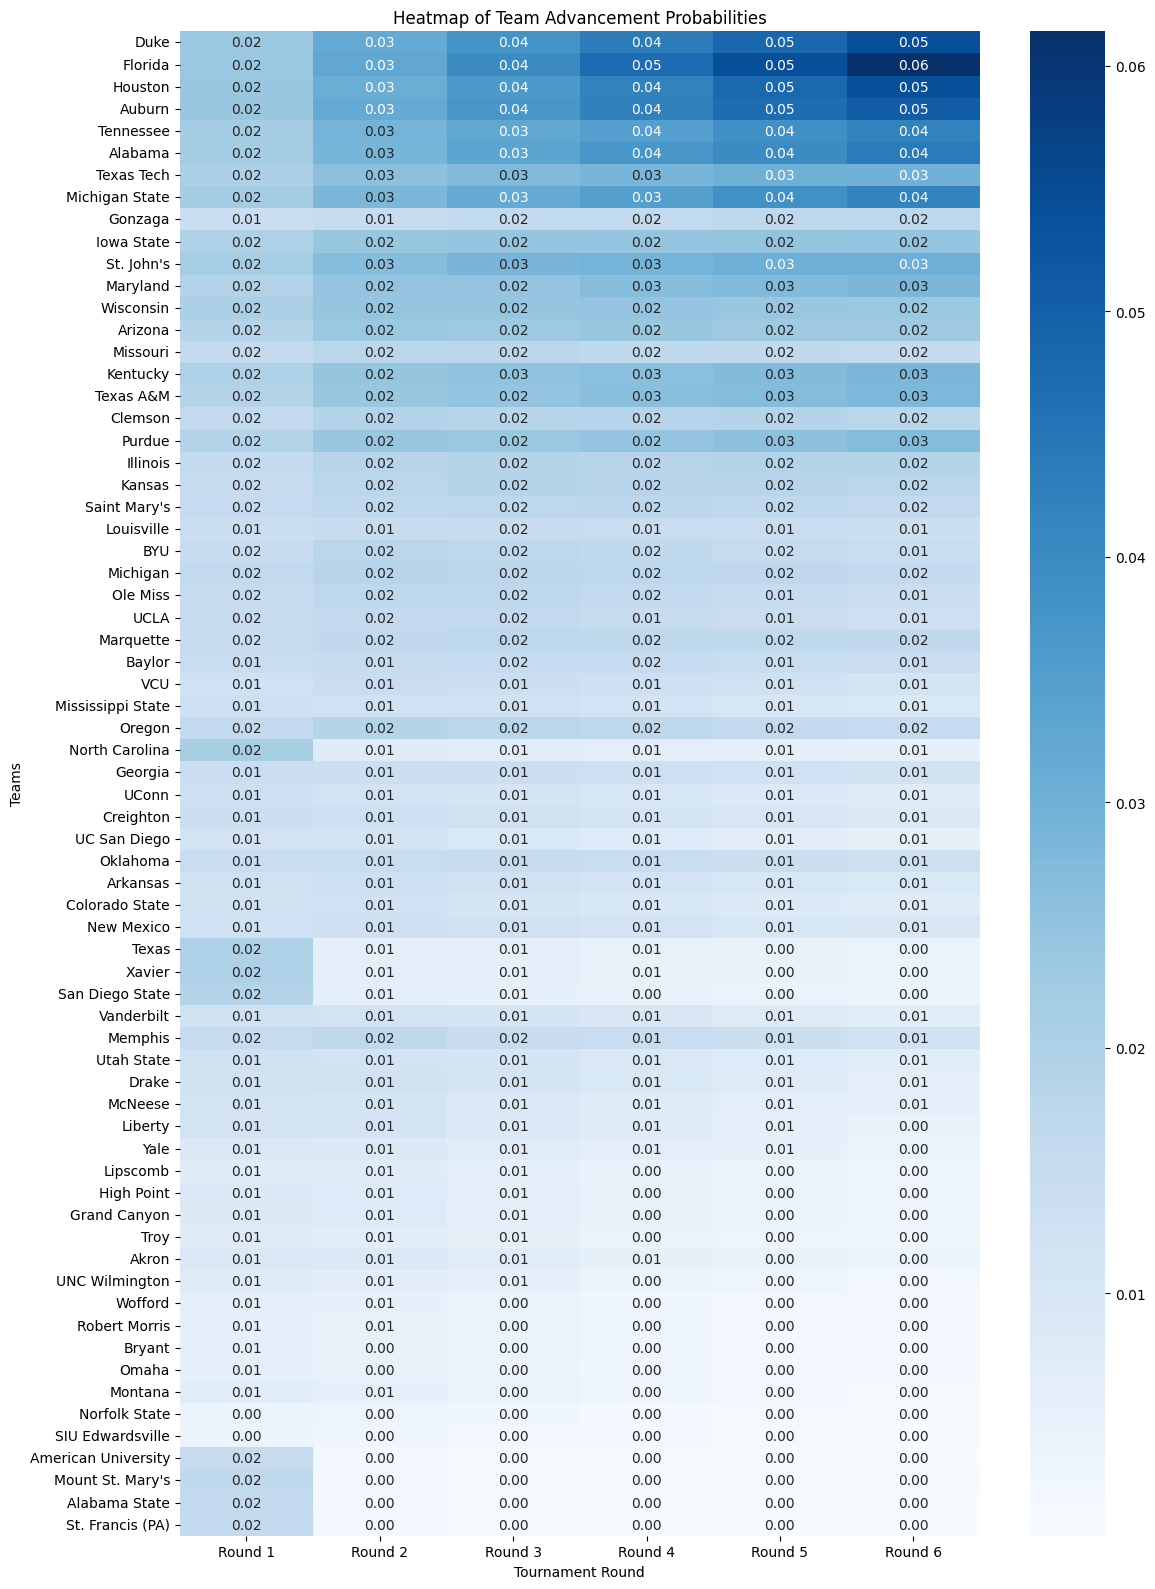

In [215]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_adv = pd.read_csv('advancement_probabilities.csv', index_col=0)
plt.figure(figsize=(12, 16))
sns.heatmap(df_adv, cmap='Blues', annot=True, fmt=".2f")

plt.title("Heatmap of Team Advancement Probabilities")
plt.xlabel("Tournament Round")
plt.ylabel("Teams")
plt.tight_layout()
plt.show()



In [228]:
import plotly.graph_objects as go

fig = go.Figure(go.Sankey(
    arrangement='snap',
    node=dict(
        pad=15,
        thickness=20,
        label=["Duke", "Kentucky", "Arizona", "..."],
        color="blue"
    ),
    link=dict(
        source=[0, 1, 0, 2],
        target=[3, 3, 4, 4],
        value=[0.8, 0.2, 0.7, 0.3],
        label=["Round 1 Probability", "..."]
    )
))

fig.update_layout(title_text="Interactive NCAA Tournament Bracket")
fig.show()


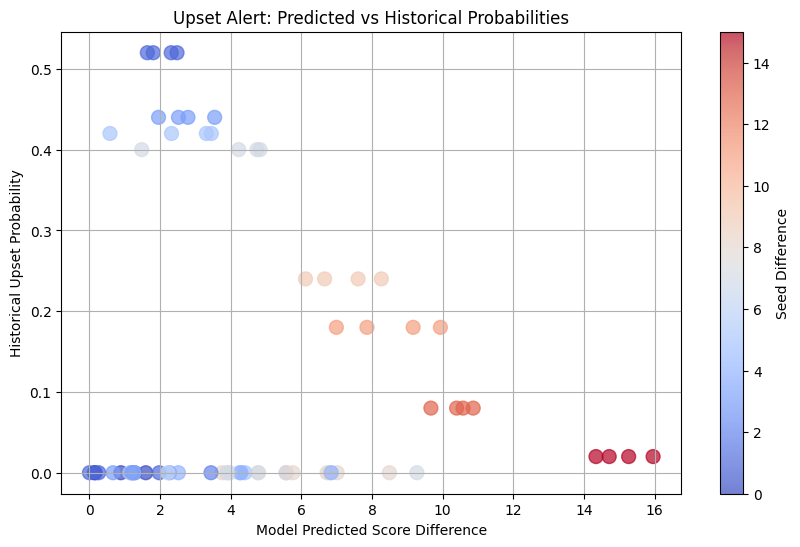

In [217]:
import matplotlib.pyplot as plt
import numpy as np

seeds_diff = []
model_probs = []
hist_probs = []

for team1, team2 in matchups.values():
	# Replace placeholders with actual winners if they exist
	team1 = simulated_winners.get(team1, team1)
	team2 = simulated_winners.get(team2, team2)

	# Skip if either team is still a placeholder
	if 'Game' in team1 or 'Game' in team2:
		continue

	# Calculate differences and probabilities
	seeds_diff.append(abs(seed_mapping[team1] - seed_mapping[team2]))
	model_probs.append(abs(team_scores[team1] - team_scores[team2]))
	hist_probs.append(historical_upsets.get((max(seed_mapping[team1], seed_mapping[team2]), min(seed_mapping[team1], seed_mapping[team2])), 0))

plt.figure(figsize=(10, 6))
plt.scatter(model_probs, hist_probs, c=seeds_diff, cmap='coolwarm', s=100, alpha=0.7)
plt.colorbar(label='Seed Difference')
plt.xlabel('Model Predicted Score Difference')
plt.ylabel('Historical Upset Probability')
plt.title('Upset Alert: Predicted vs Historical Probabilities')
plt.grid(True)
plt.show()


C:\Users\Aaron\AppData\Local\Temp\ipykernel_240\2018196756.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




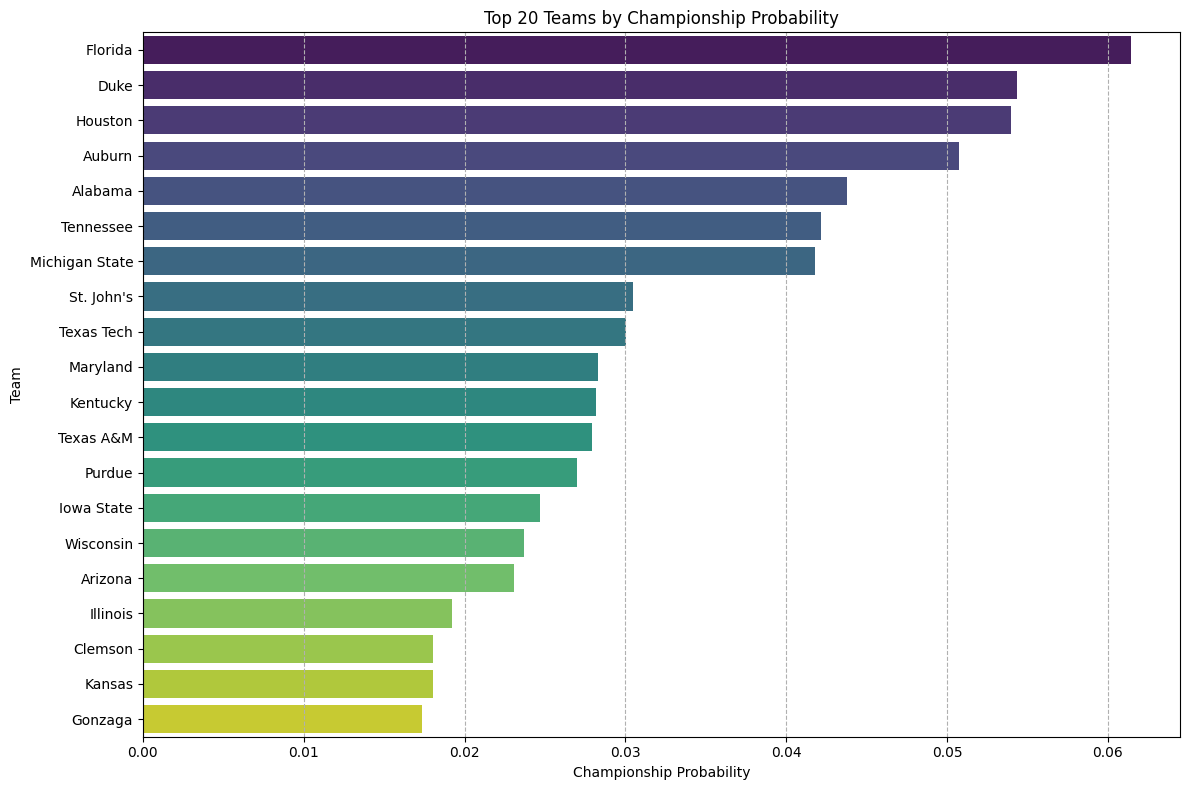

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_adv = pd.read_csv('advancement_probabilities.csv', index_col=0)
championship_probs = df_adv["Round 6"].sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=championship_probs.values, y=championship_probs.index, palette="viridis")

plt.xlabel('Championship Probability')
plt.ylabel('Team')
plt.title('Top 20 Teams by Championship Probability')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()



C:\Users\Aaron\AppData\Local\Temp\ipykernel_240\20355639.py:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




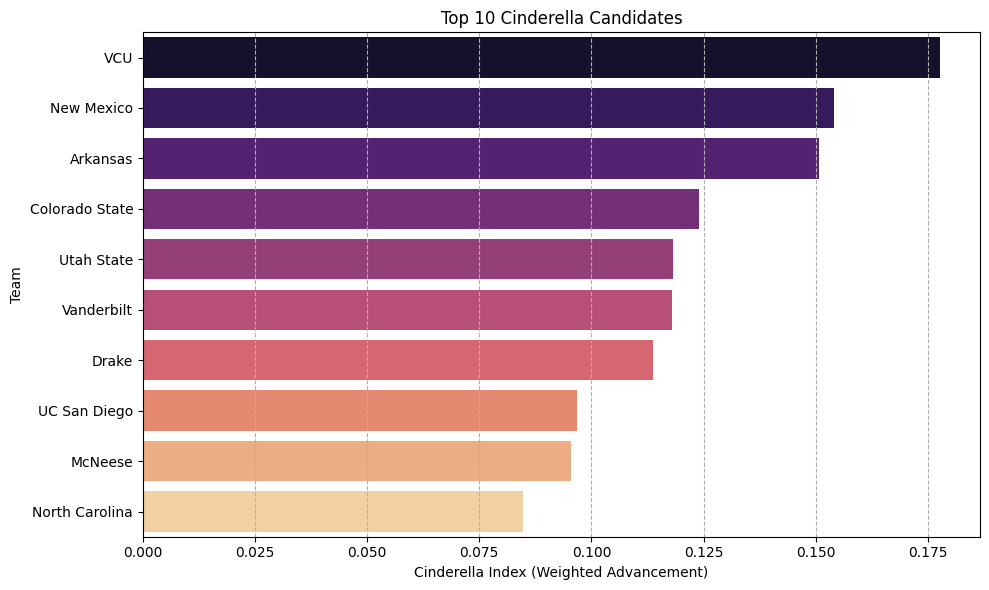

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load advancement probabilities
df_adv = pd.read_csv('advancement_probabilities.csv', index_col=0).reset_index()
df_adv.rename(columns={'index': 'Team Name'}, inplace=True)

# Load original bracket data for seeds
bracket_df = pd.read_csv(r"C:\Users\Aaron\OneDrive\New folder\Stat 386\Moneyball\2025_bracket.csv")
seed_mapping = bracket_df.set_index("Mapped ESPN Team Name")["Seed"].to_dict()

# Map seeds to advancement data
df_adv['Seed'] = df_adv['Team Name'].map(seed_mapping)

# Filter for potential Cinderella teams (seed >= 10)
cinderella_teams = df_adv[df_adv['Seed'] >= 10].copy()

# Calculate "Cinderella Index"
cinderella_teams['Cinderella Index'] = (
    cinderella_teams['Round 3'] * 1 +
    cinderella_teams['Round 4'] * 2 +
    cinderella_teams['Round 5'] * 4 +
    cinderella_teams['Round 6'] * 8
)

# Sort by Cinderella Index and select top 10
top_cinderellas = cinderella_teams.sort_values('Cinderella Index', ascending=False).head(10)

# Plot the Top 10 Cinderella Candidates
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Cinderella Index', 
    y='Team Name', 
    data=top_cinderellas, 
    palette='magma'
)

plt.xlabel('Cinderella Index (Weighted Advancement)')
plt.ylabel('Team')
plt.title('Top 10 Cinderella Candidates')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()
